# Training a ML model using CICIoT2023

This notebook shows how a LogisticRegression model can be trained using the CICIoT2023 csv files.

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt


### Importing Dataset. need not run again


# Function to perform EDA for a given DataFrame
def perform_eda(data):
    # Display first few rows of the dataset
    print("First few rows of the combined dataset:")
    print(data.head())

    # Basic statistics
    print("Basic Statistics for the combined dataset:")
    print(data.describe())

    # Data Information
    print("Data Information for the combined dataset:")
    print(data.info())

    # Missing Values
    print("Missing Values in the combined dataset:")
    print(data.isnull().sum())

    # Unique values in categorical columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        print(f"Unique values in {col}:")
        print(data[col].value_counts())

    # Correlation Matrix
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 6))
    plt.title("Correlation Matrix for the combined dataset")
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

    # Box Plots
    for col in data.columns:
        if col != 'label':  # Replace 'target_variable' with the actual target column name
            plt.figure(figsize=(6, 4))
            data.boxplot(column=col)
            plt.title(f"Box Plot for {col}")
            plt.show()

    # Scatter Plots (pairwise relationships)
    pd.plotting.scatter_matrix(data, figsize=(12, 8))
    plt.show()

    # Distribution Plots
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(6, 4))
        data[col].plot(kind='hist', bins=20)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# List of CSV files
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()

# Combine all CSV files into one DataFrame
combined_data = pd.concat([pd.read_csv(os.path.join(DATASET_DIRECTORY, csv_file)) for csv_file in df_sets], ignore_index=True)

# Perform EDA for the combined dataset
perform_eda(combined_data)


Performing EDA:   0%|          | 0/169 [00:00<?, ?it/s]

First few rows of the combined dataset:
   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000          54.00           6.00     64.00     0.329807   
1       0.000000          57.04           6.33     64.00     4.290556   
2       0.000000           0.00           1.00     64.00    33.396799   
3       0.328175       76175.00          17.00     64.00  4642.133010   
4       0.117320         101.73           6.11     65.91     6.202211   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0     0.329807    0.0              1.0              0.0              1.0  ...   
1     4.290556    0.0              0.0              0.0              0.0  ...   
2    33.396799    0.0              0.0              0.0              0.0  ...   
3  4642.133010    0.0              0.0              0.0              0.0  ...   
4     6.202211    0.0              0.0              1.0              0.0  ...   

         Std  Tot size           I

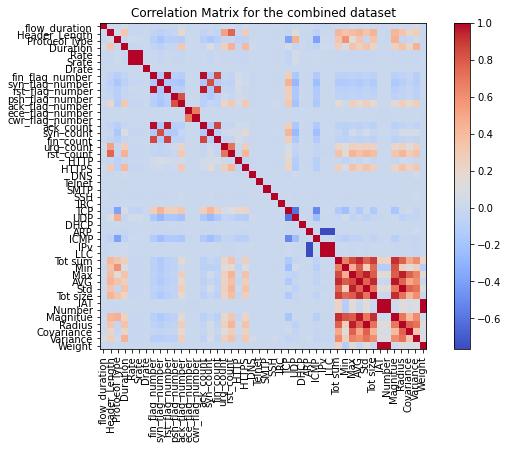

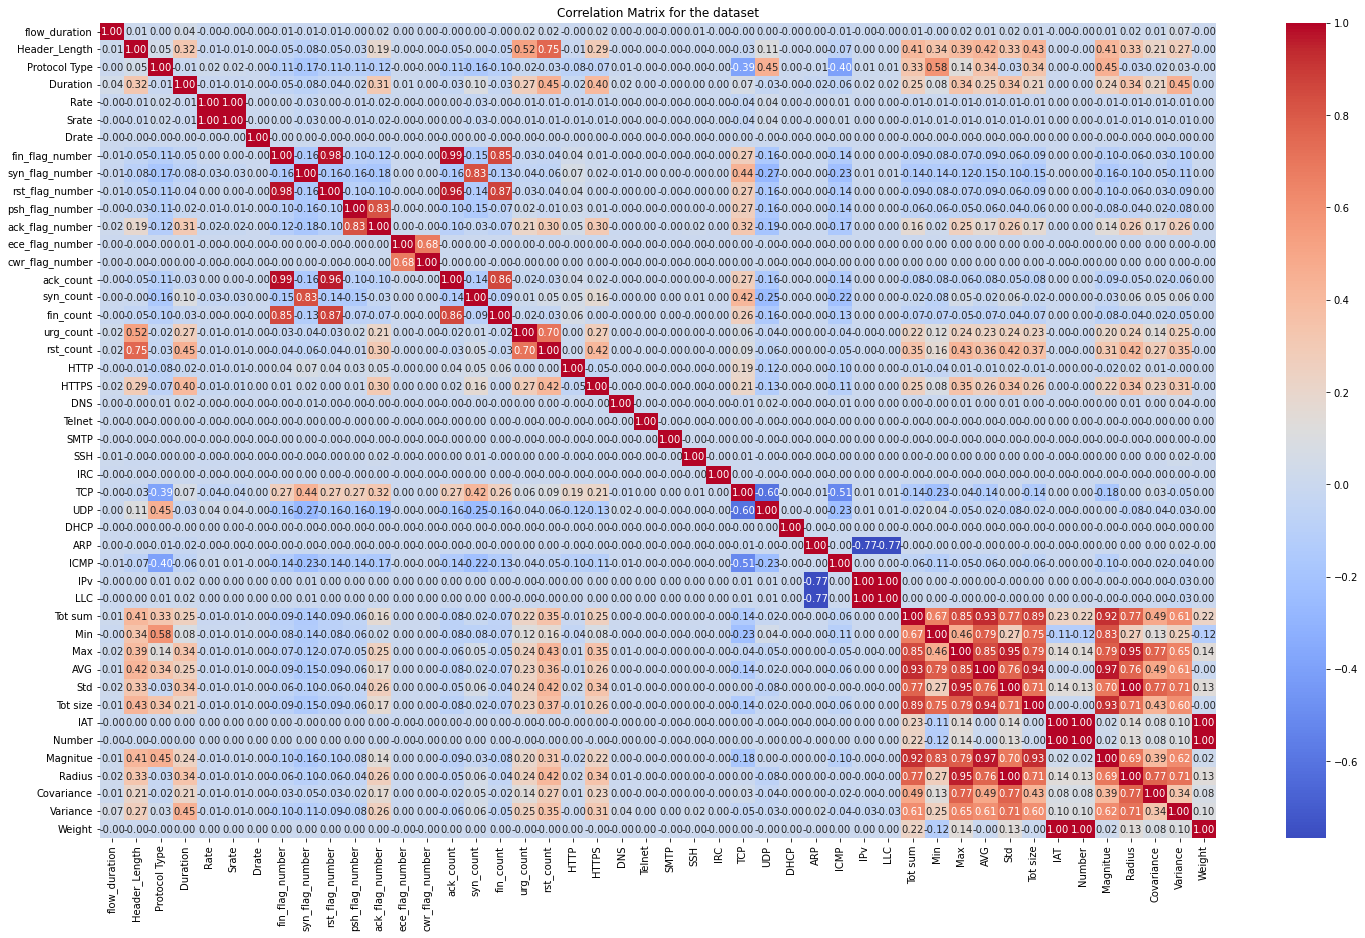

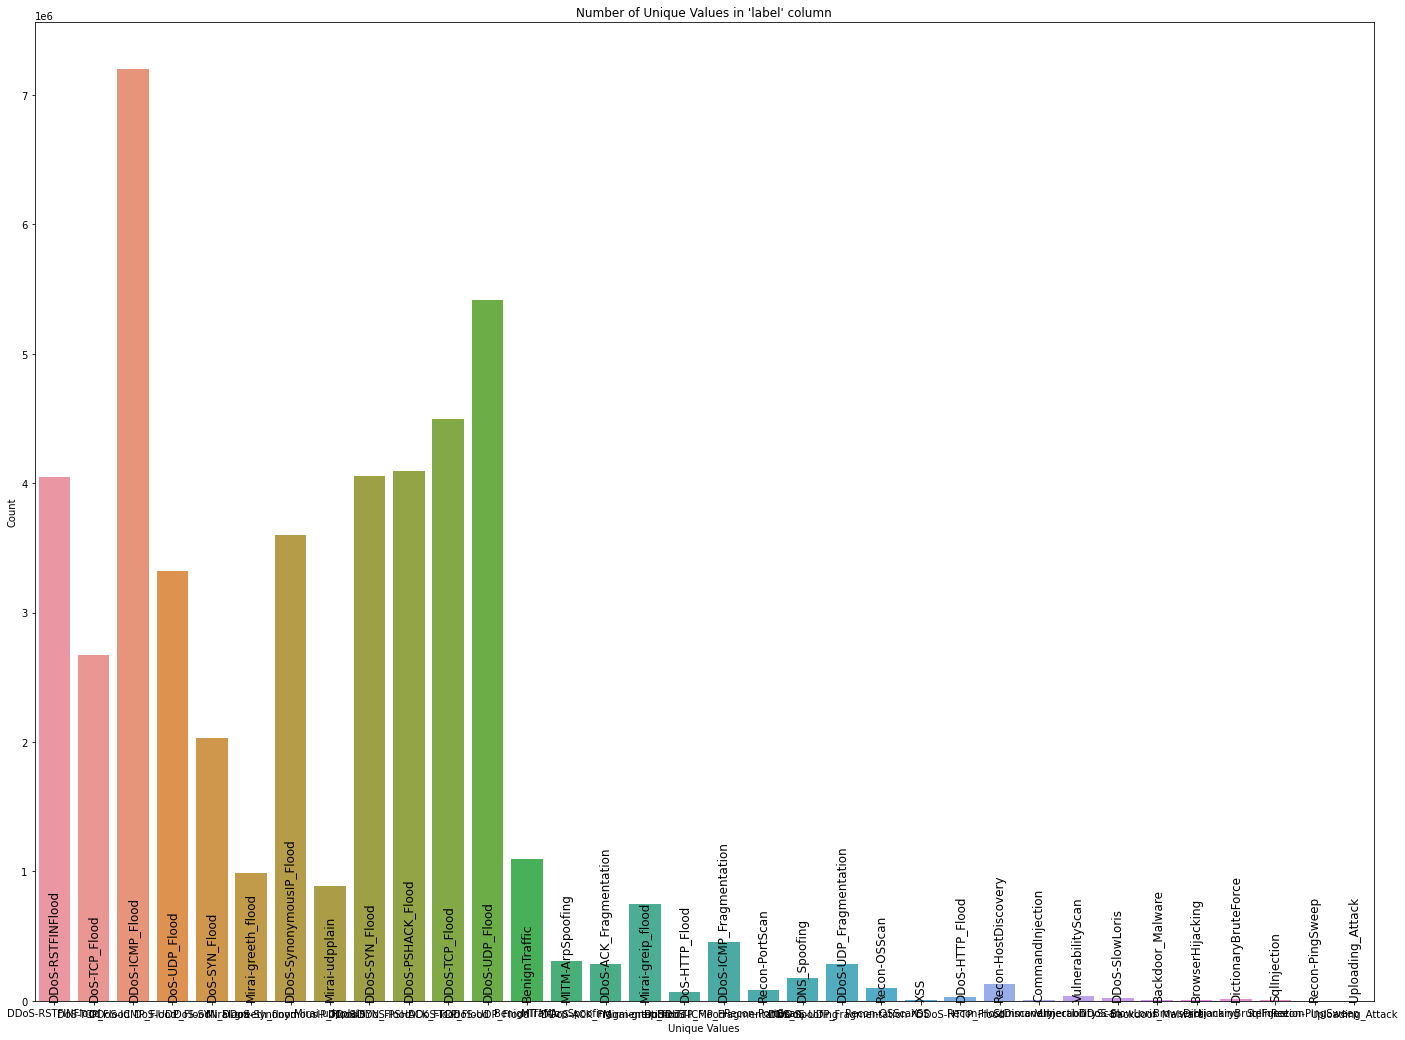

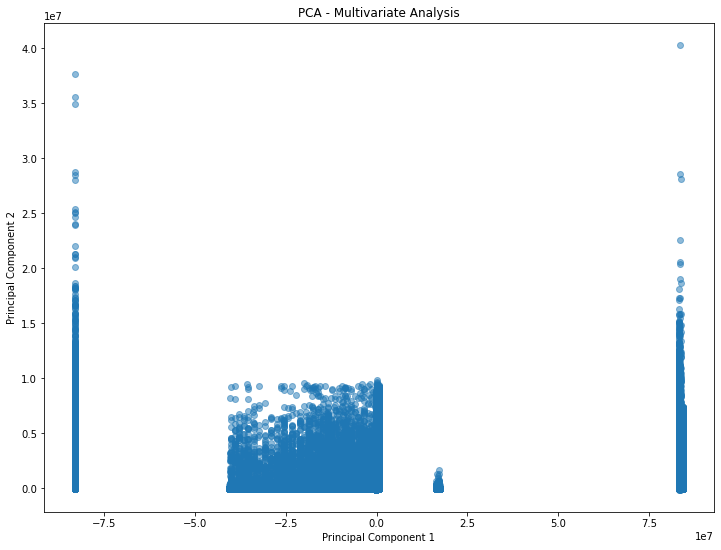

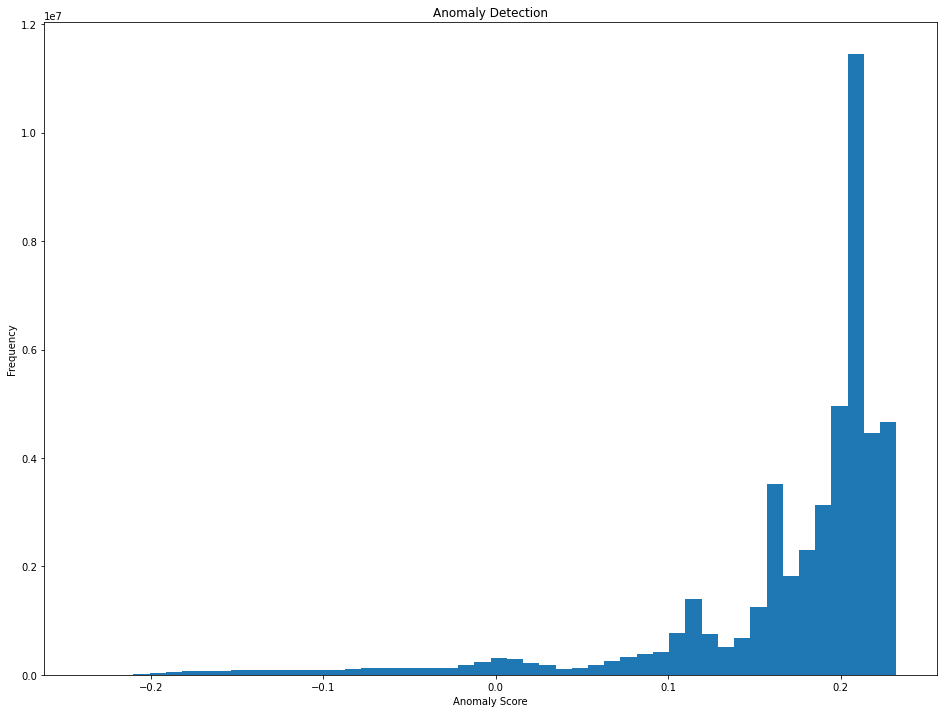

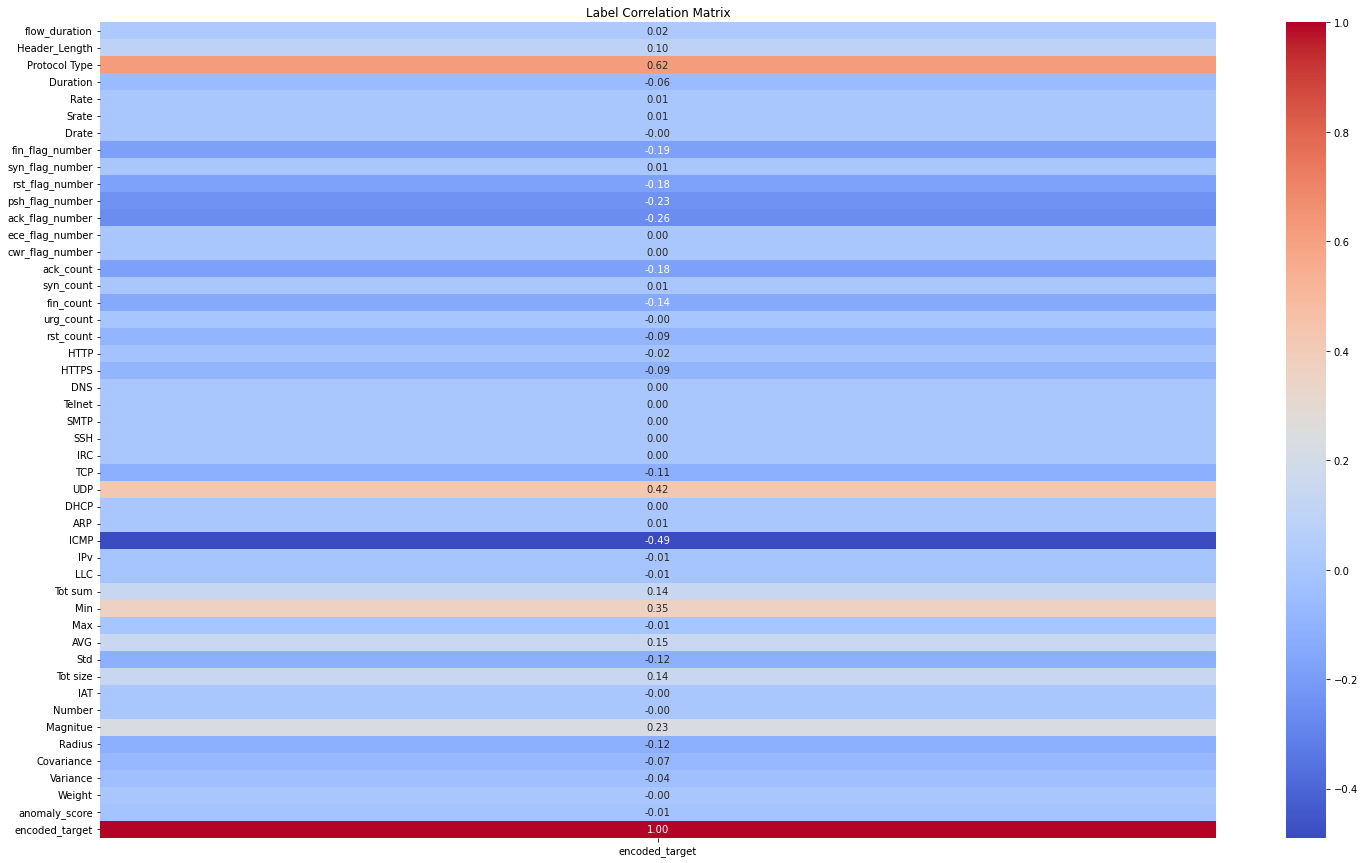

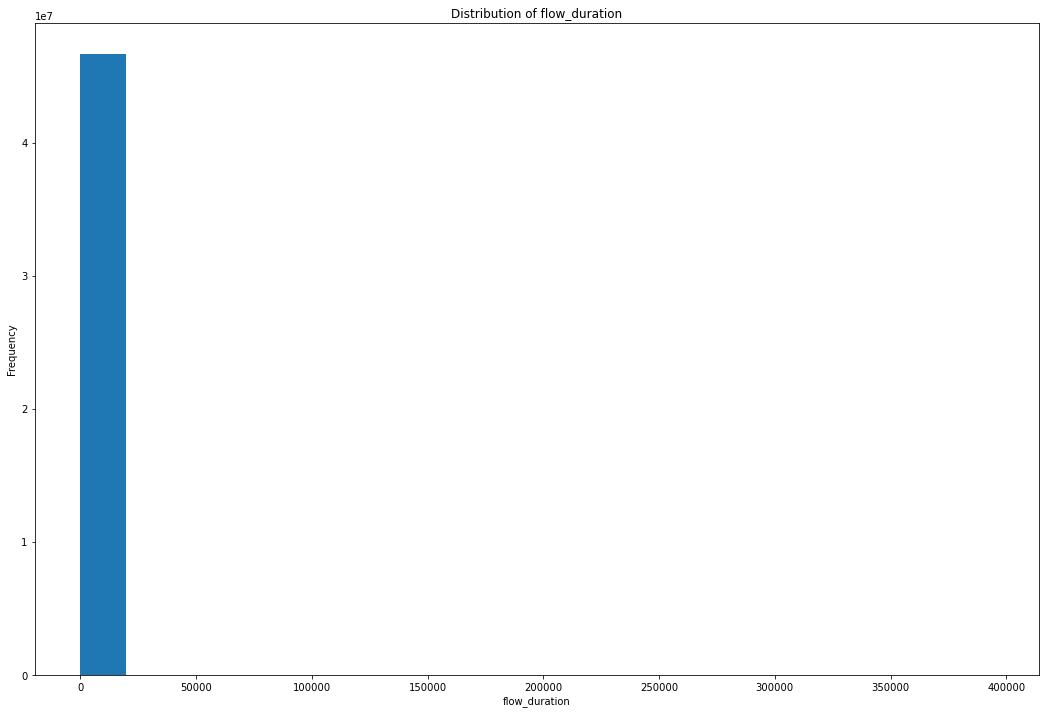

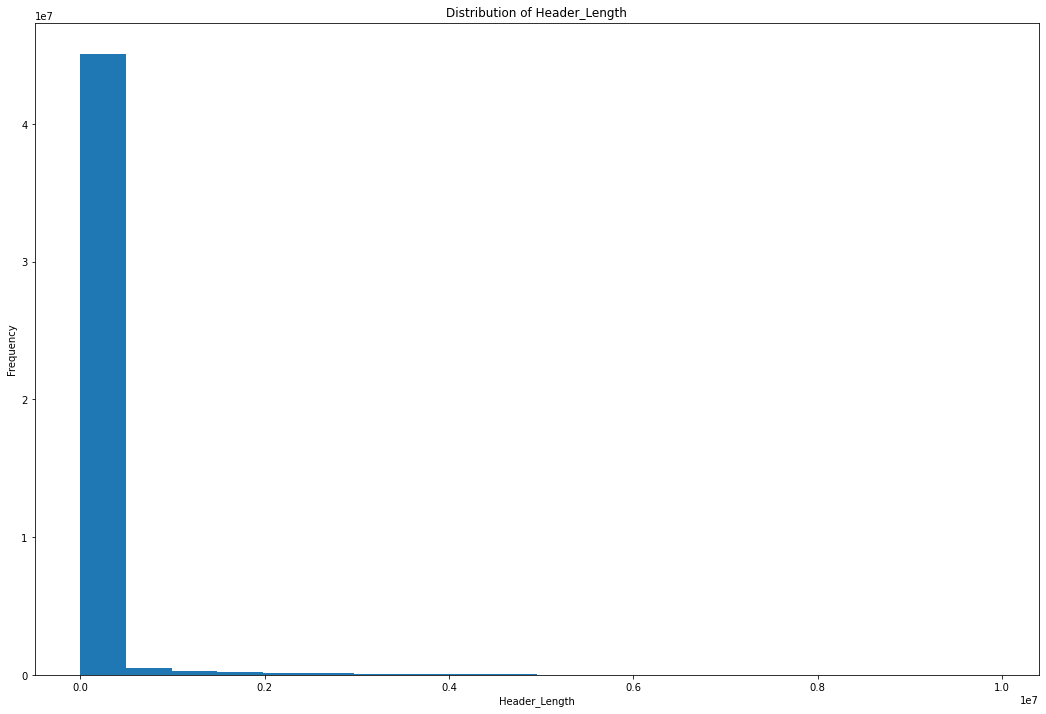

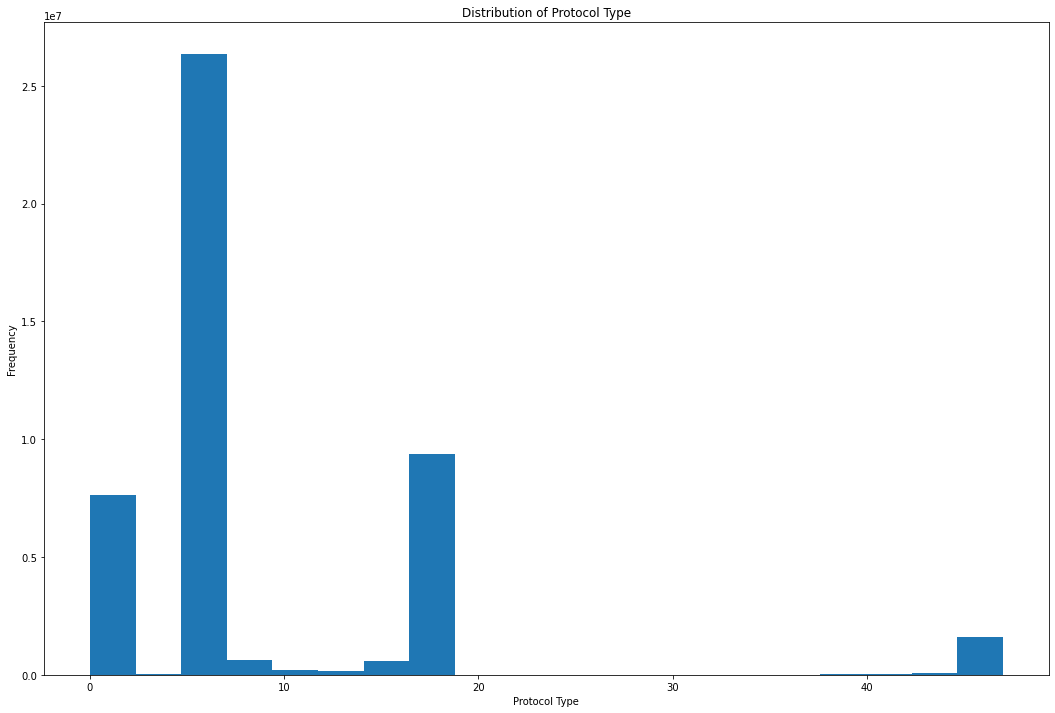

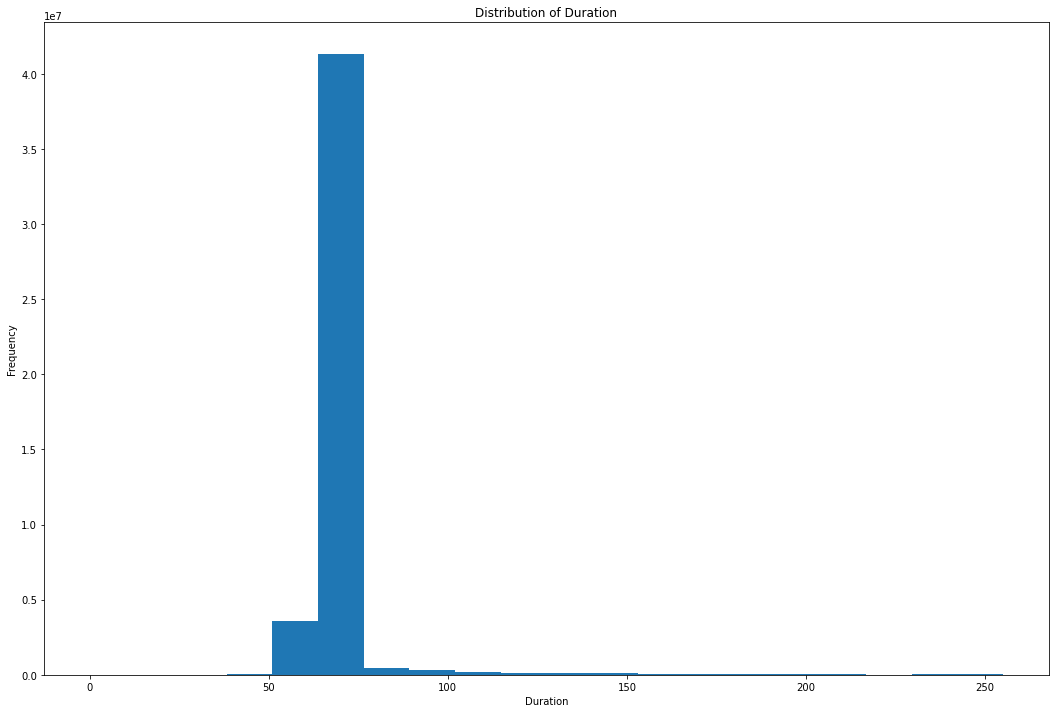

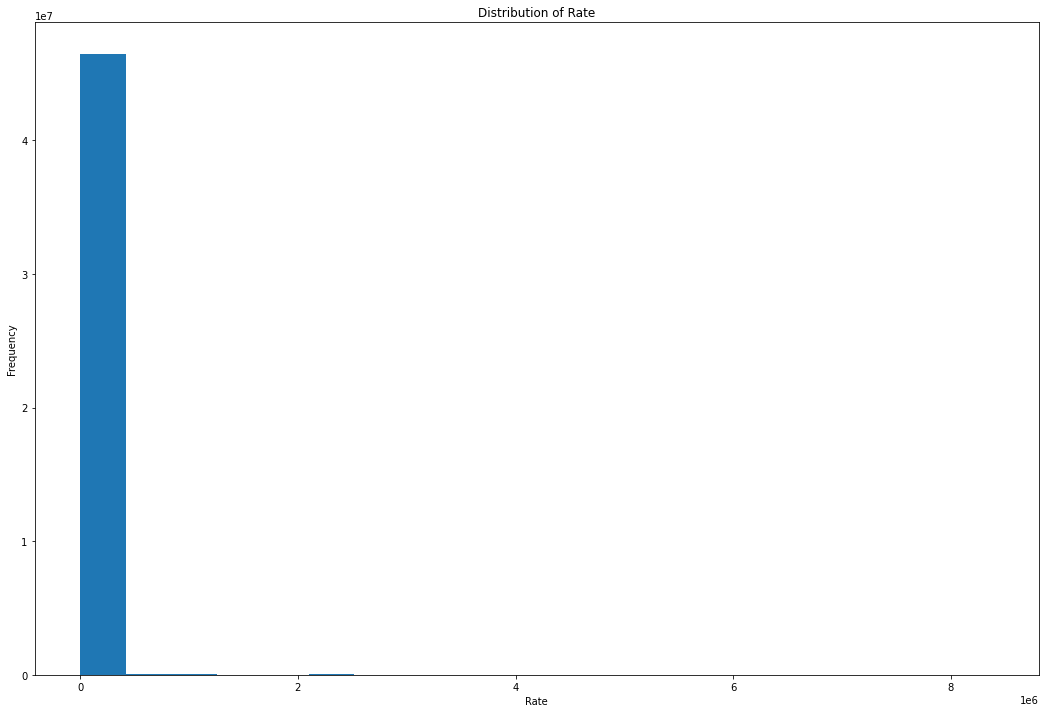

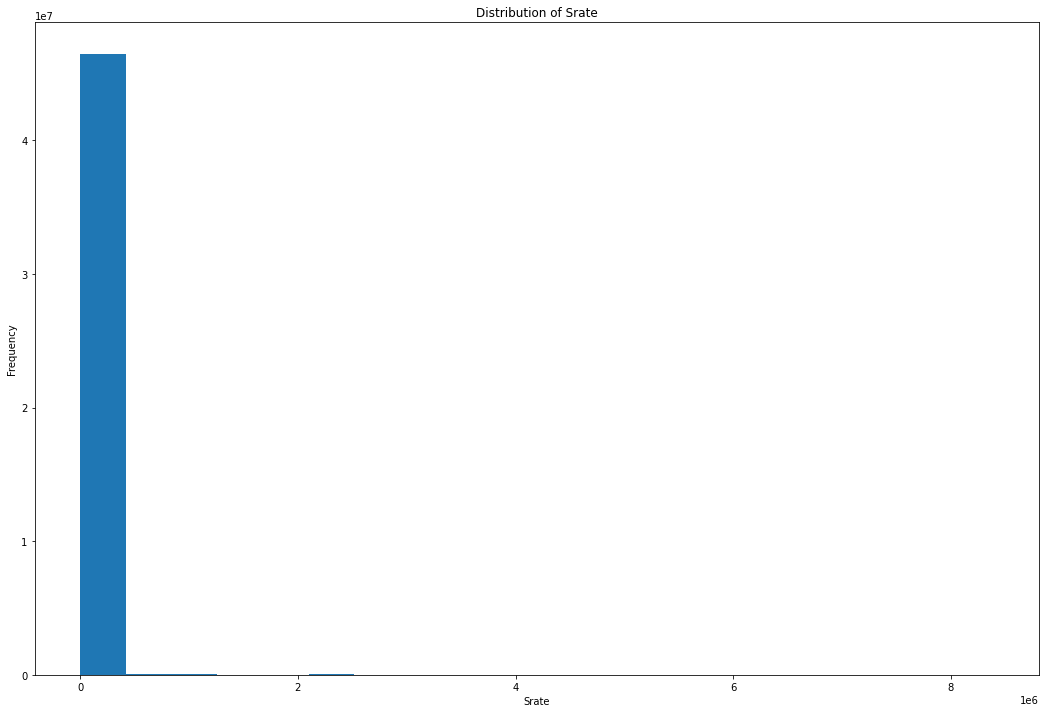

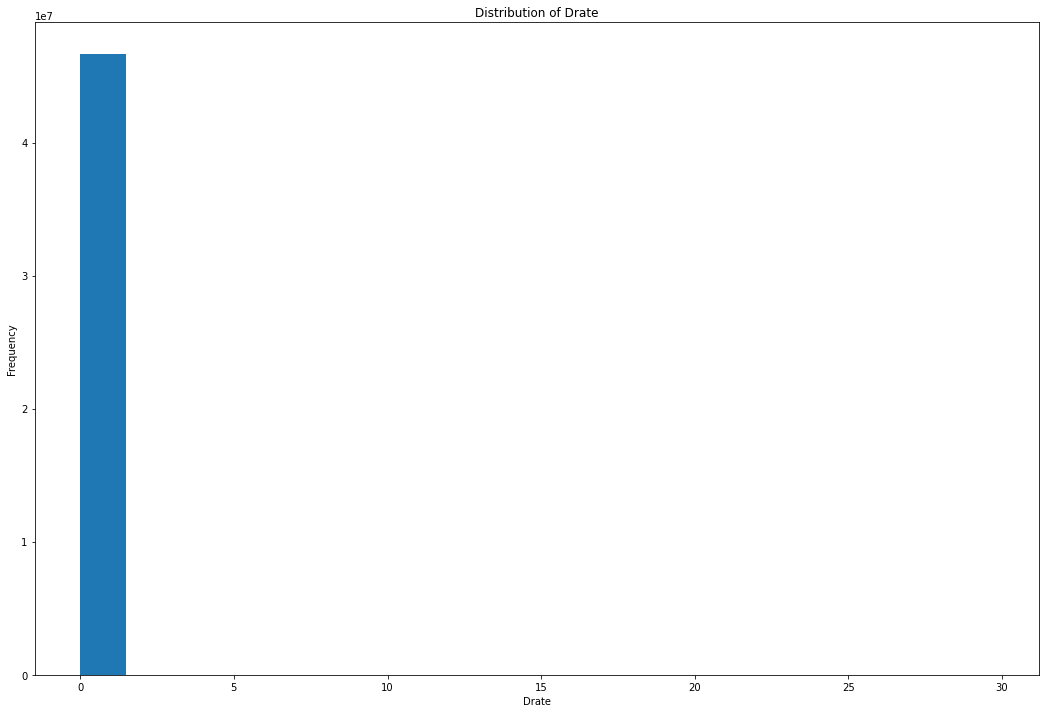

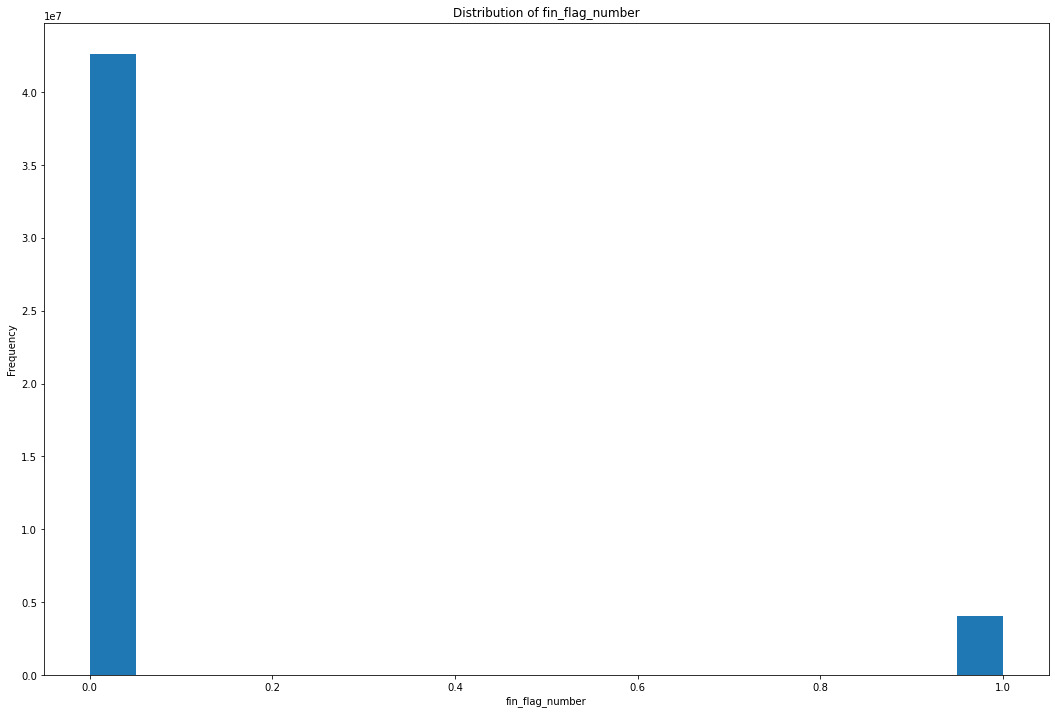

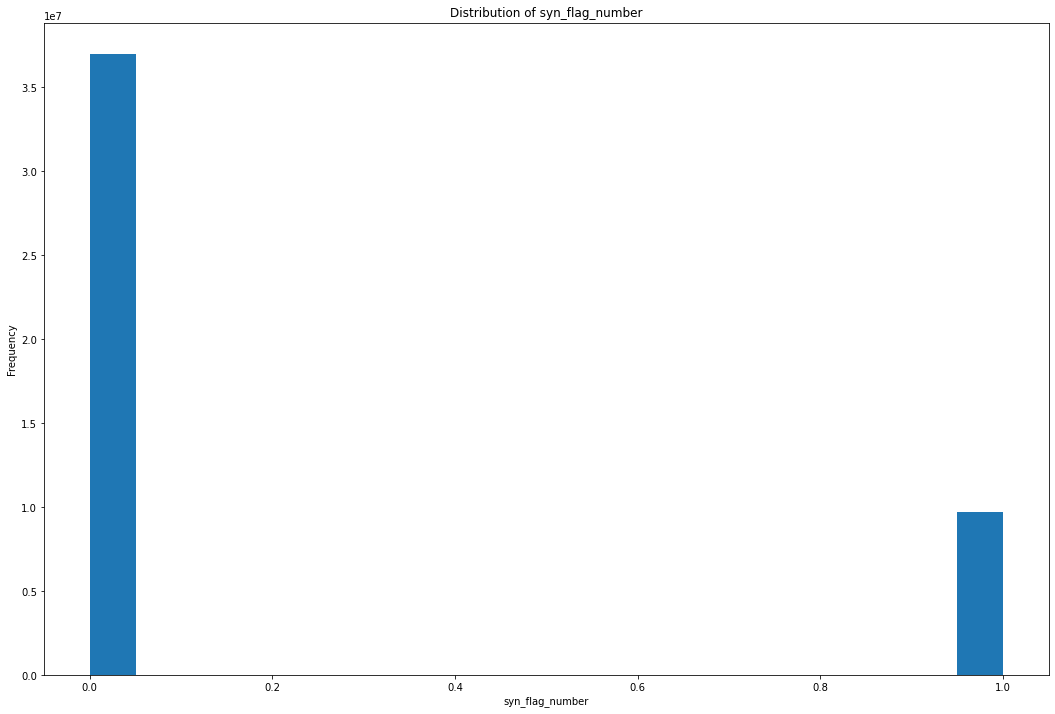

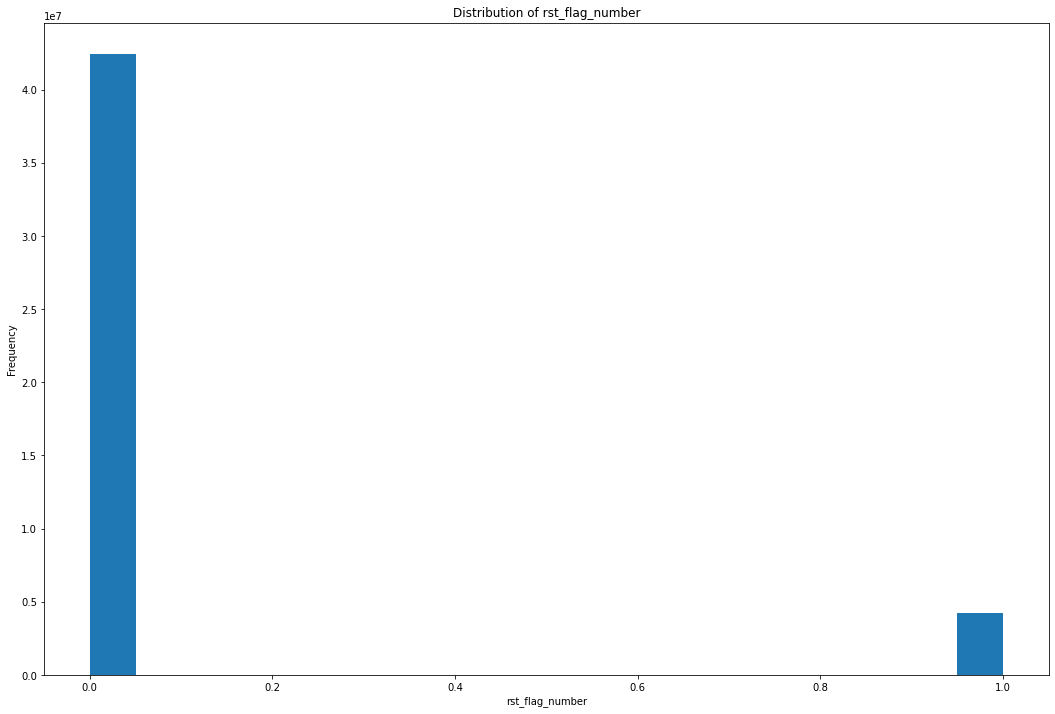

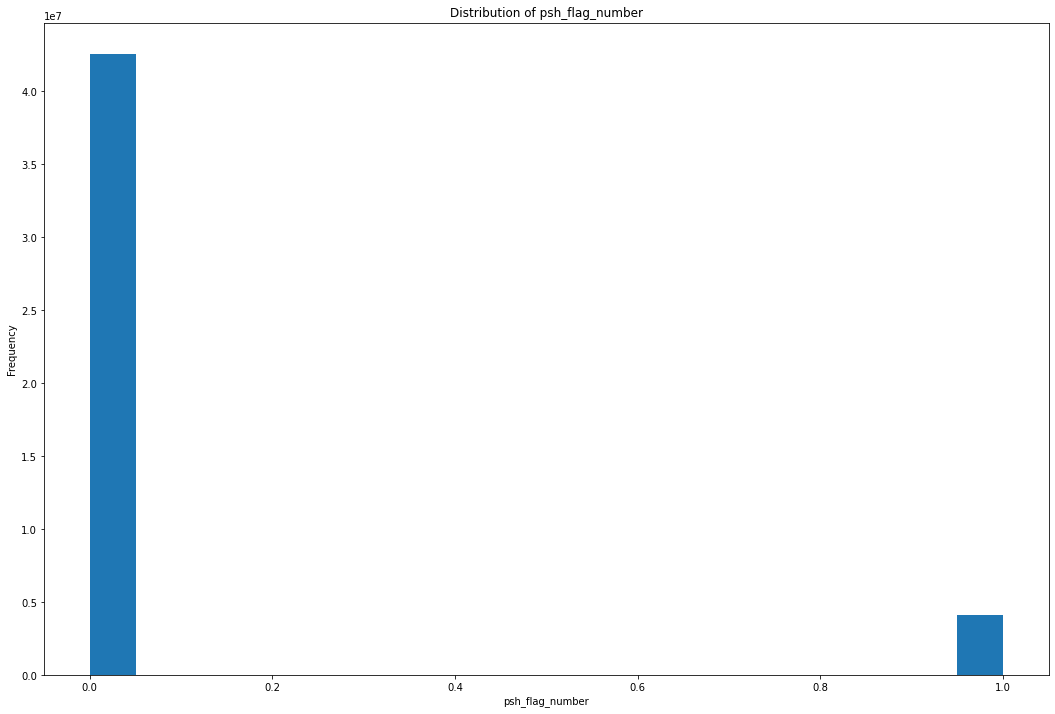

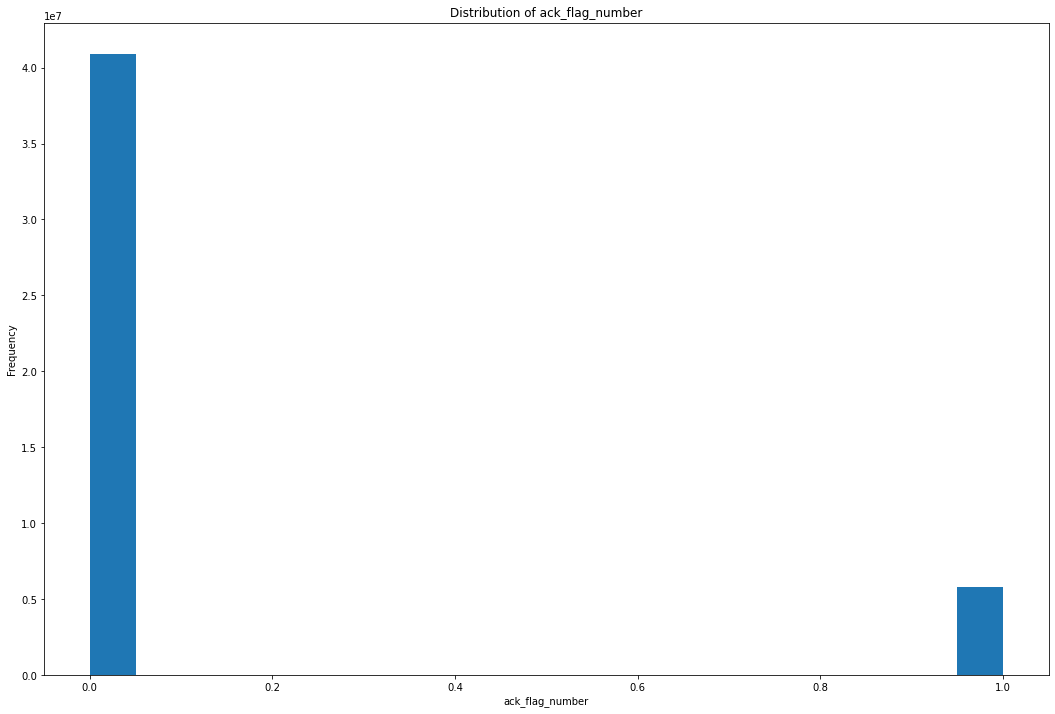

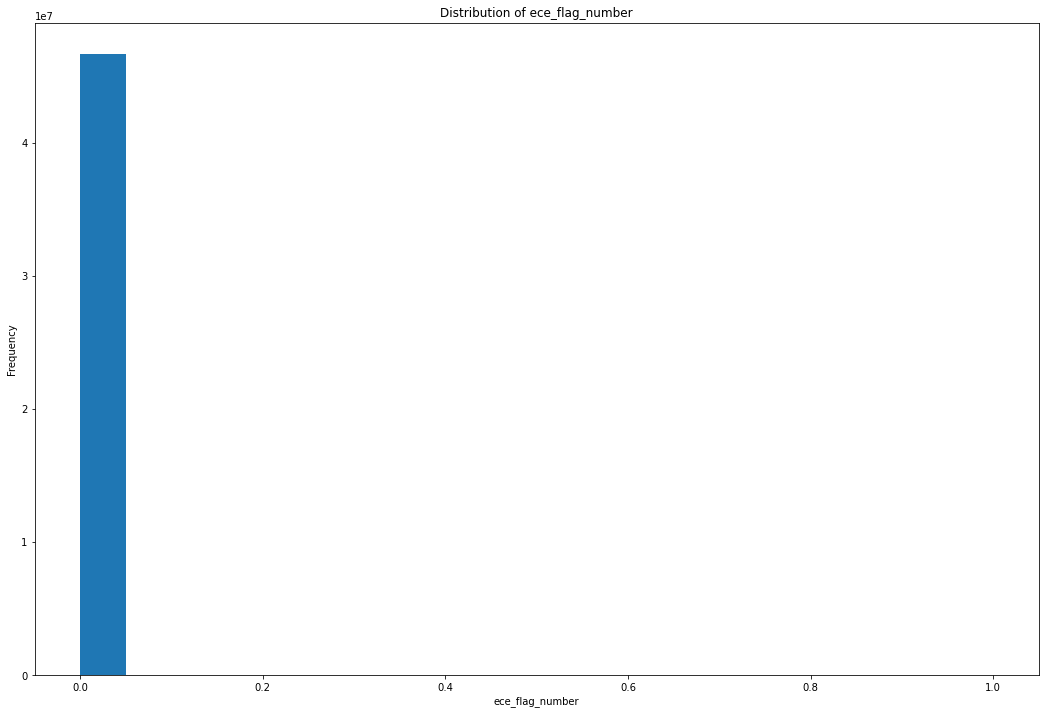

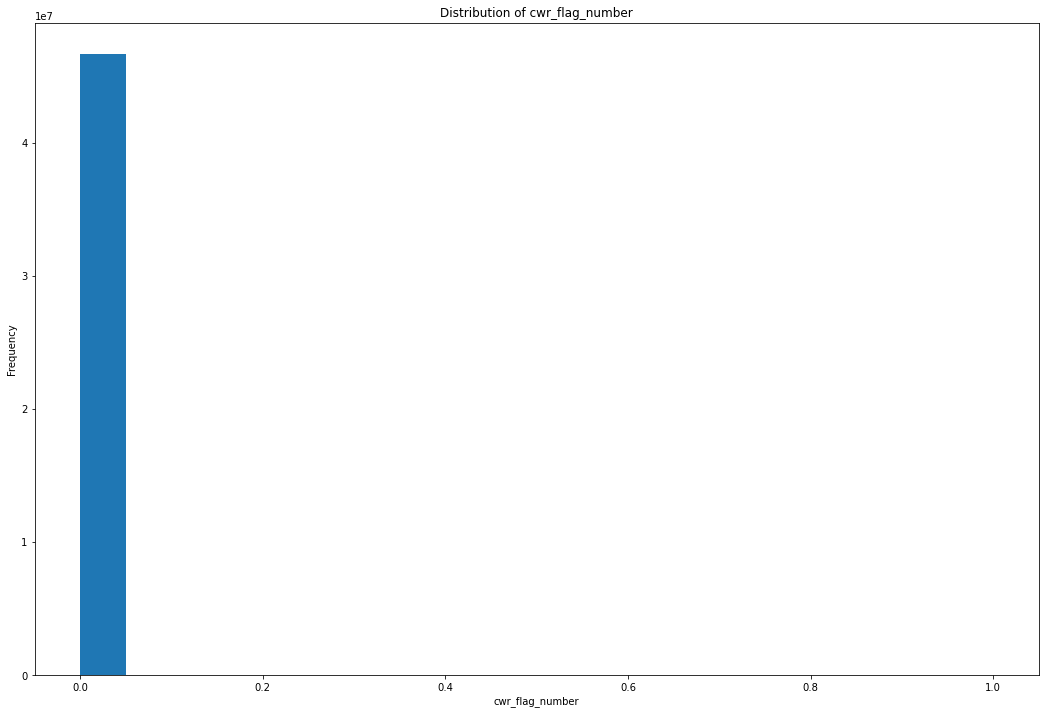

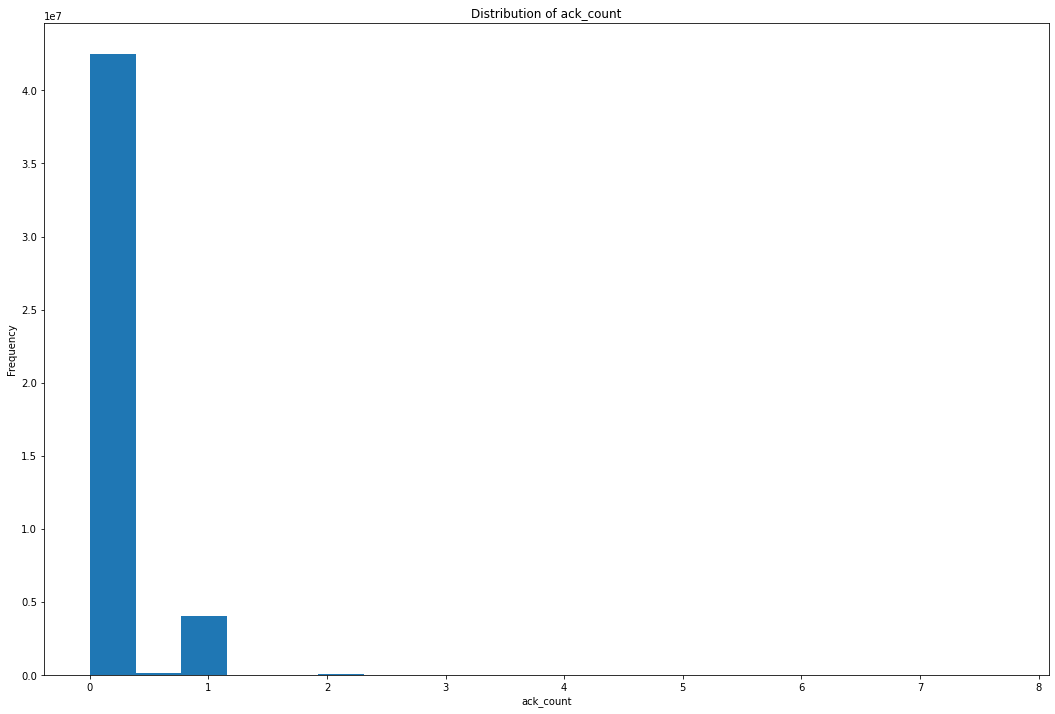

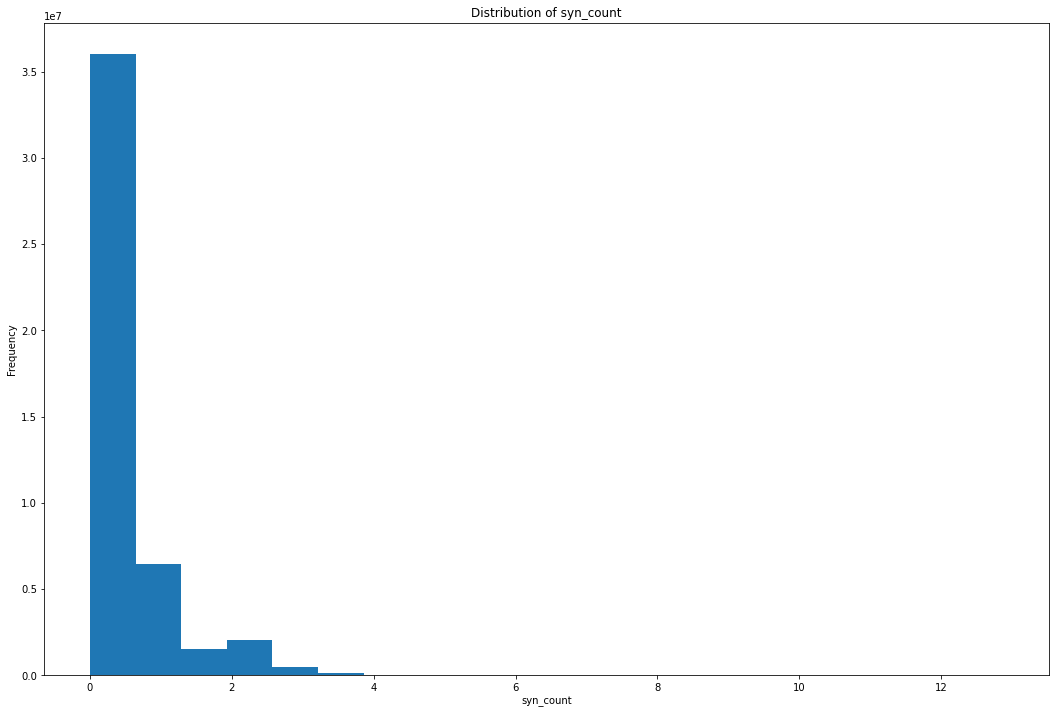

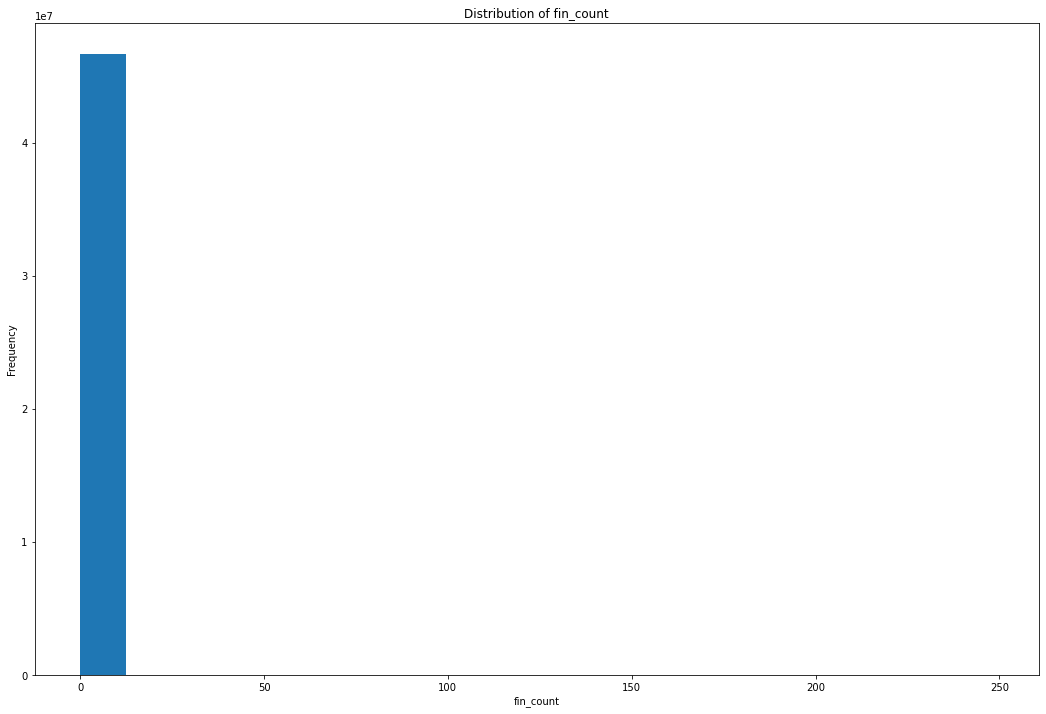

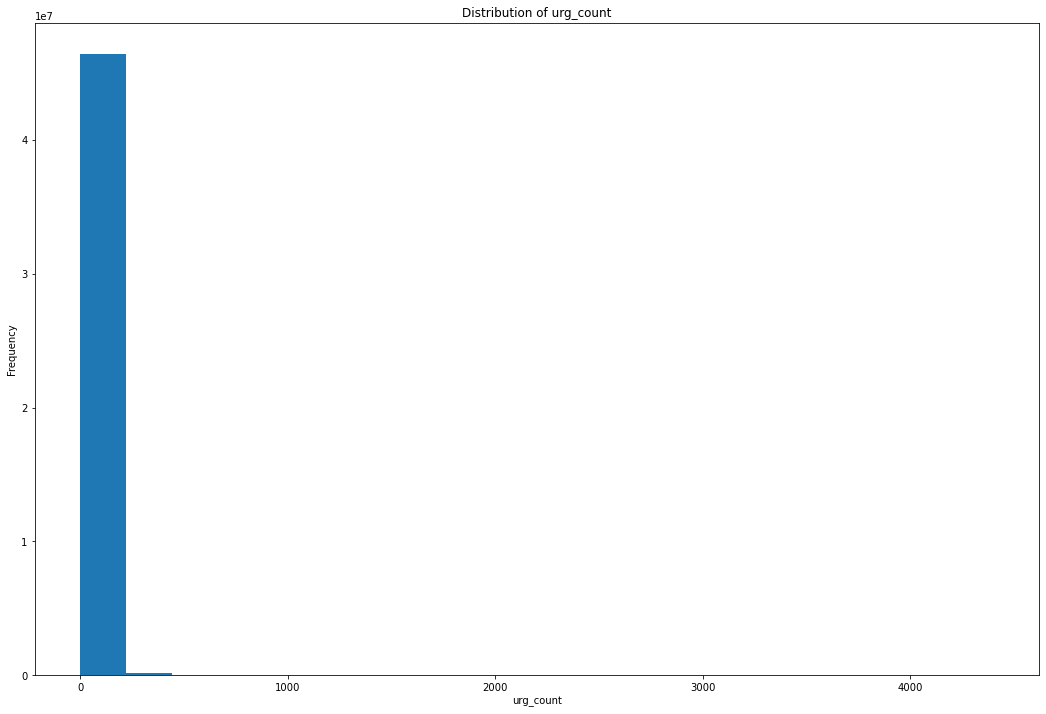

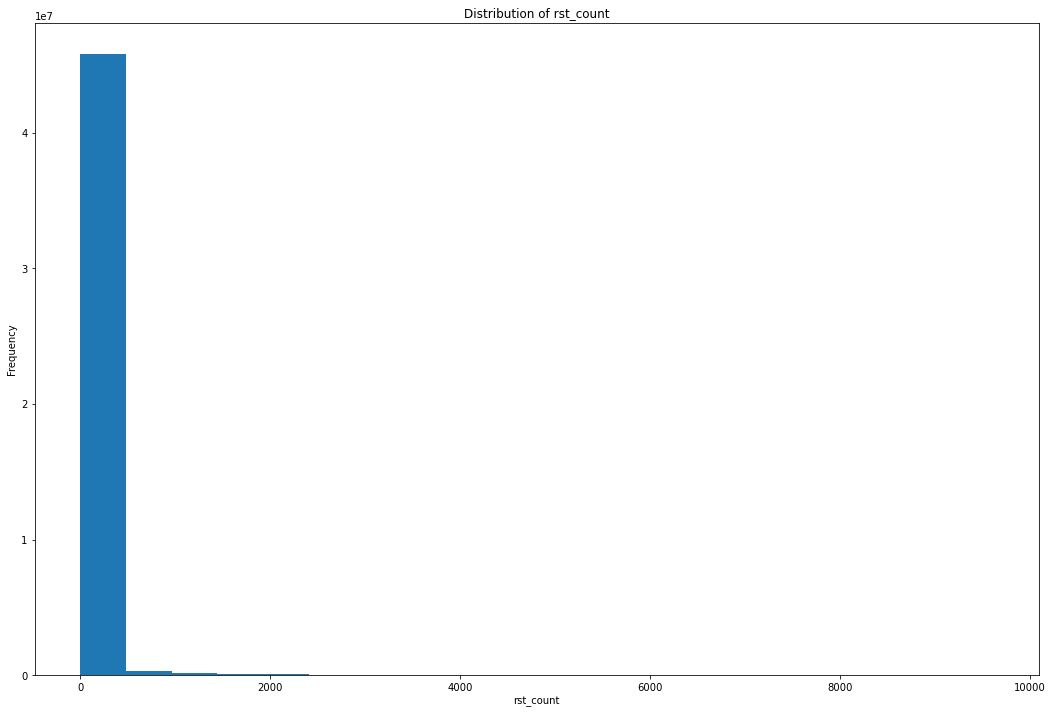

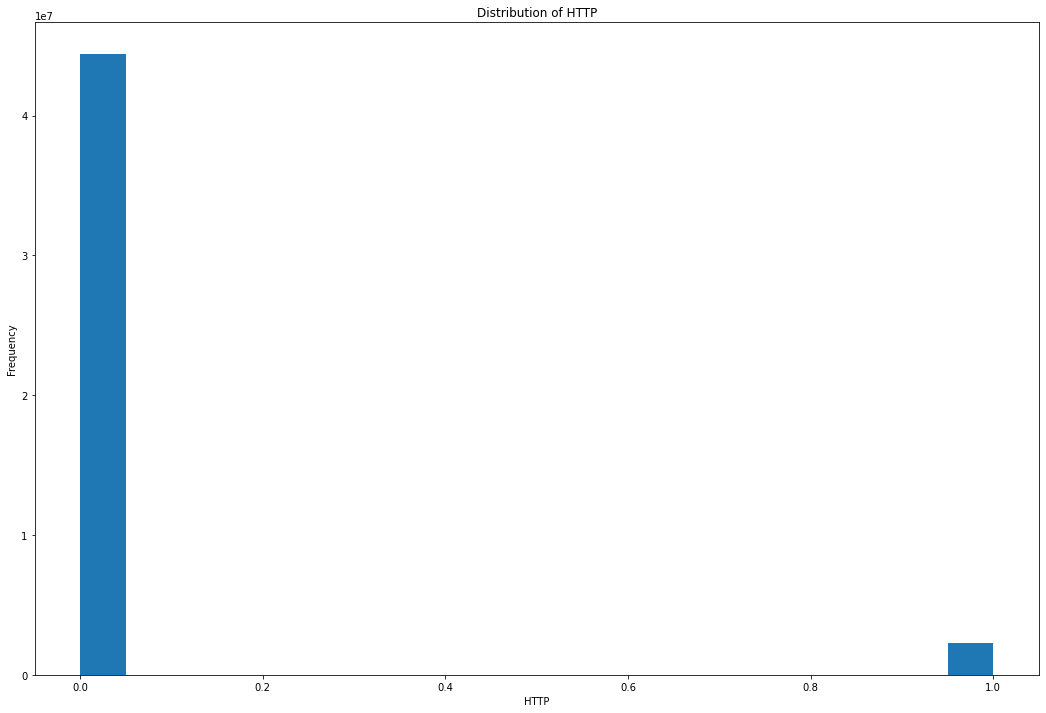

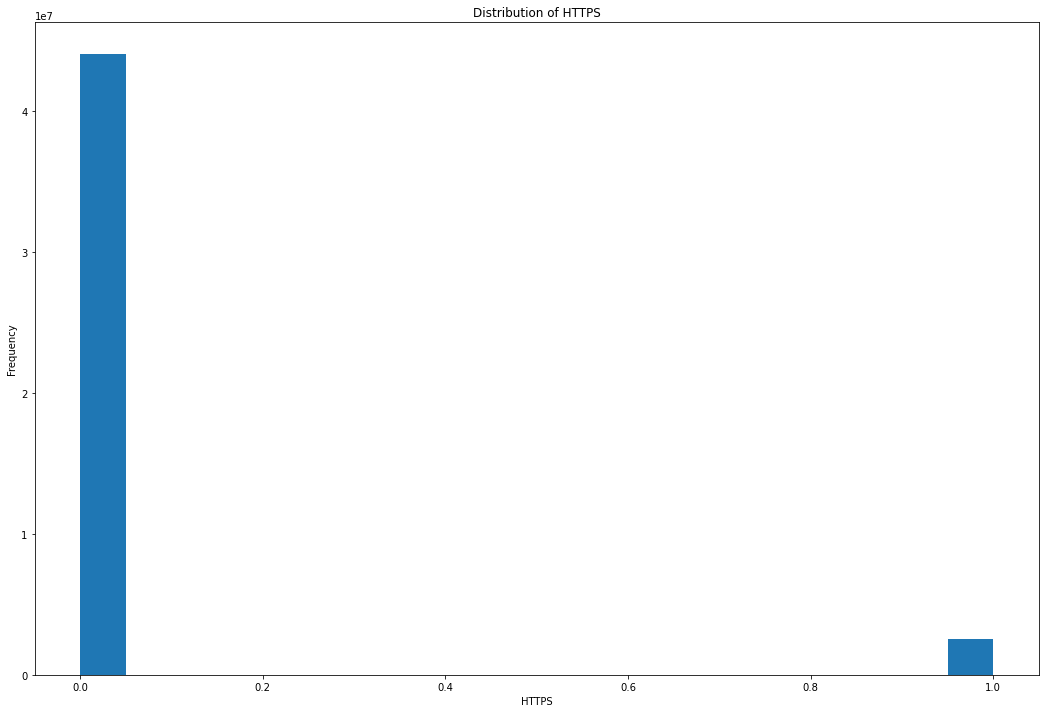

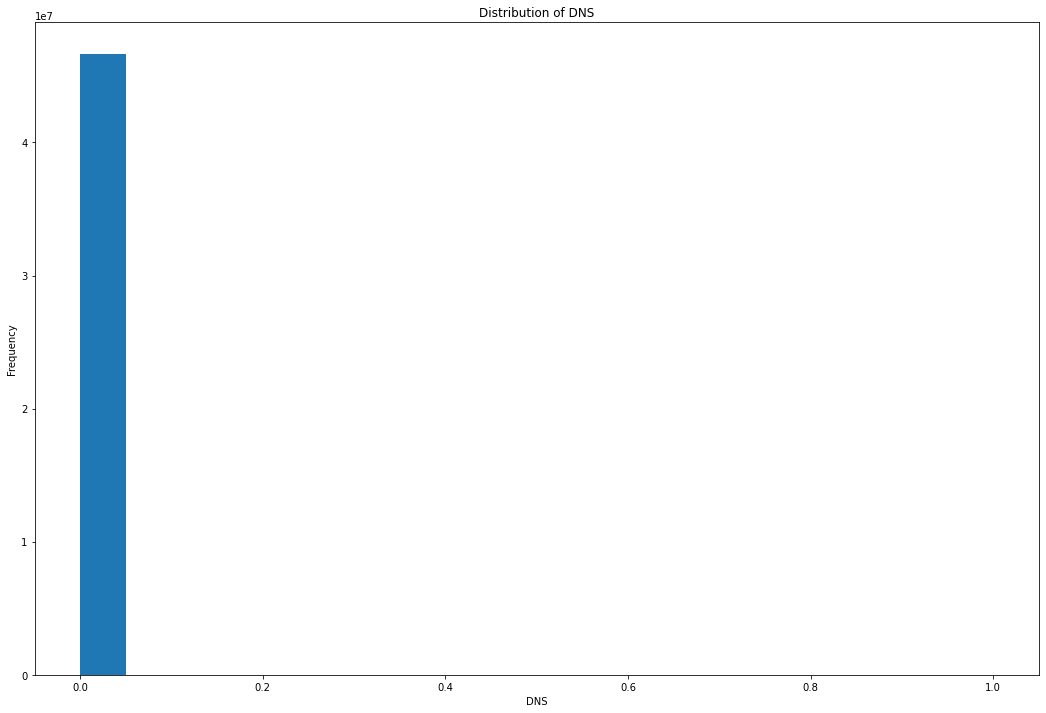

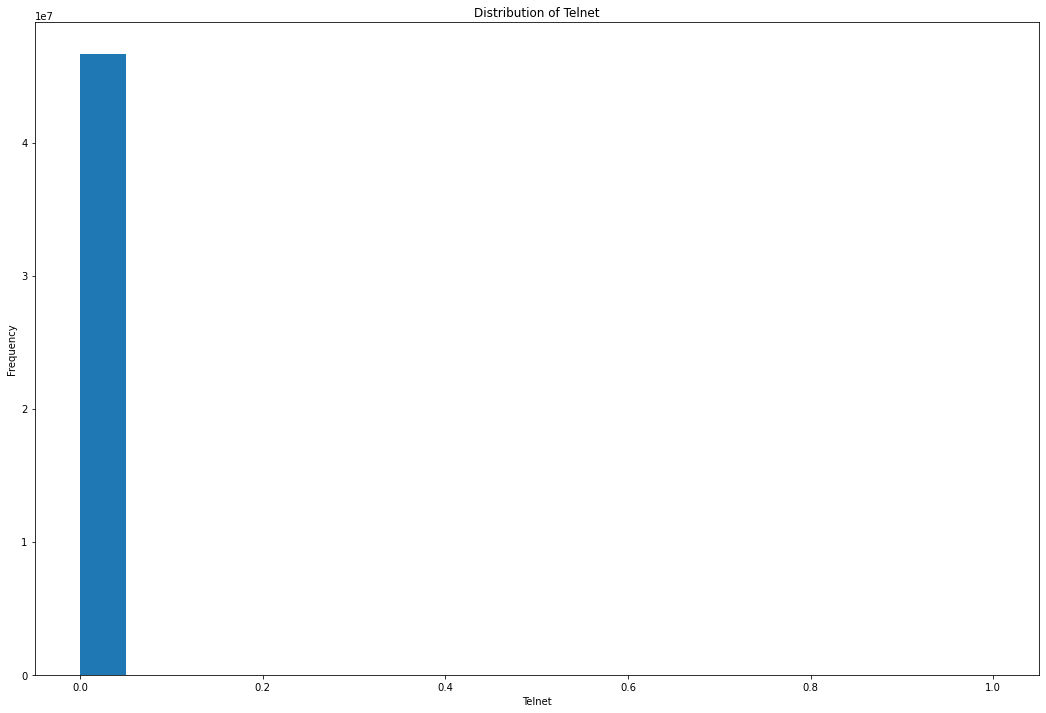

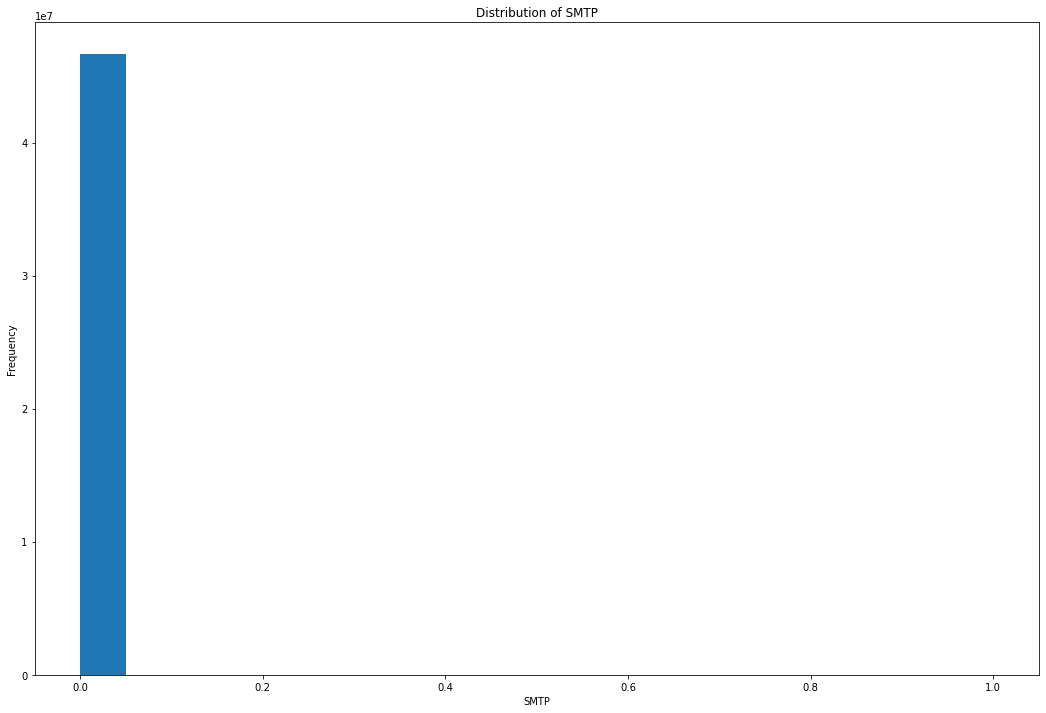

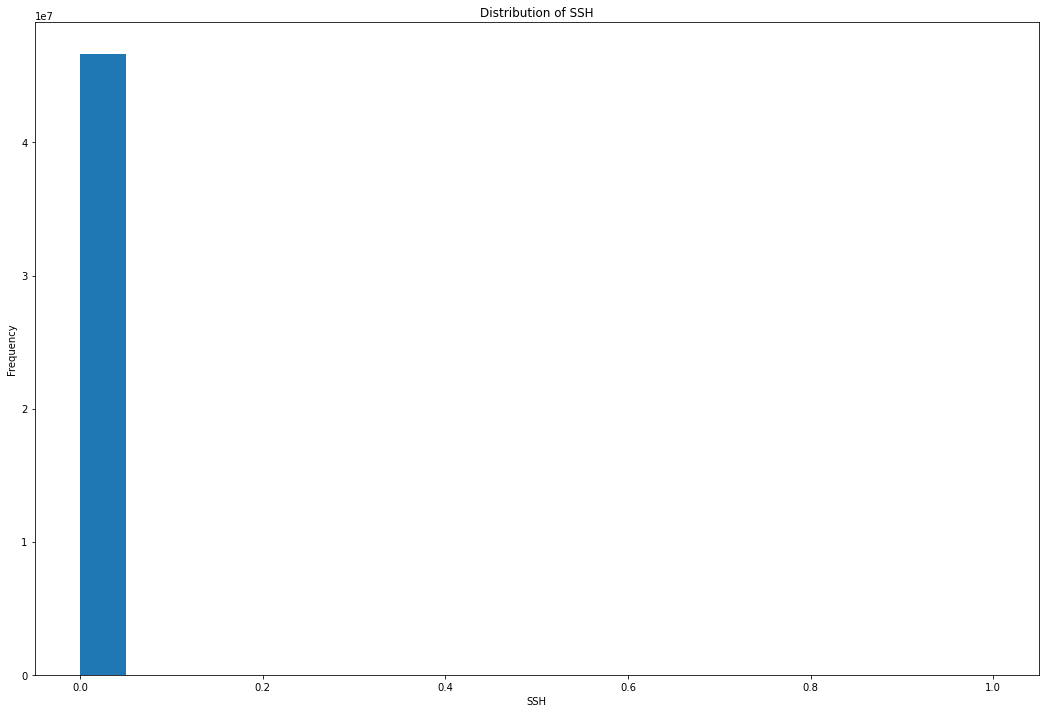

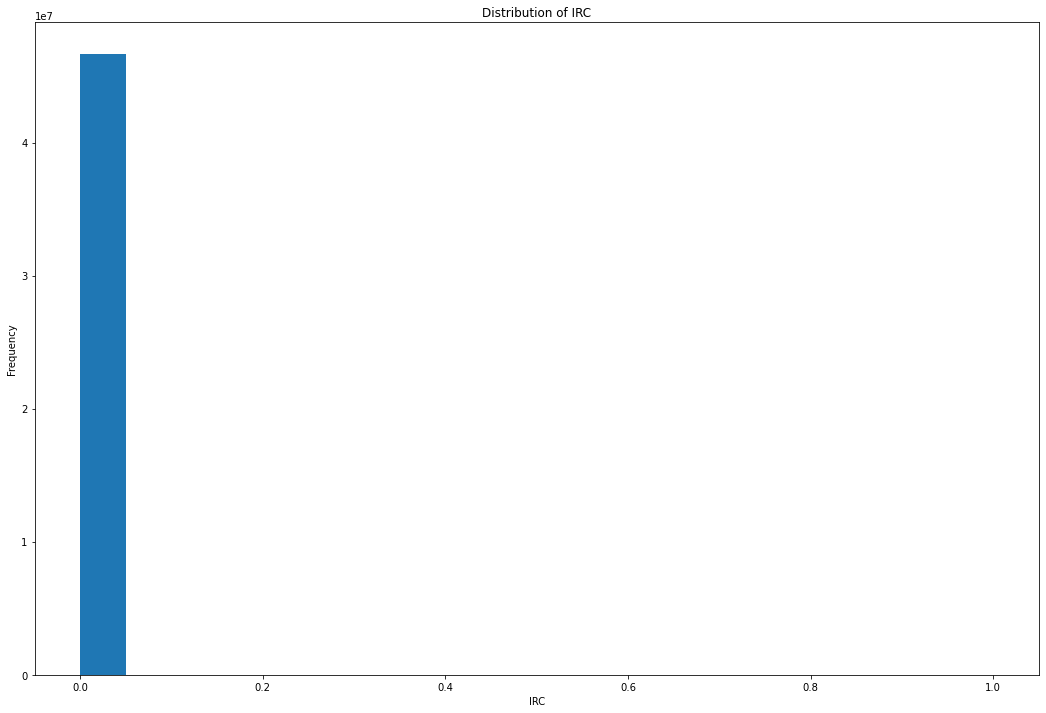

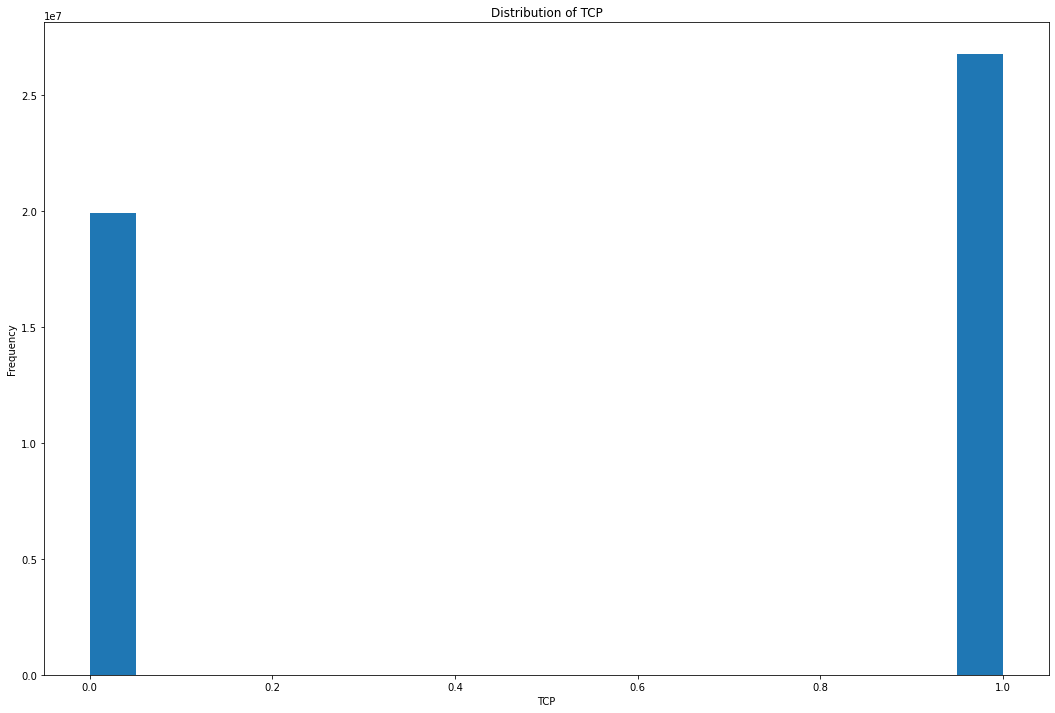

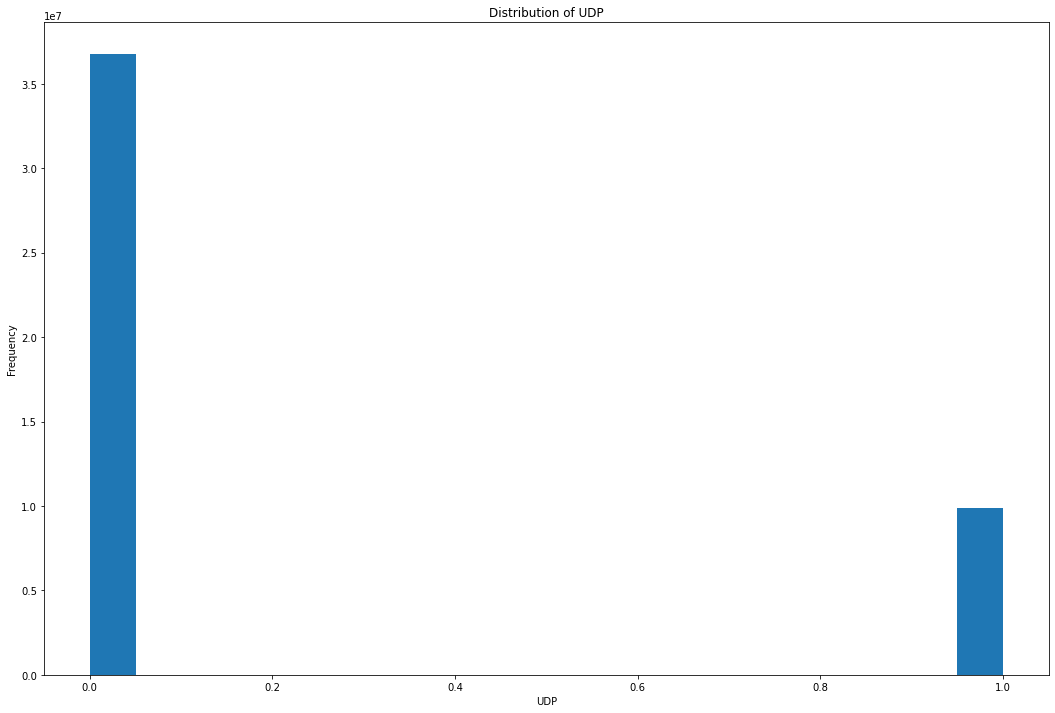

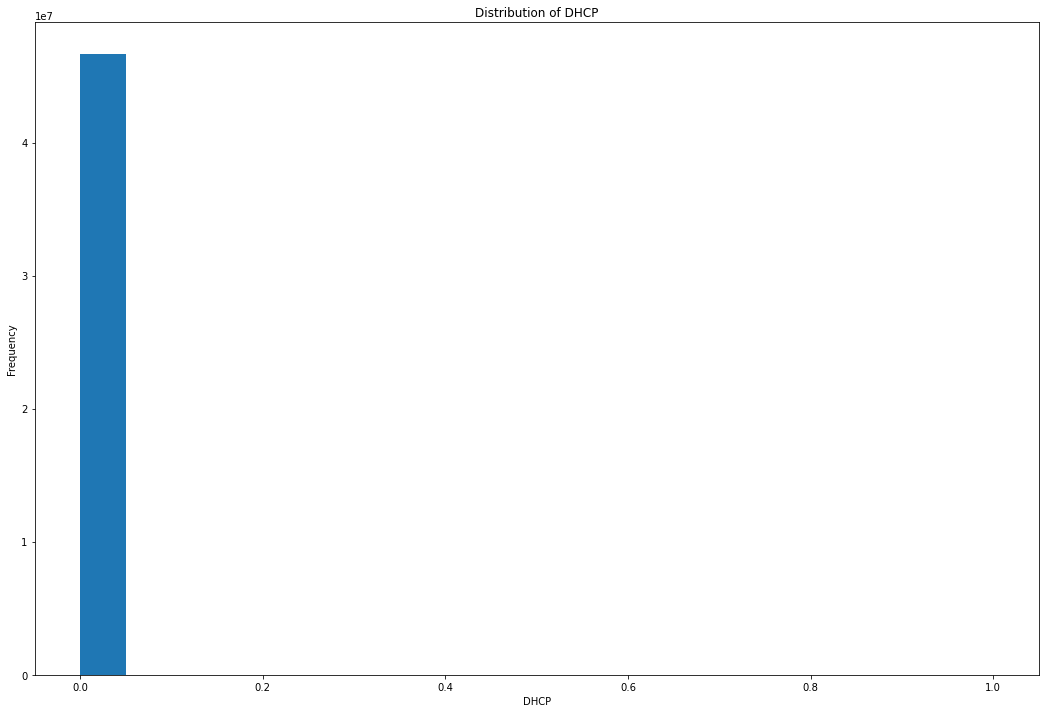

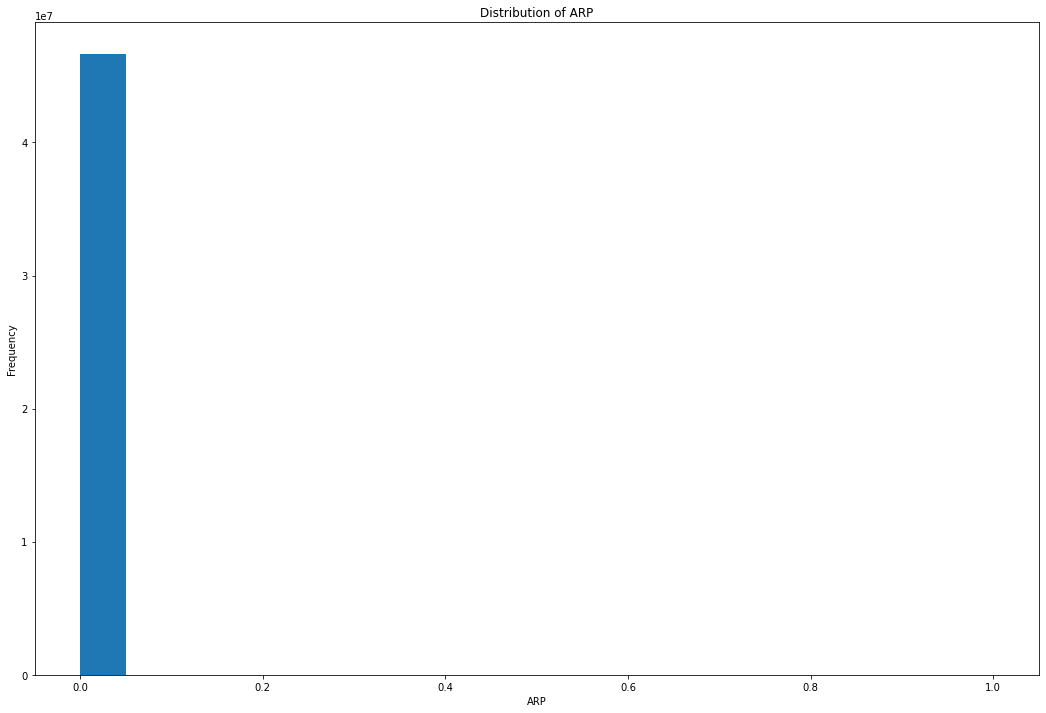

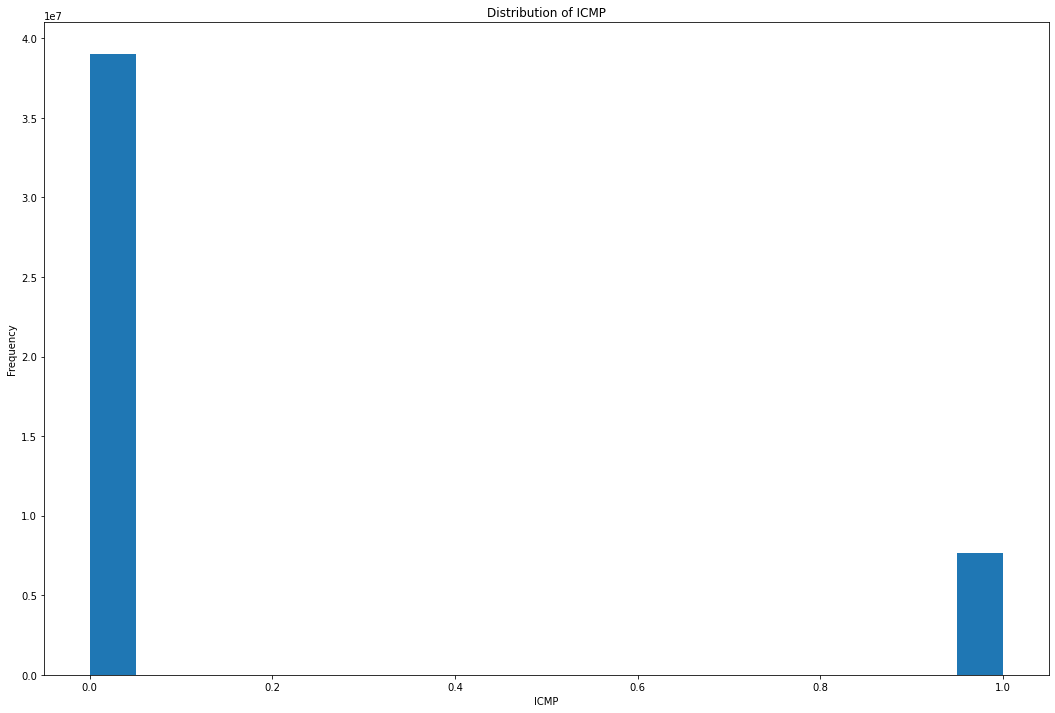

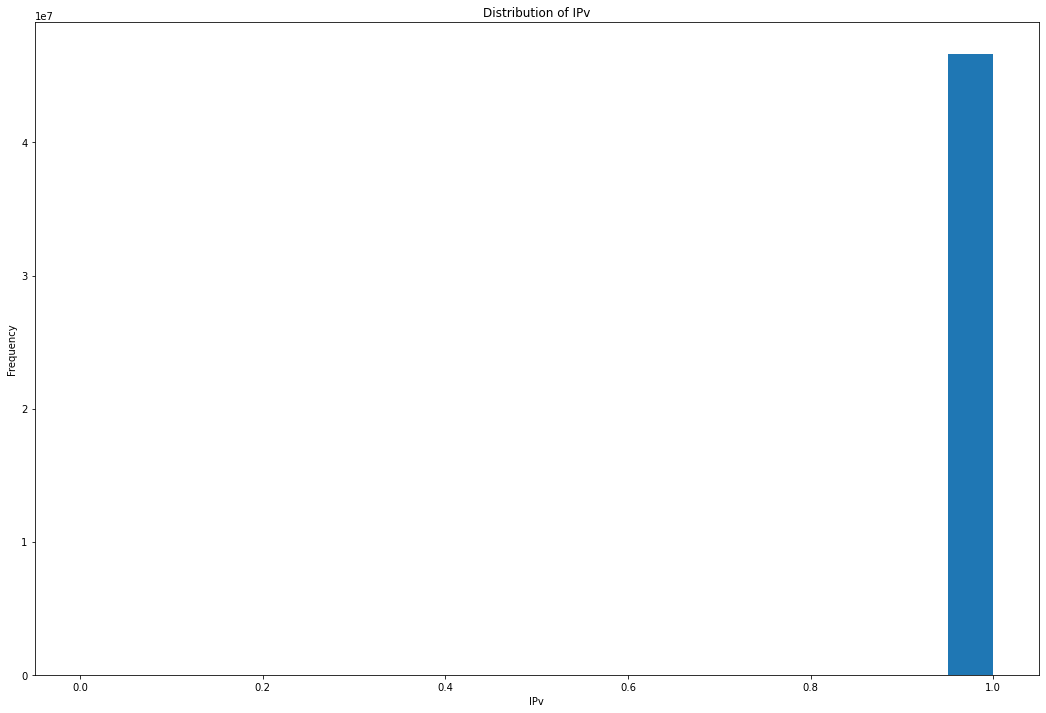

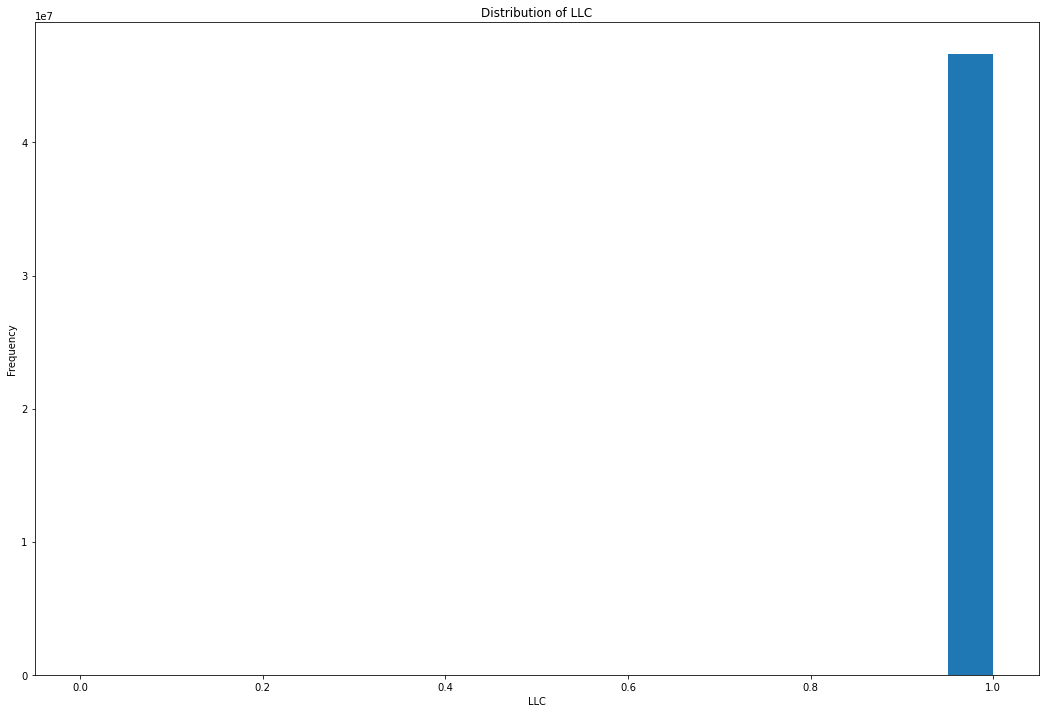

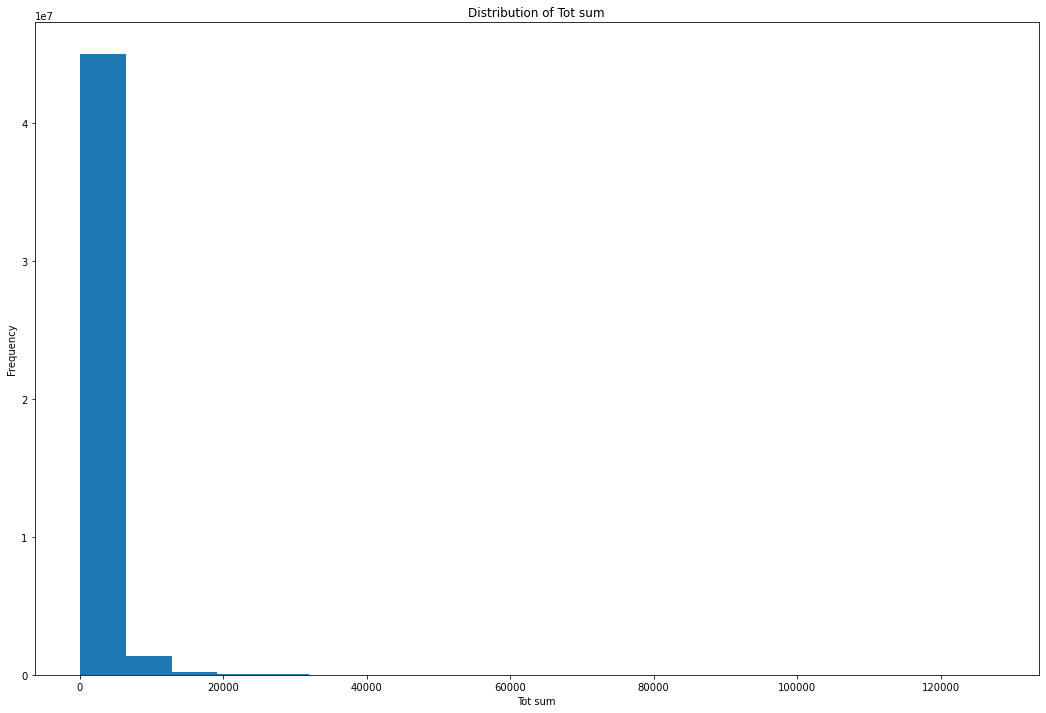

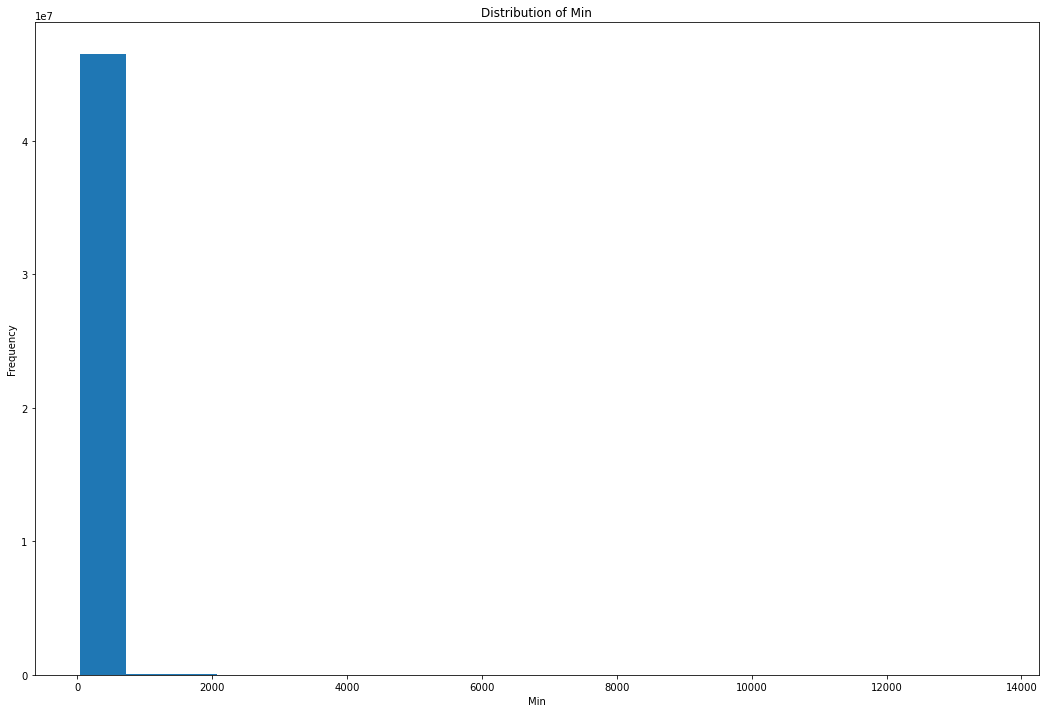

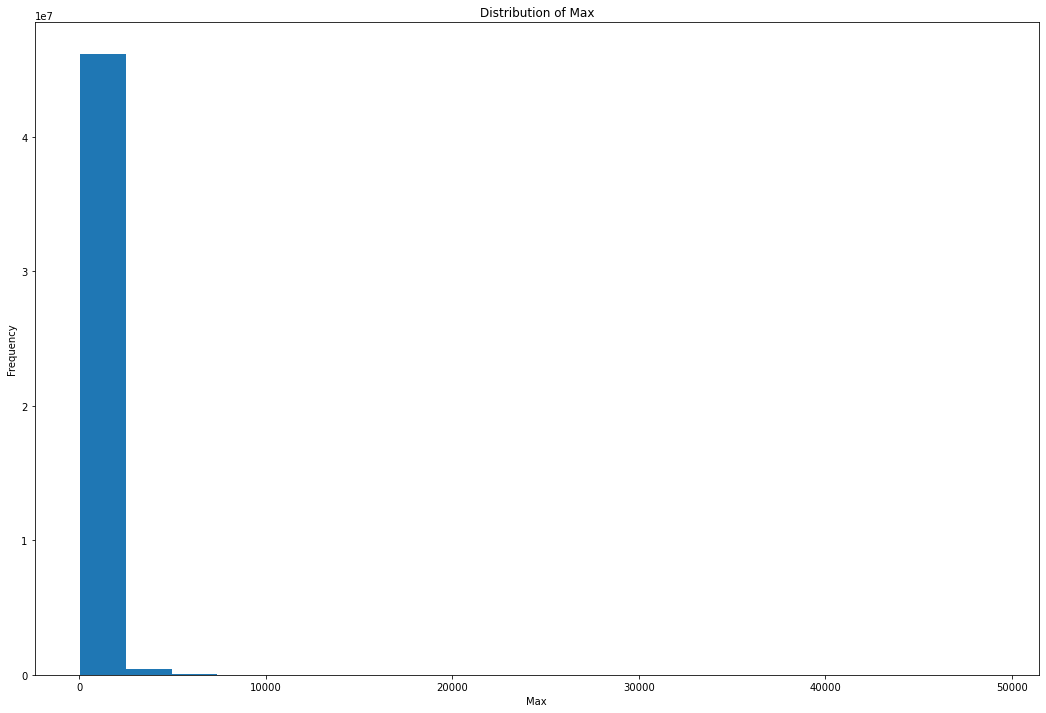

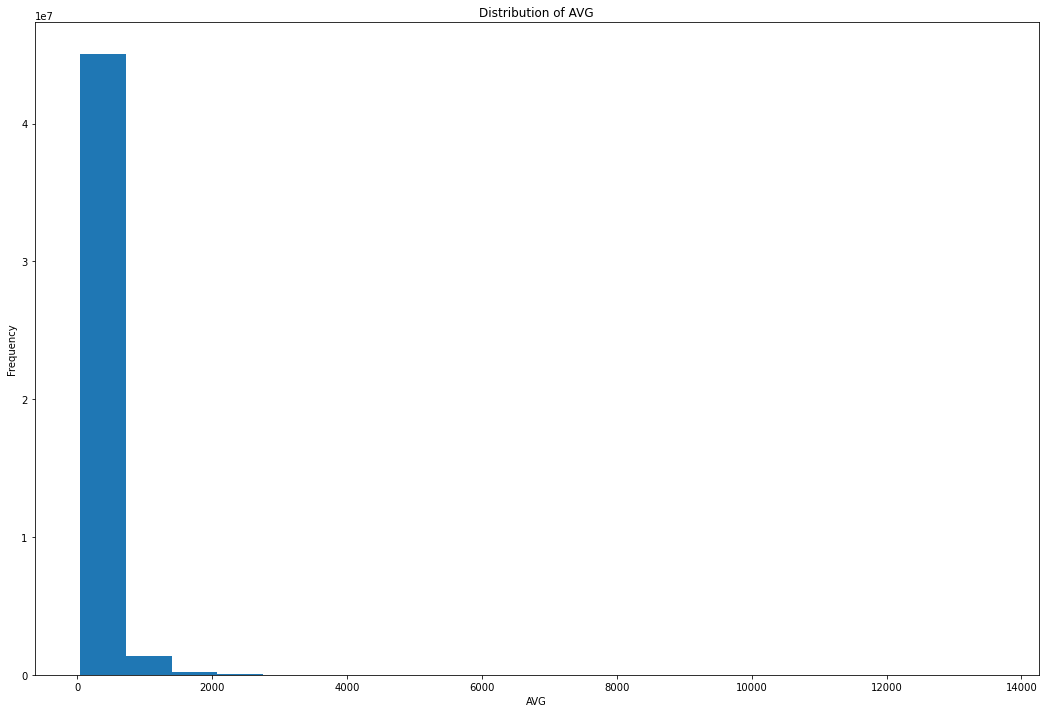

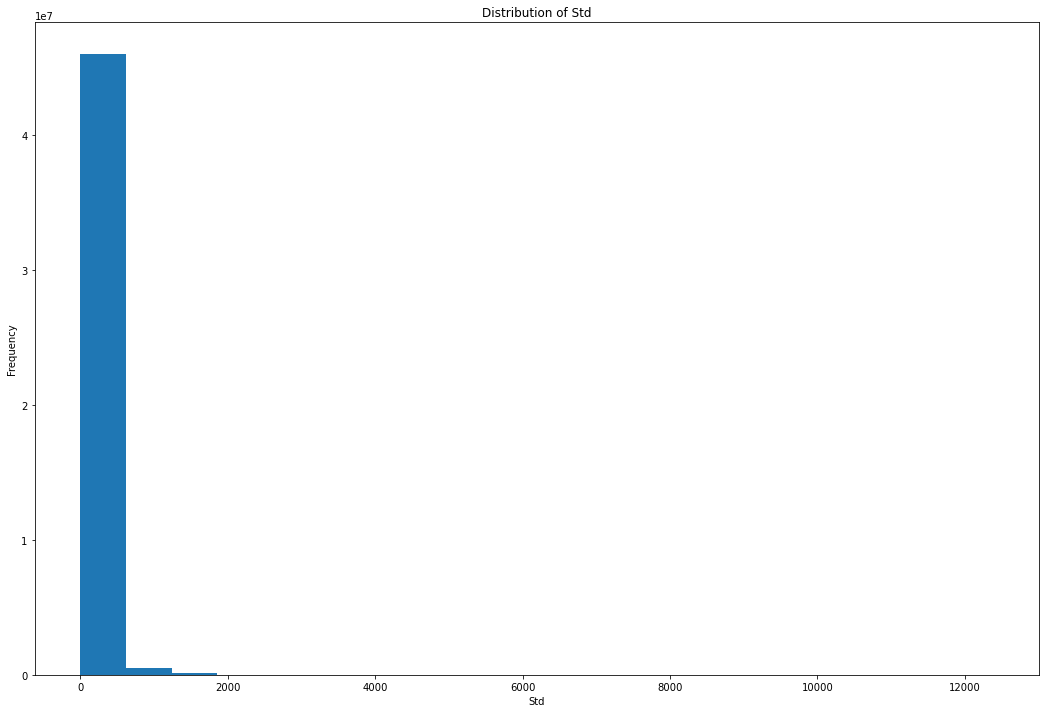

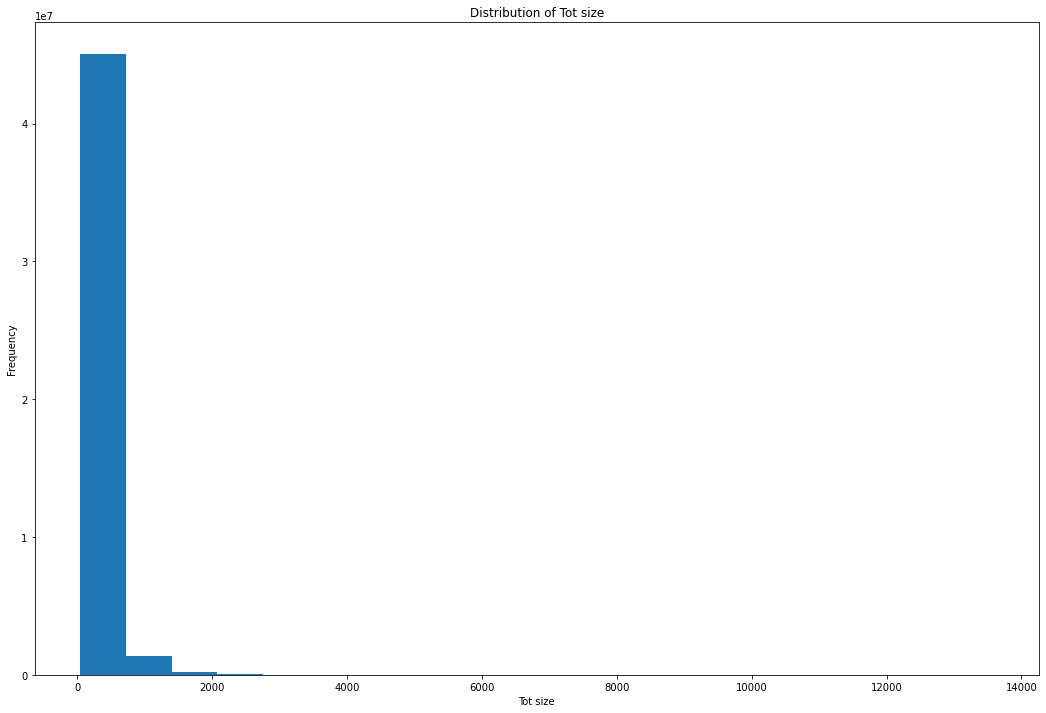

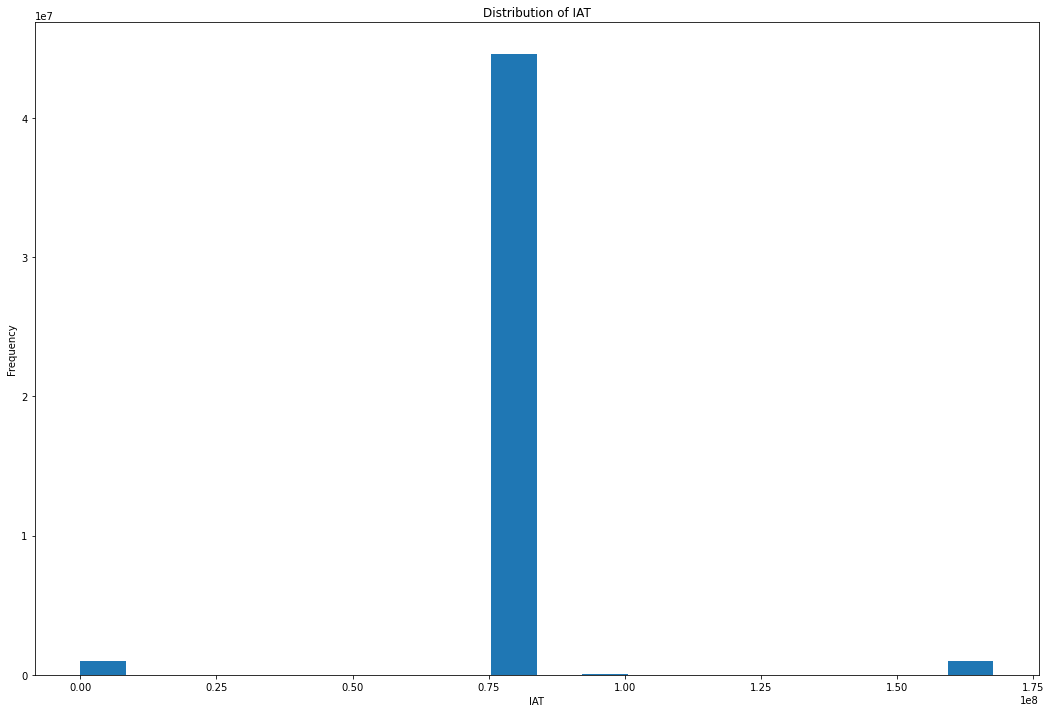

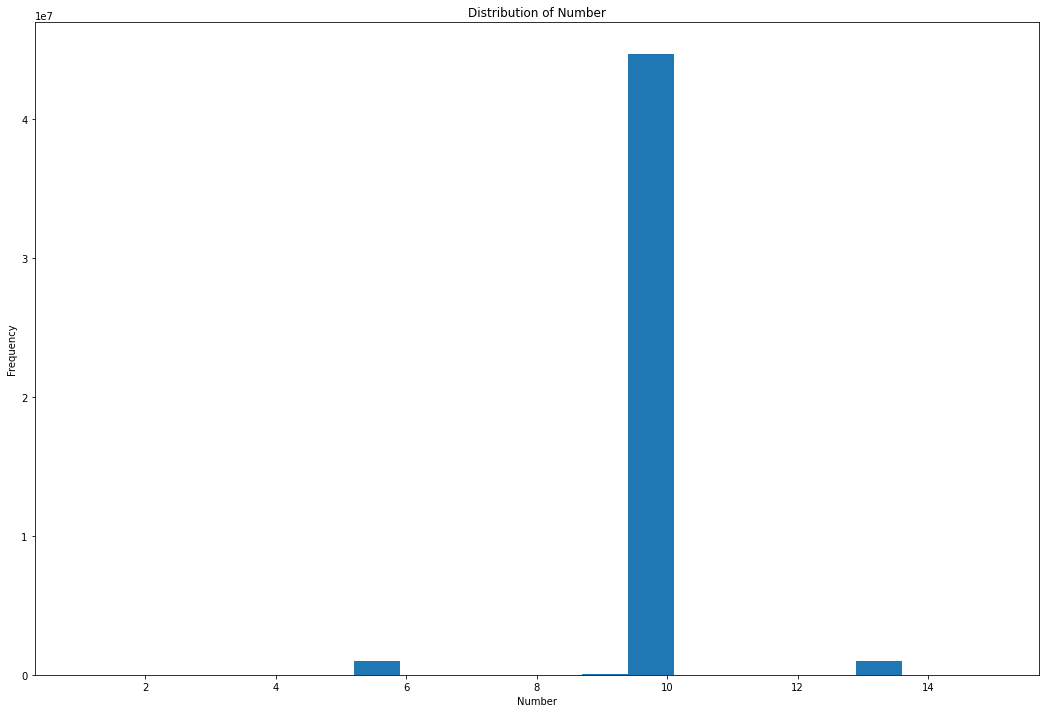

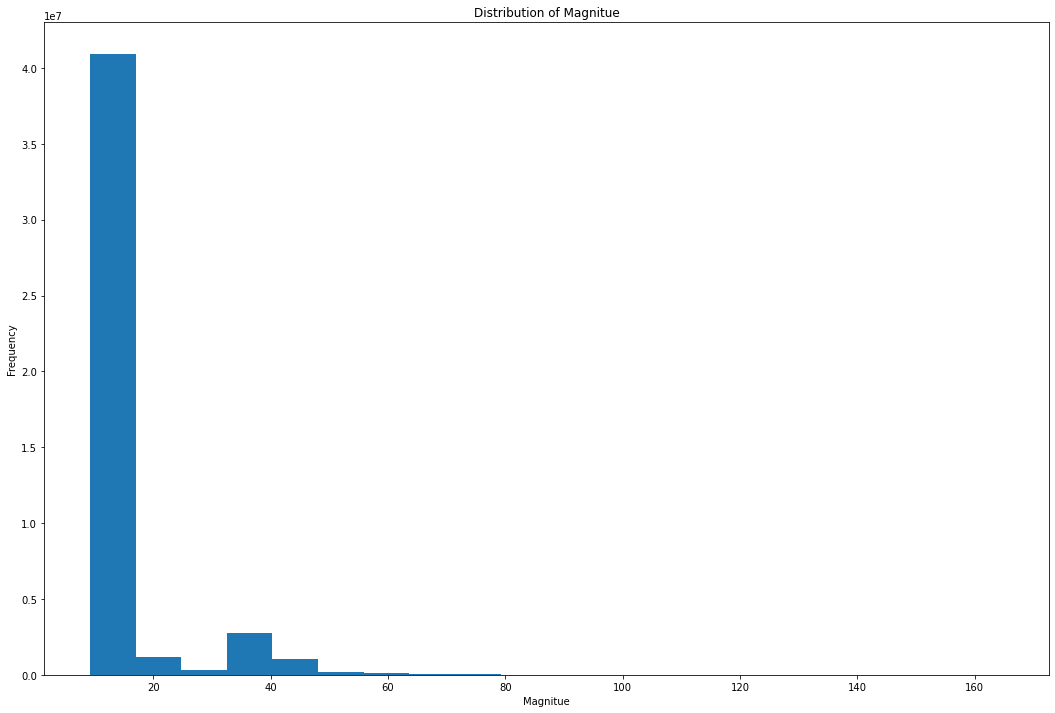

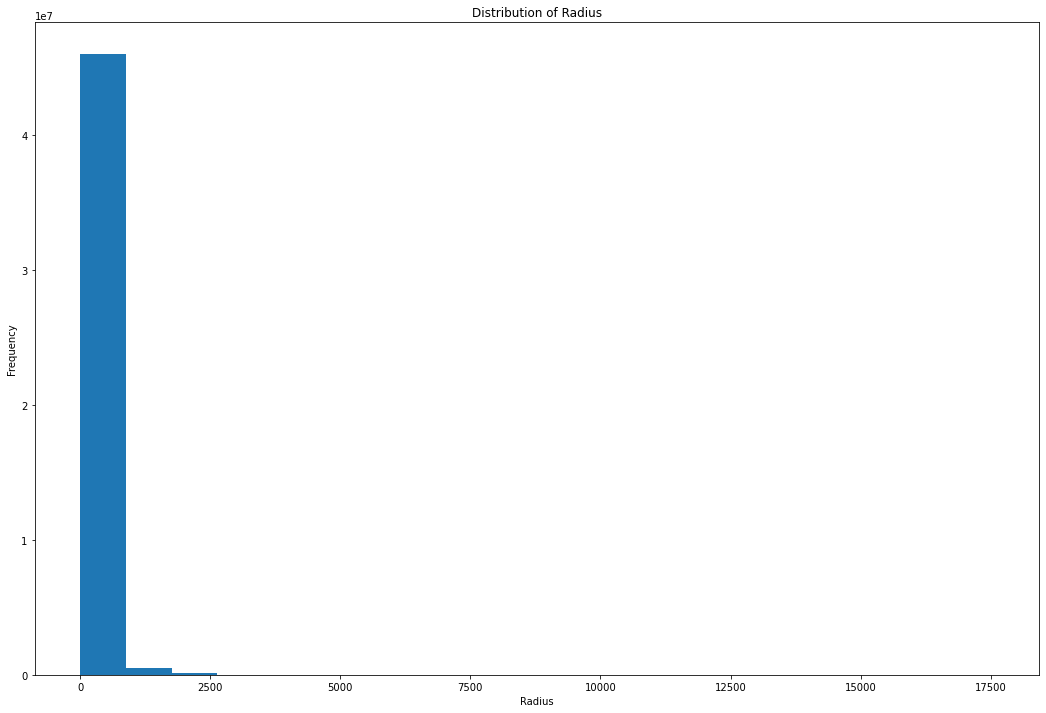

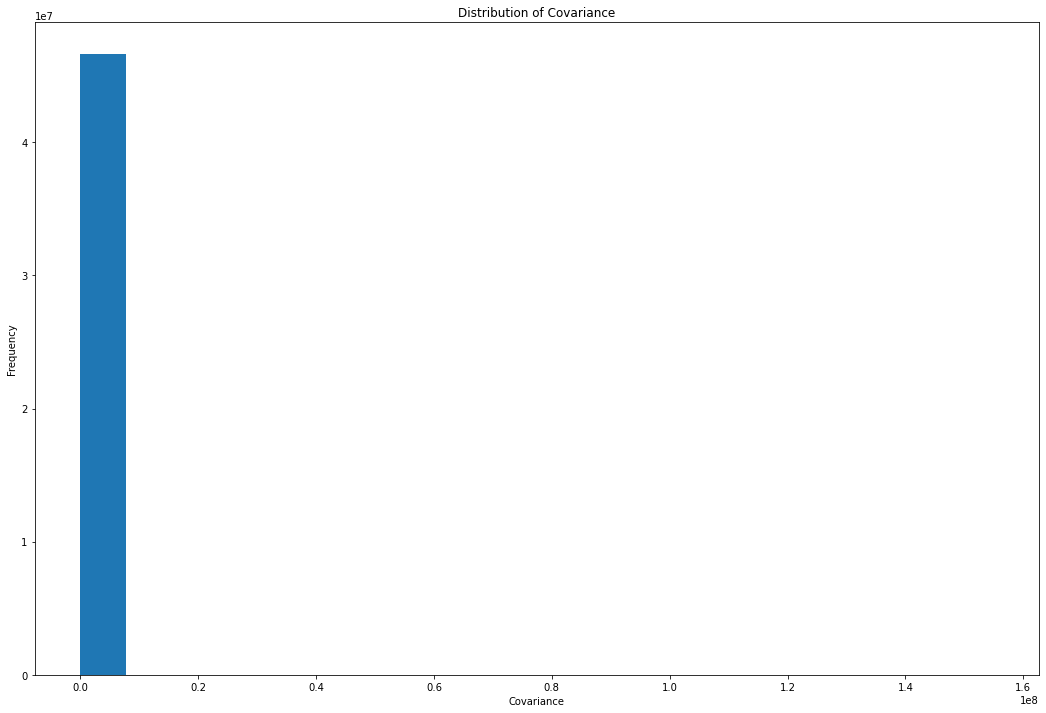

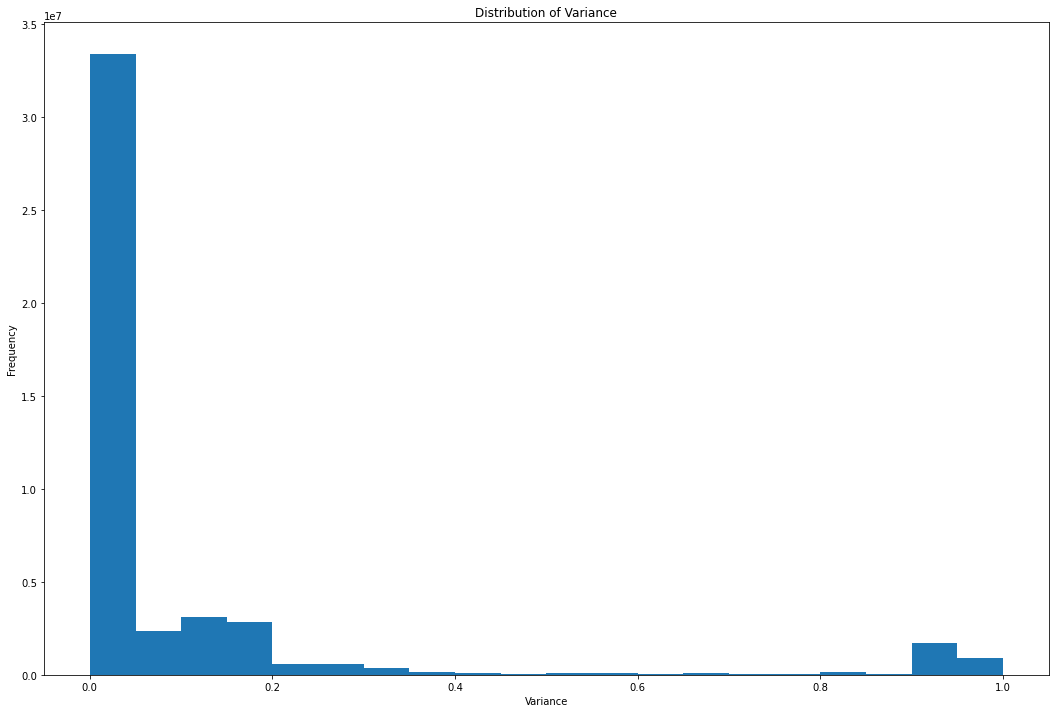

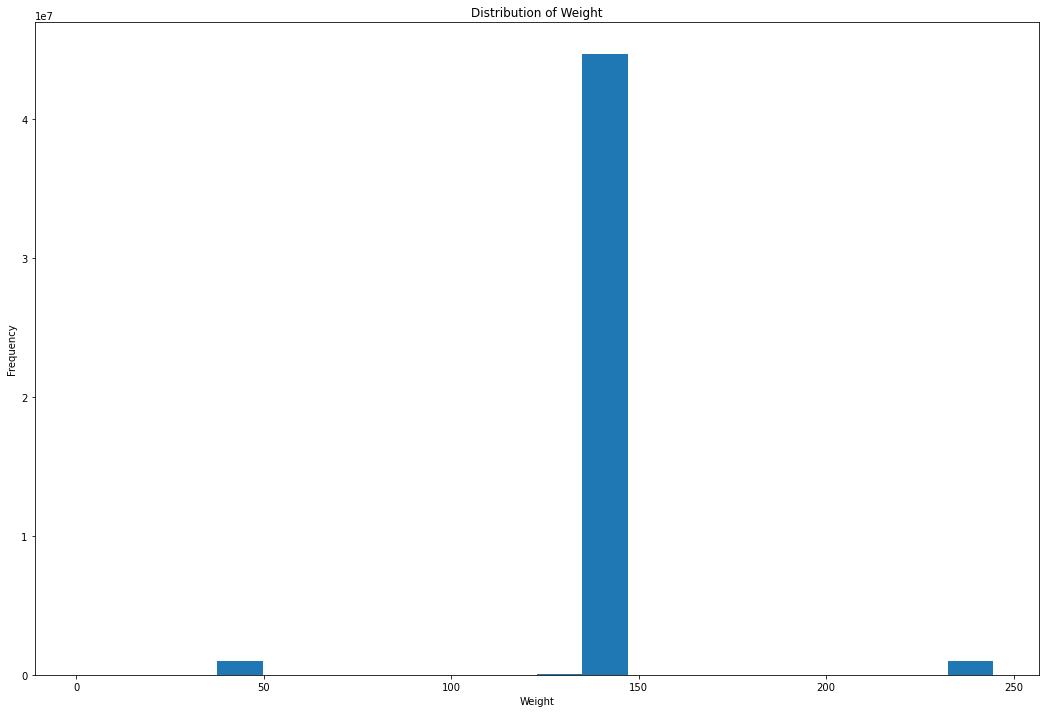

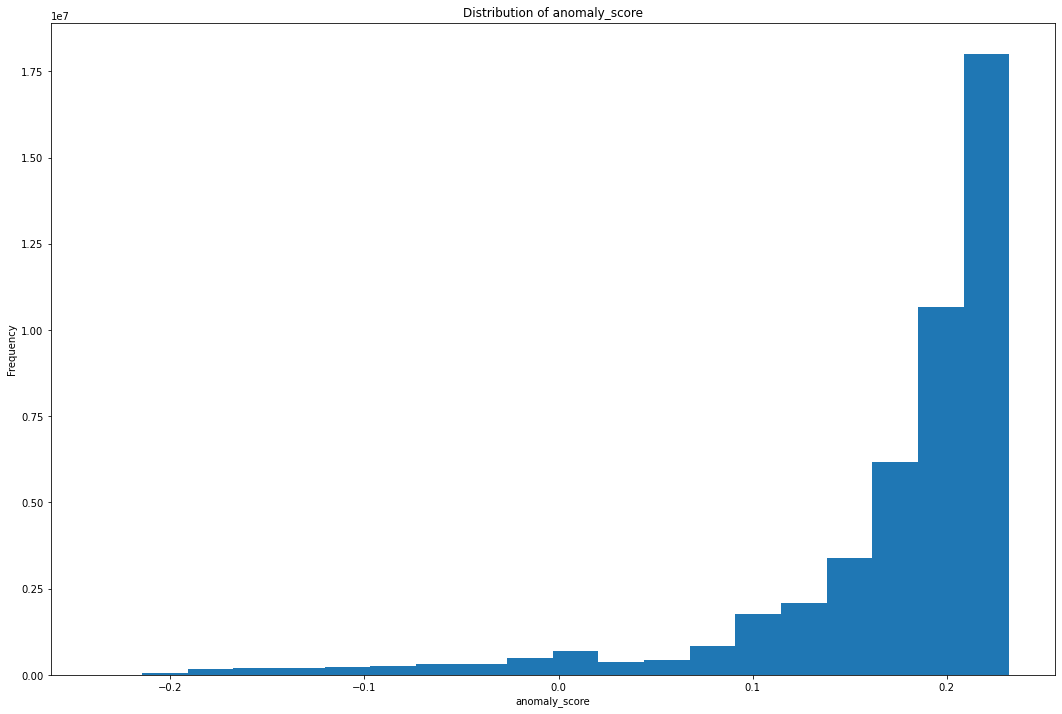

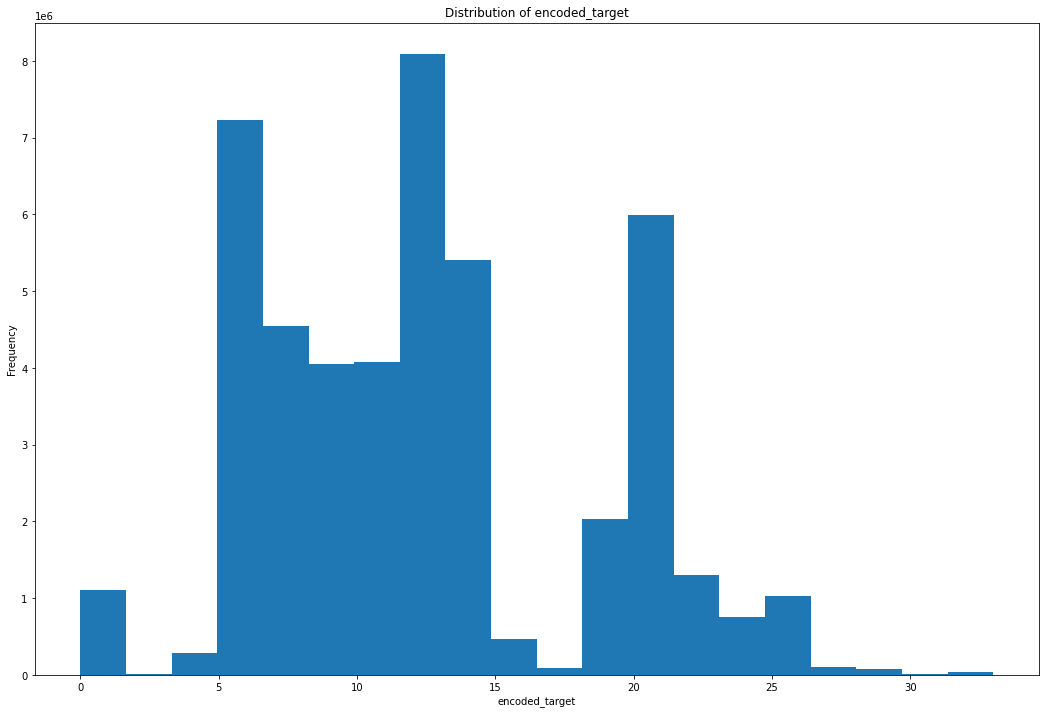

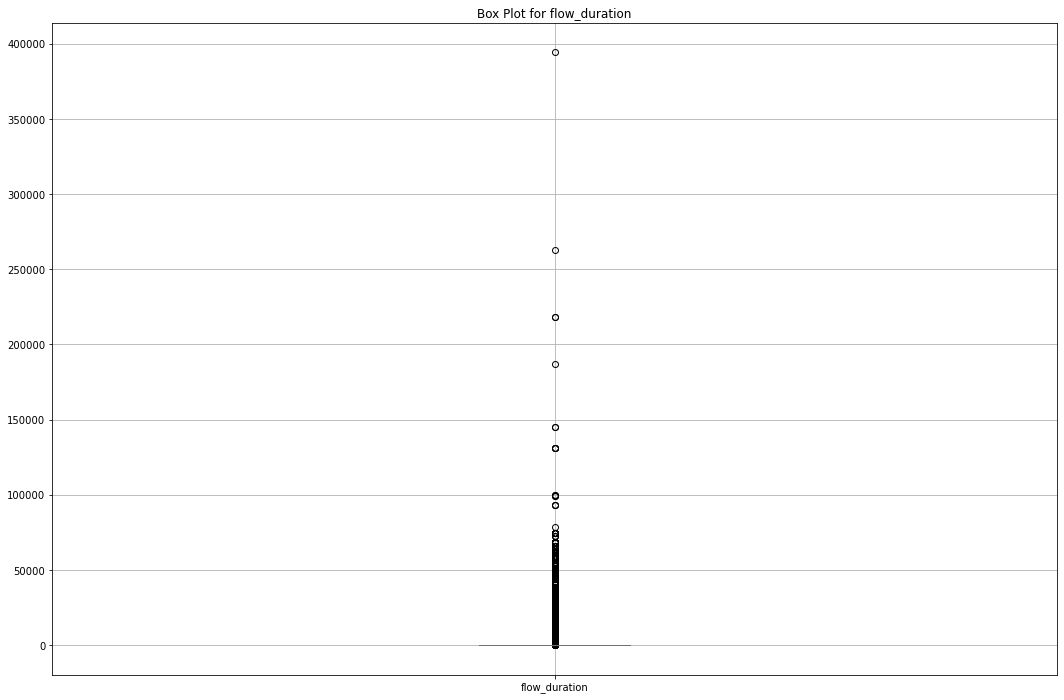

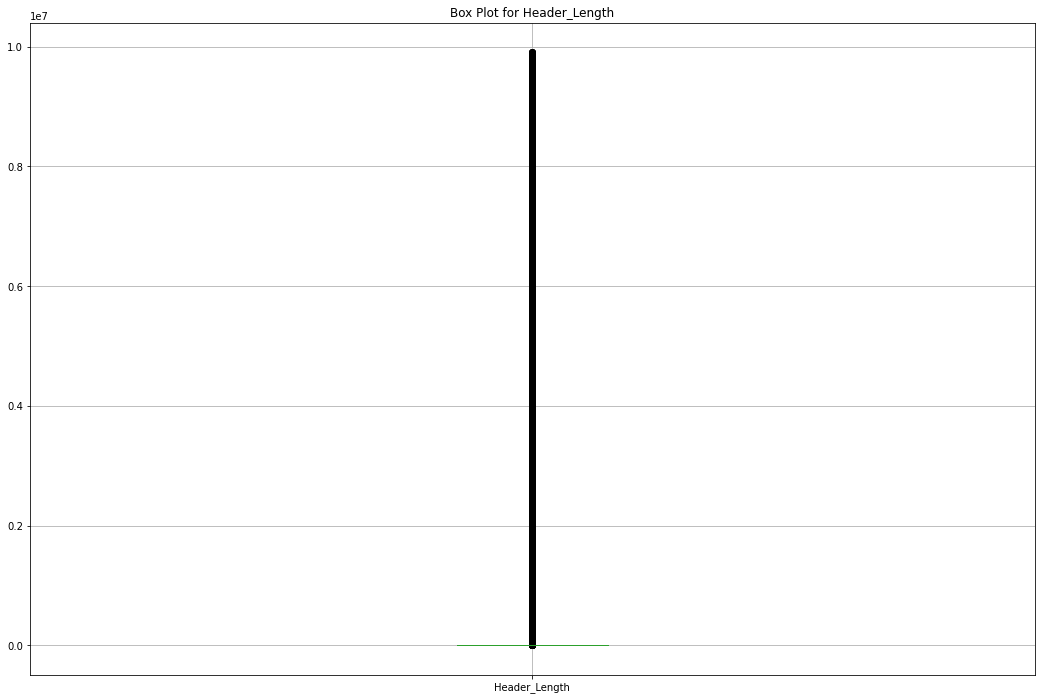

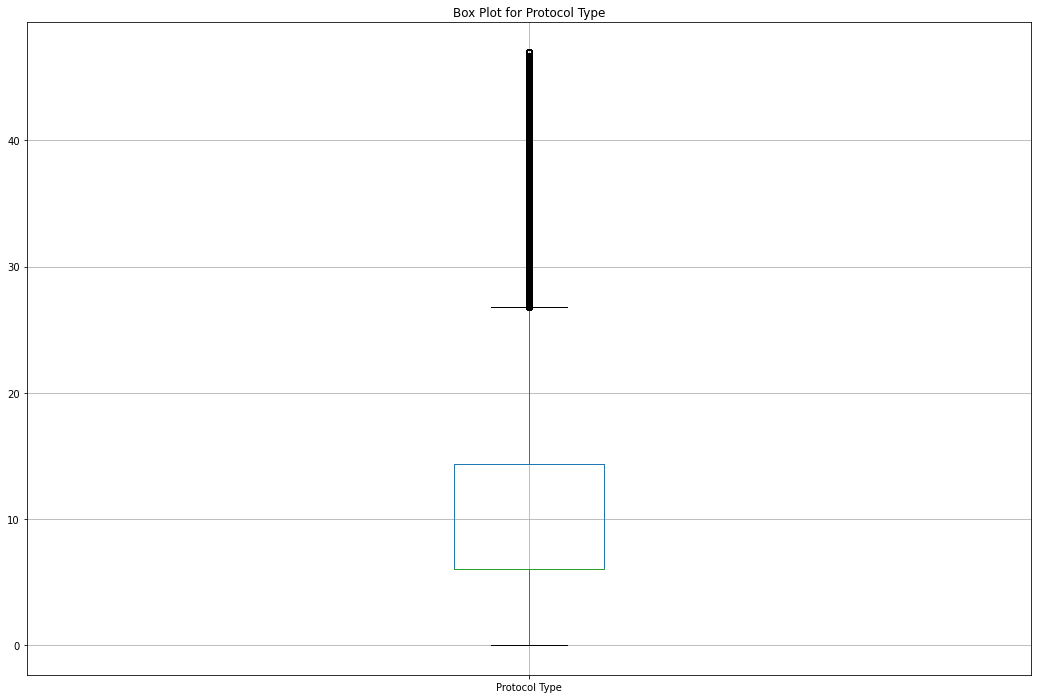

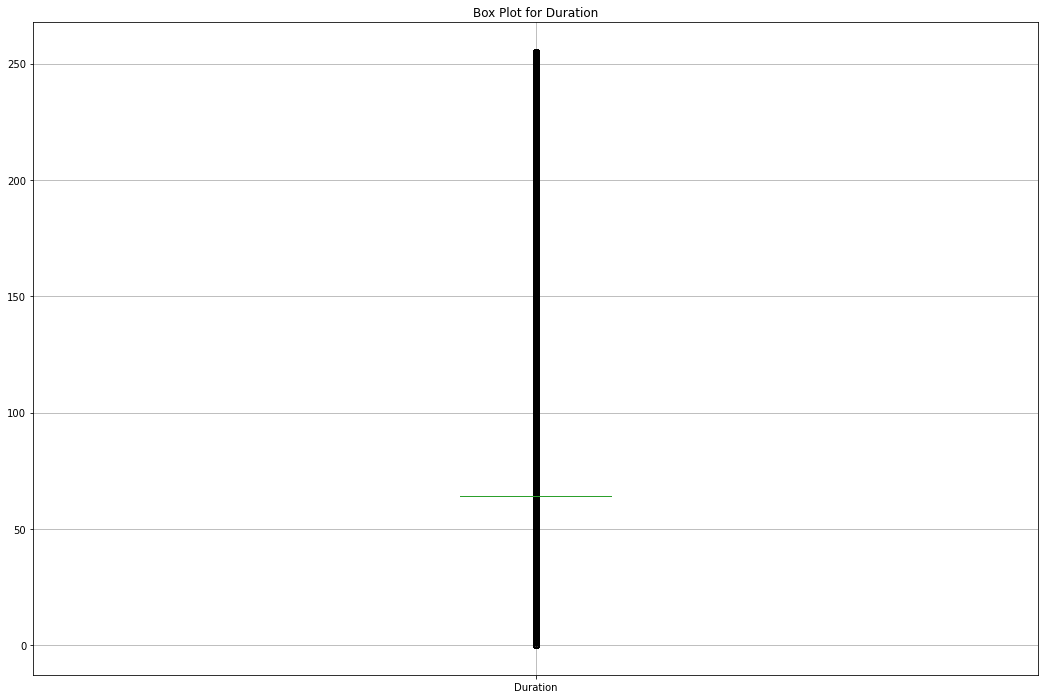

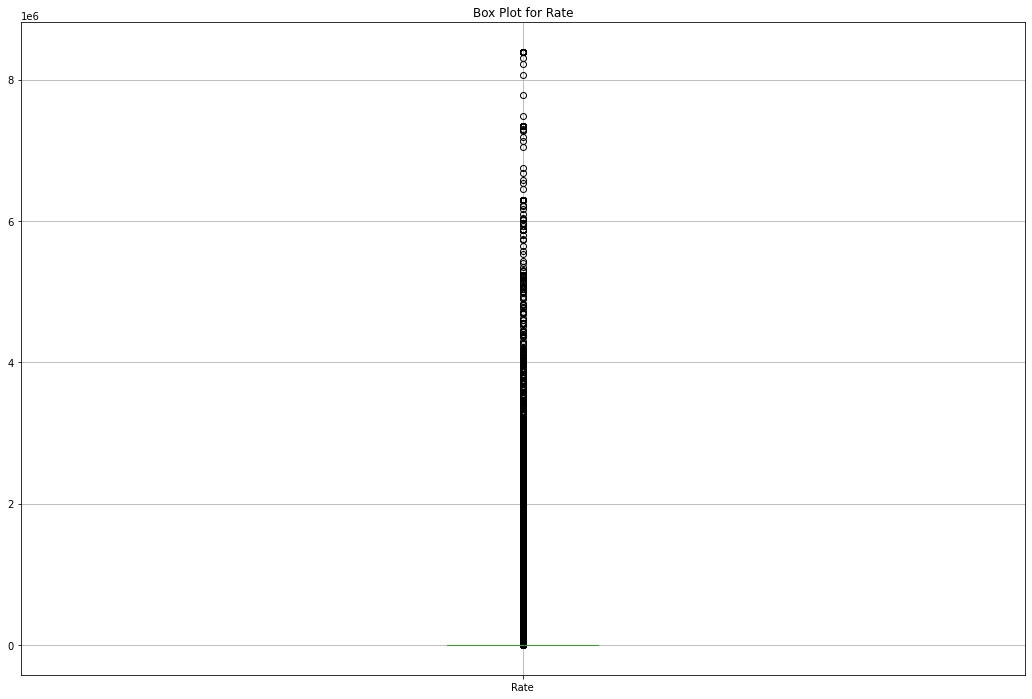

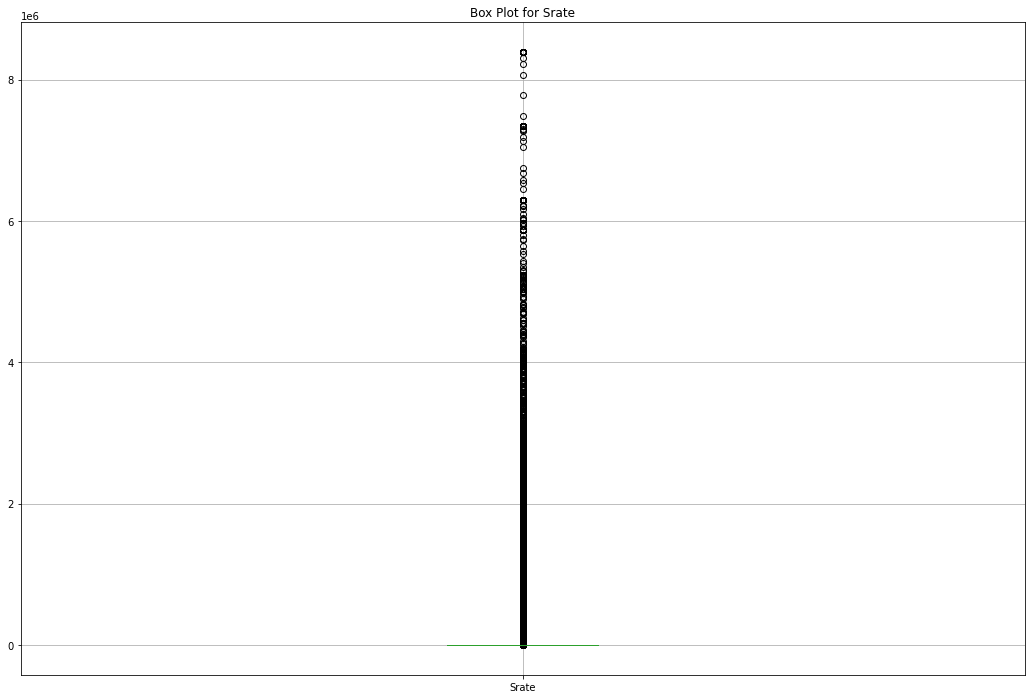

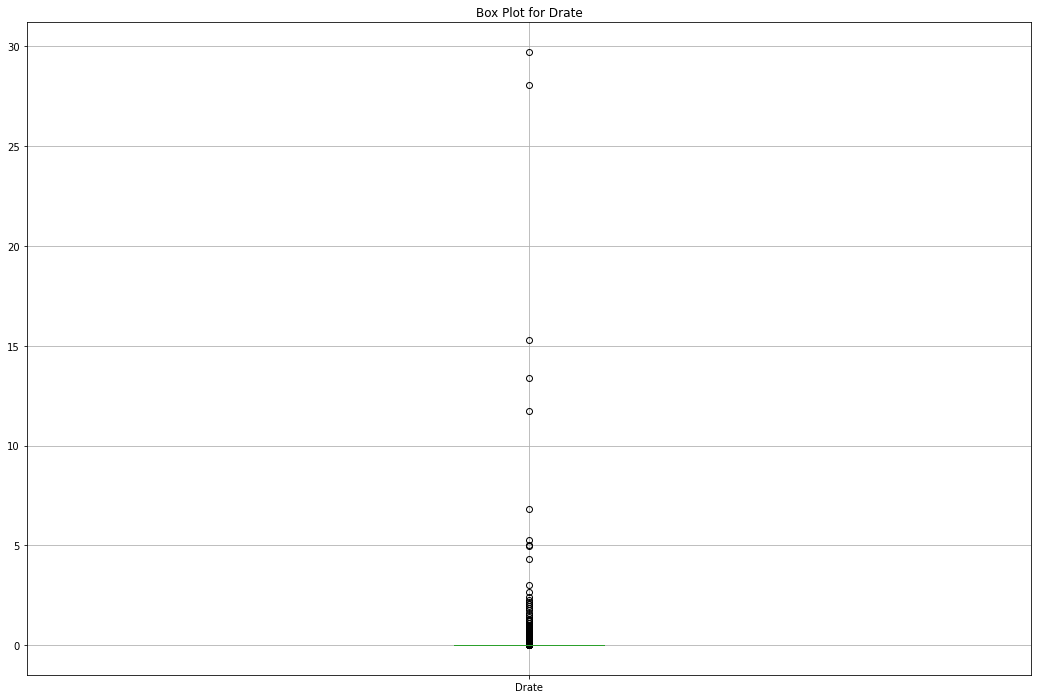

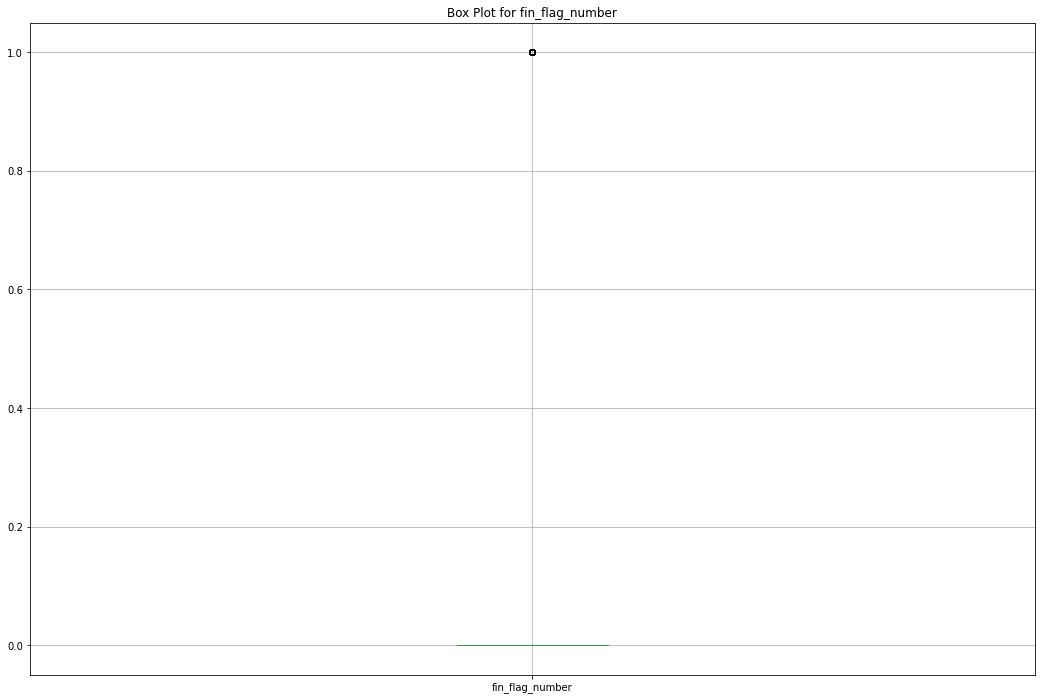

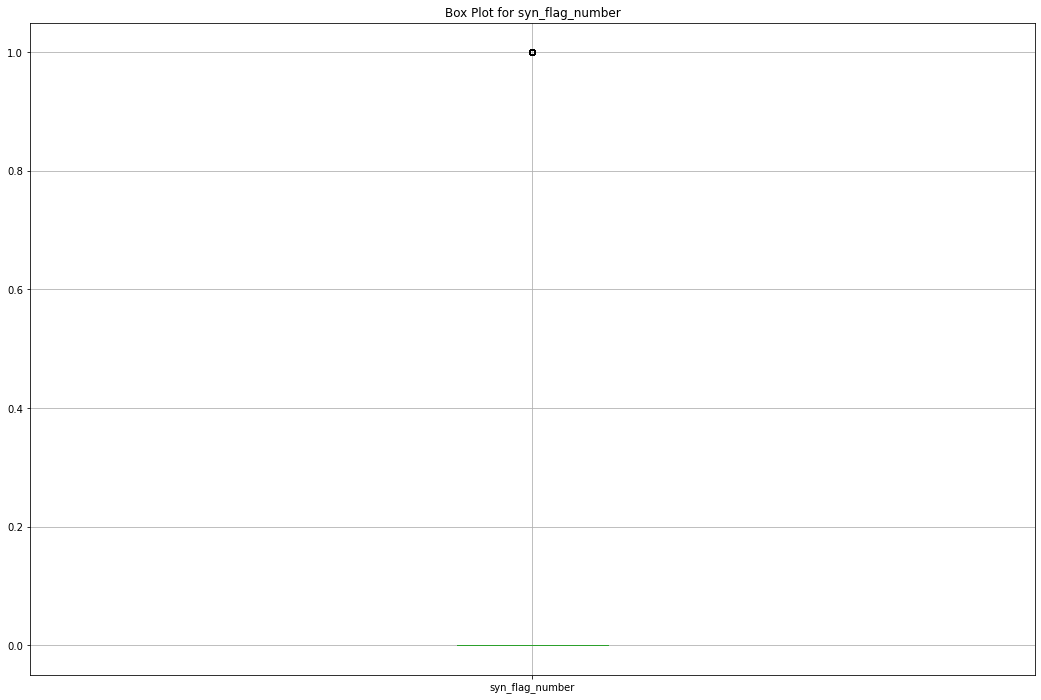

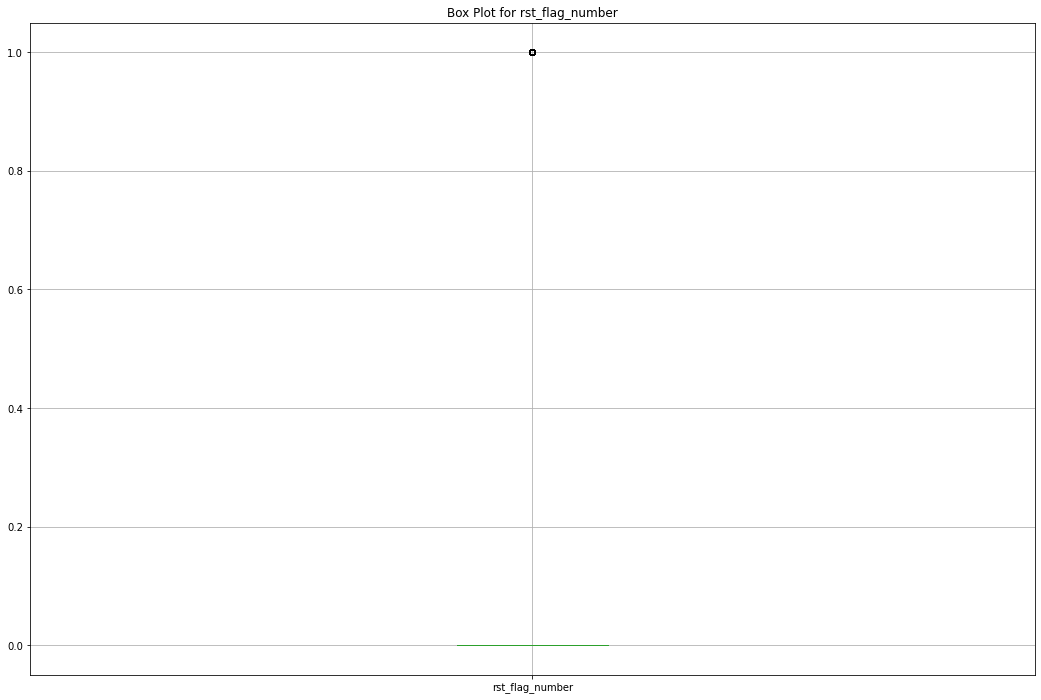

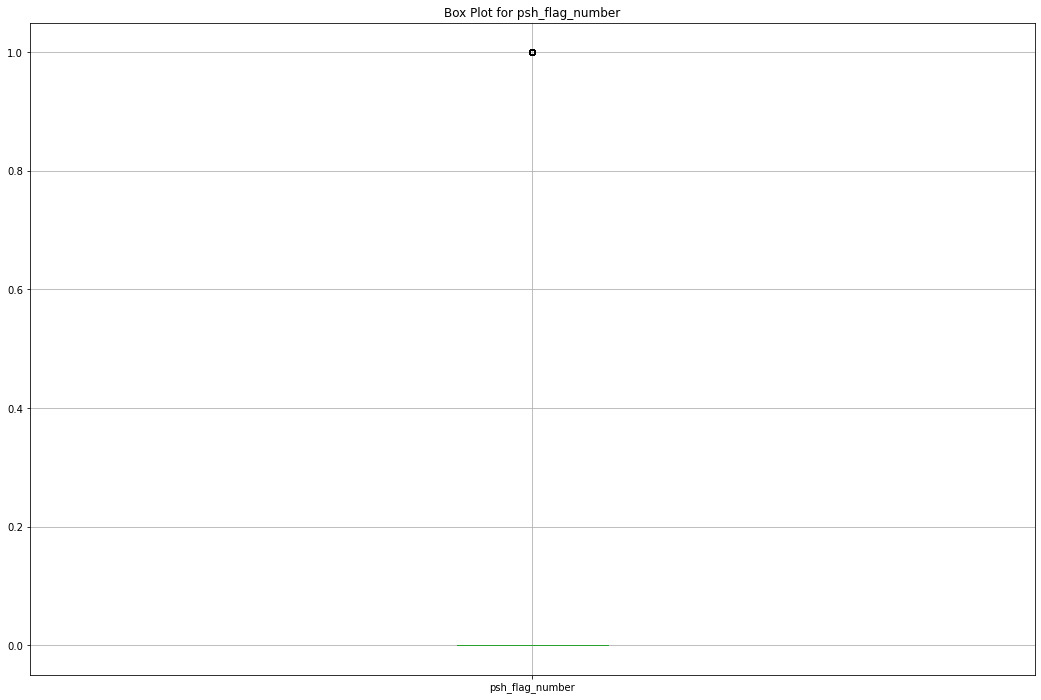

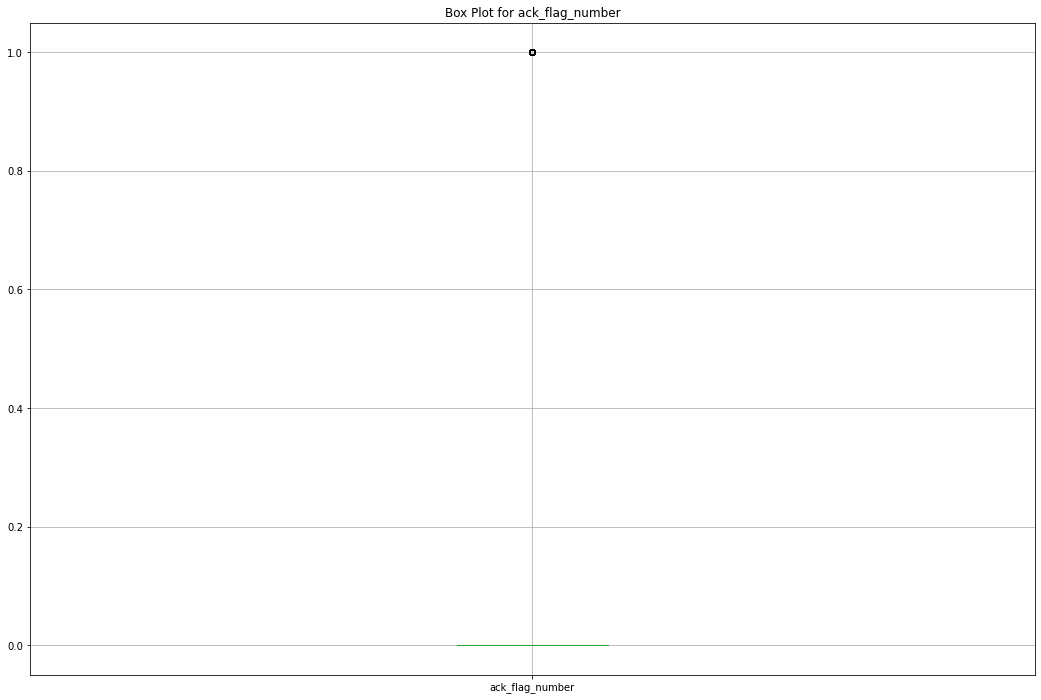

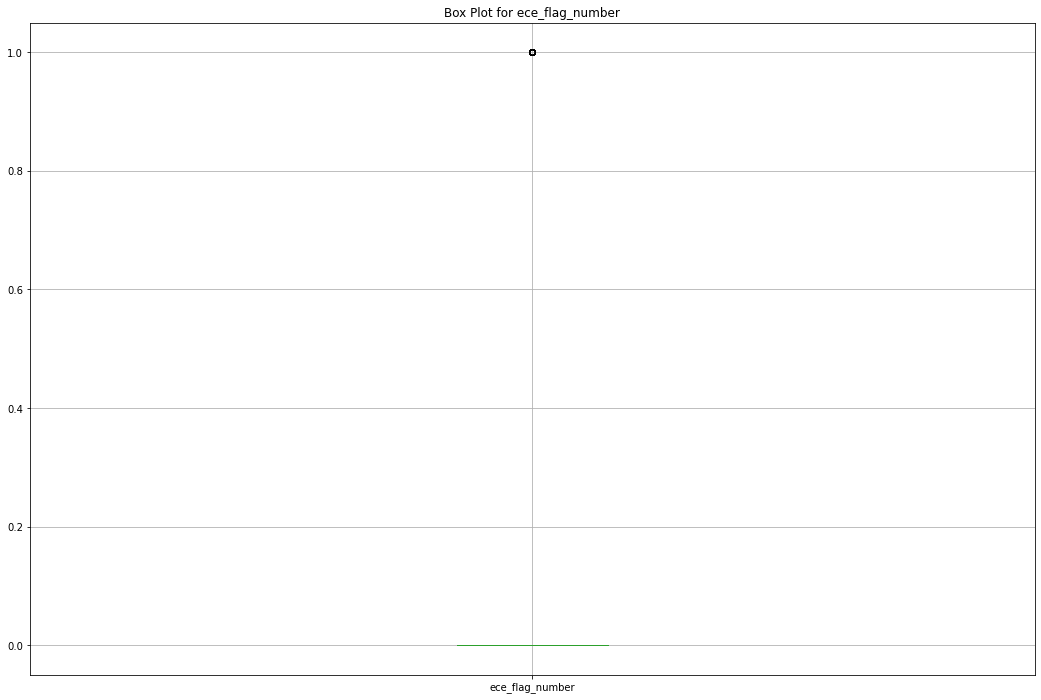

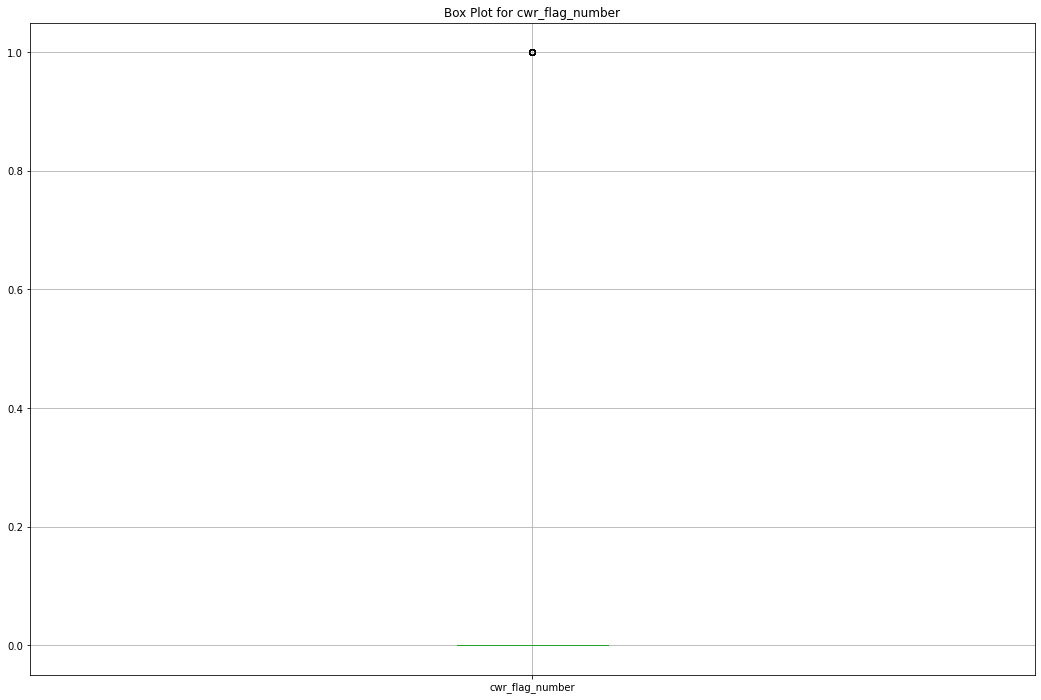

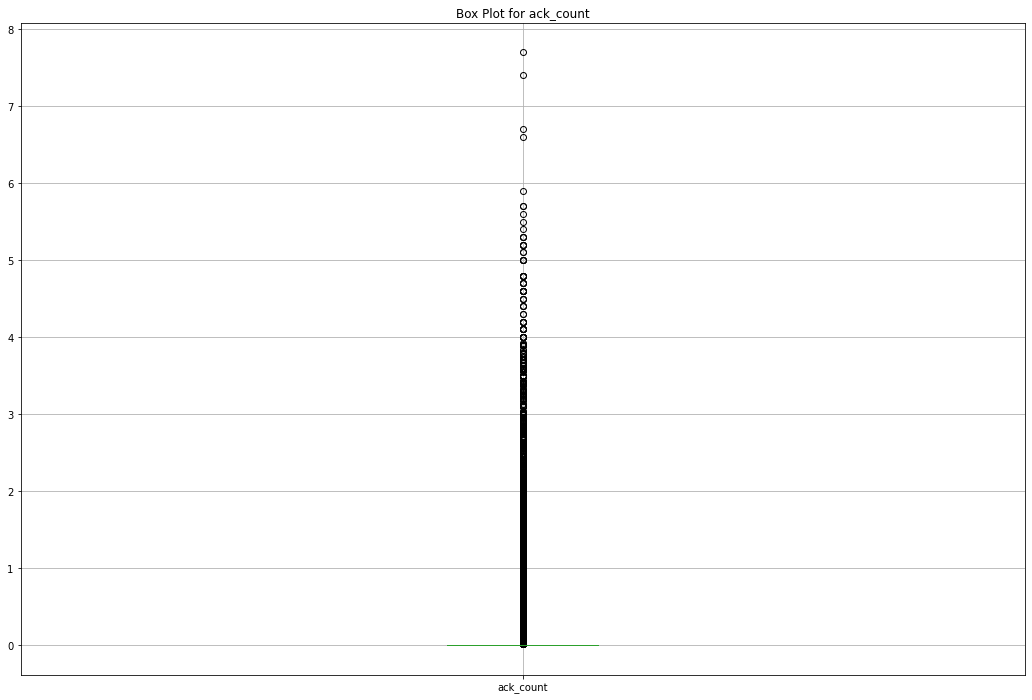

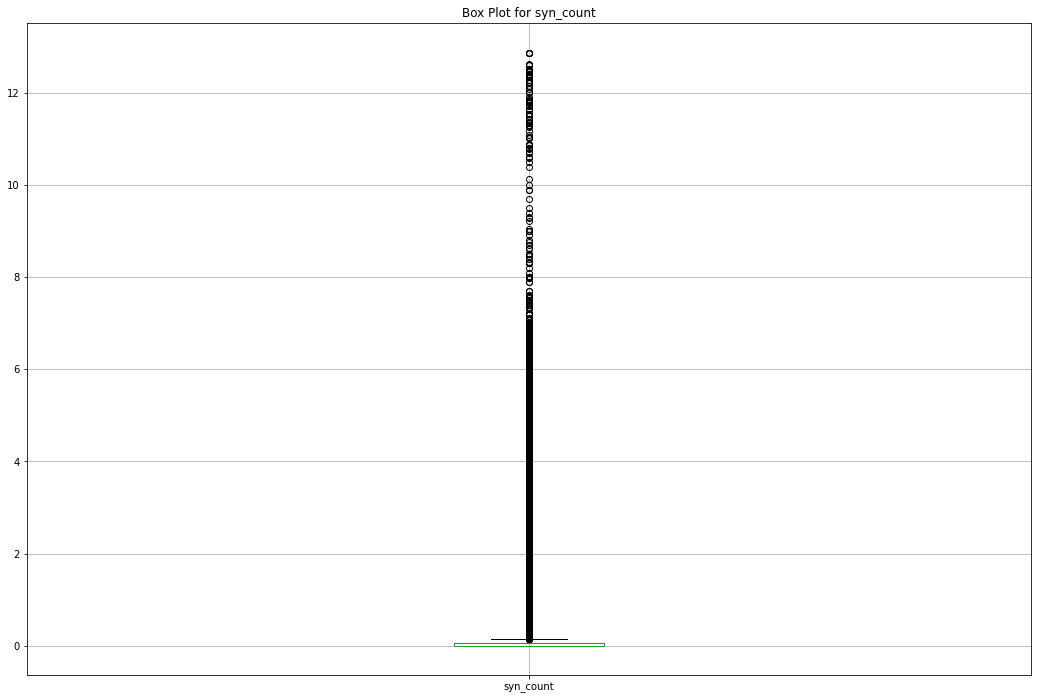

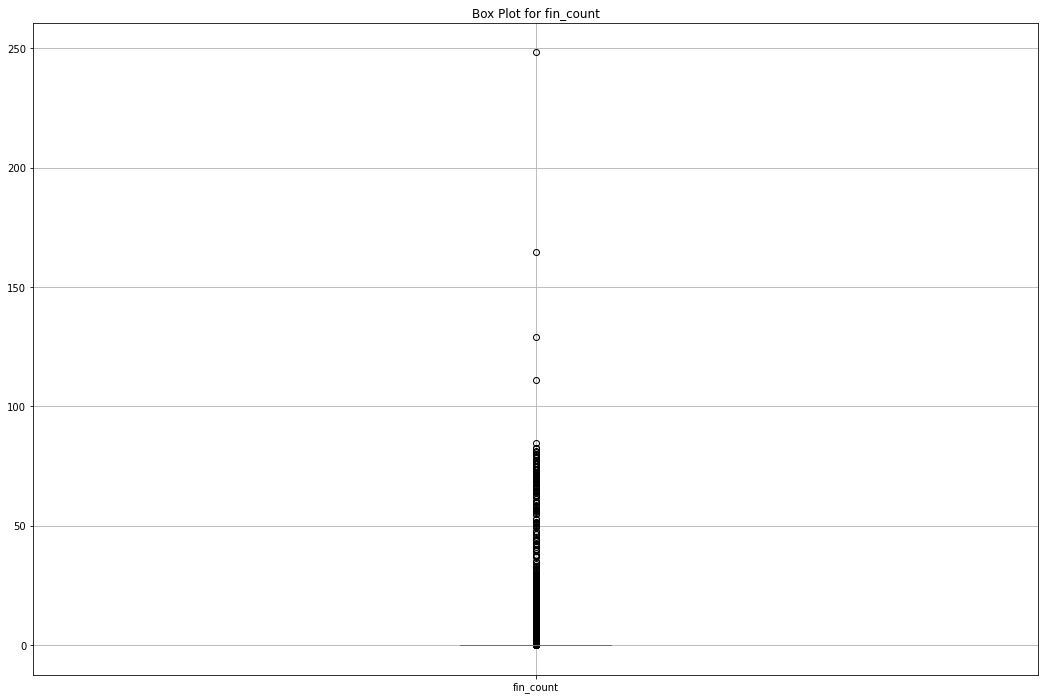

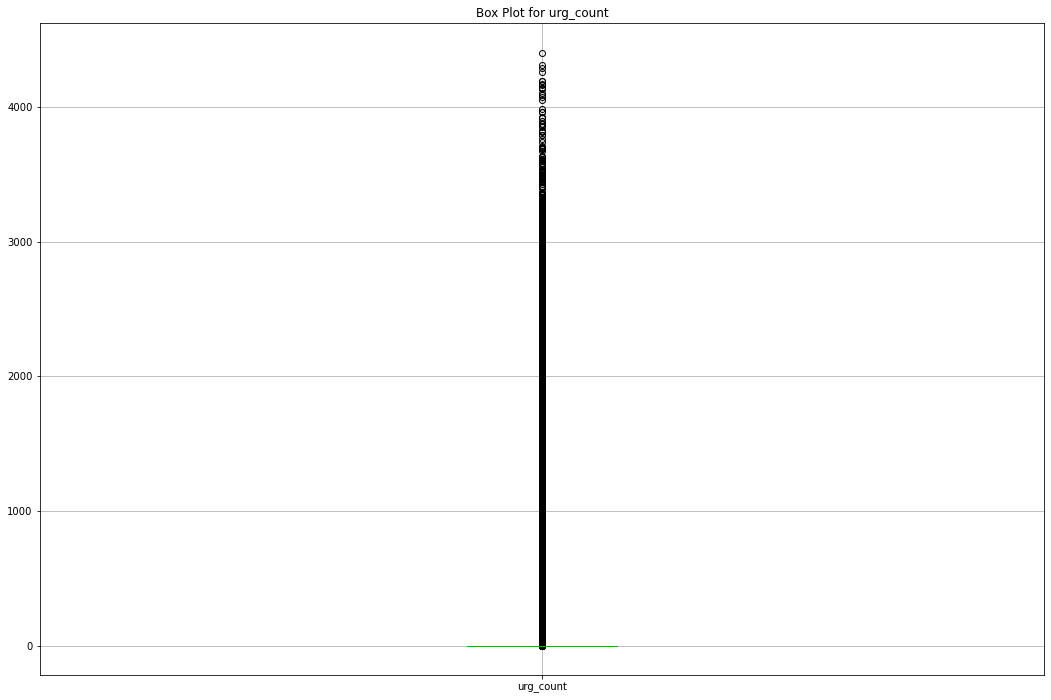

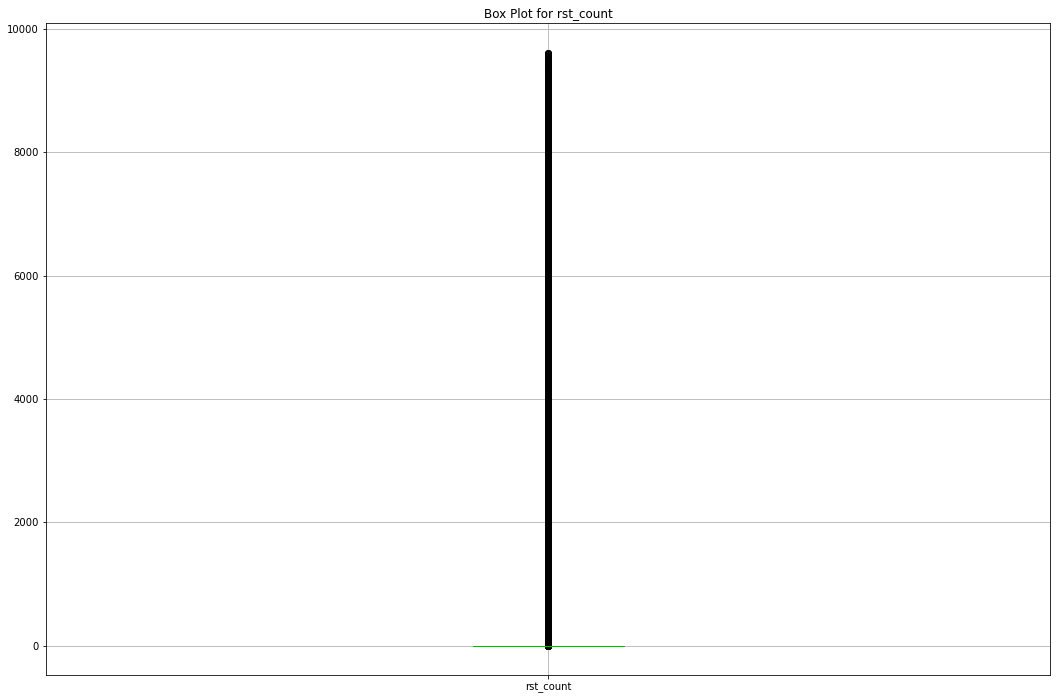

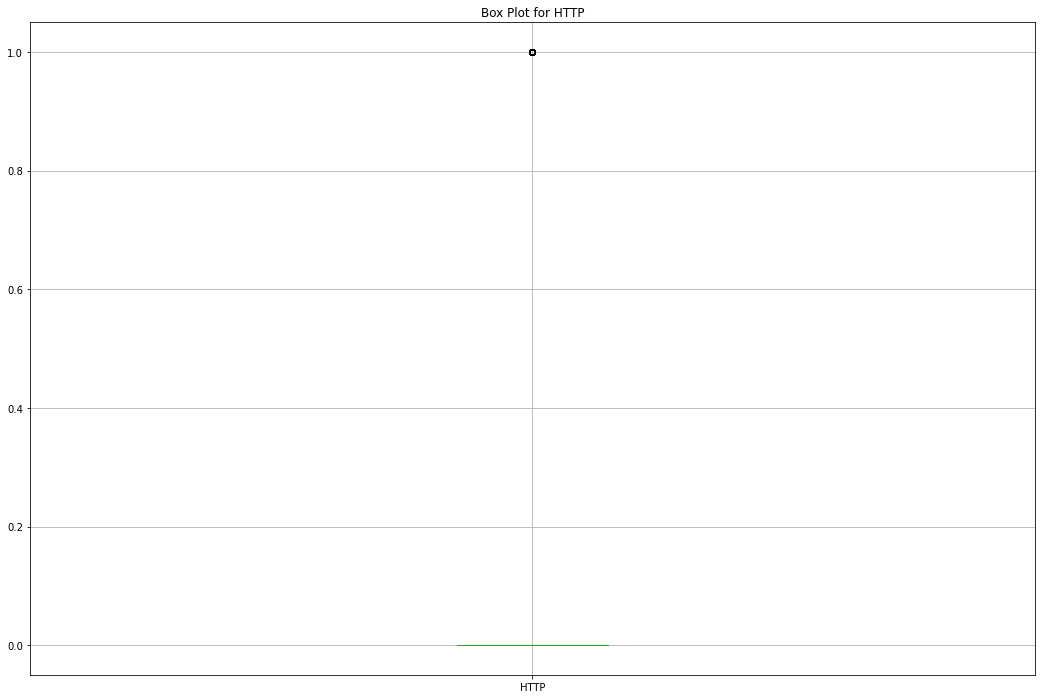

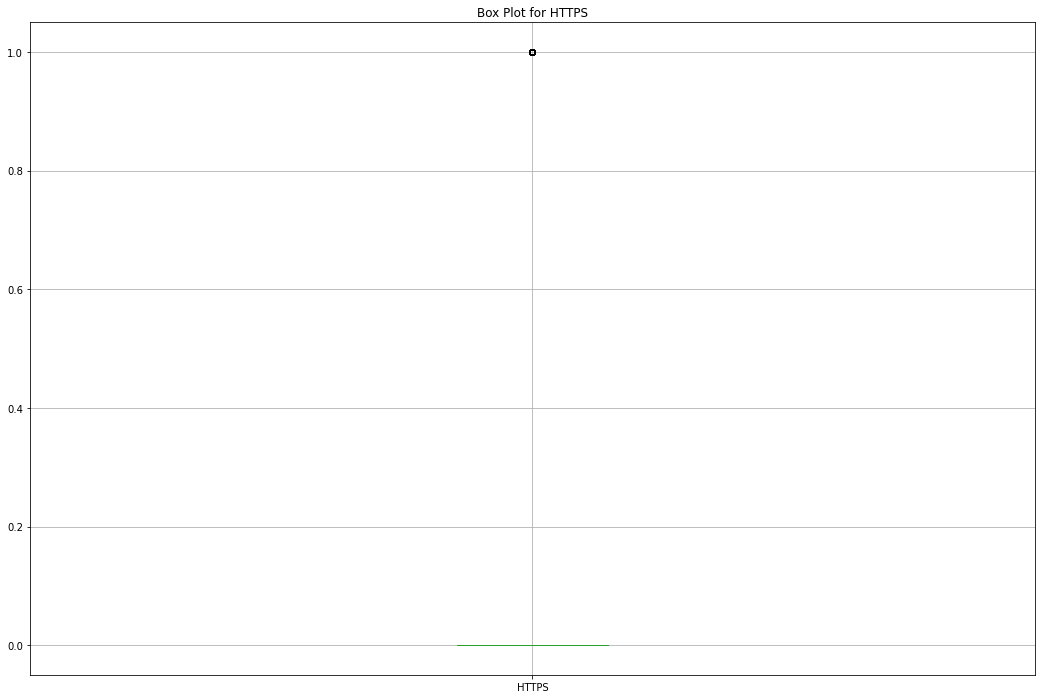

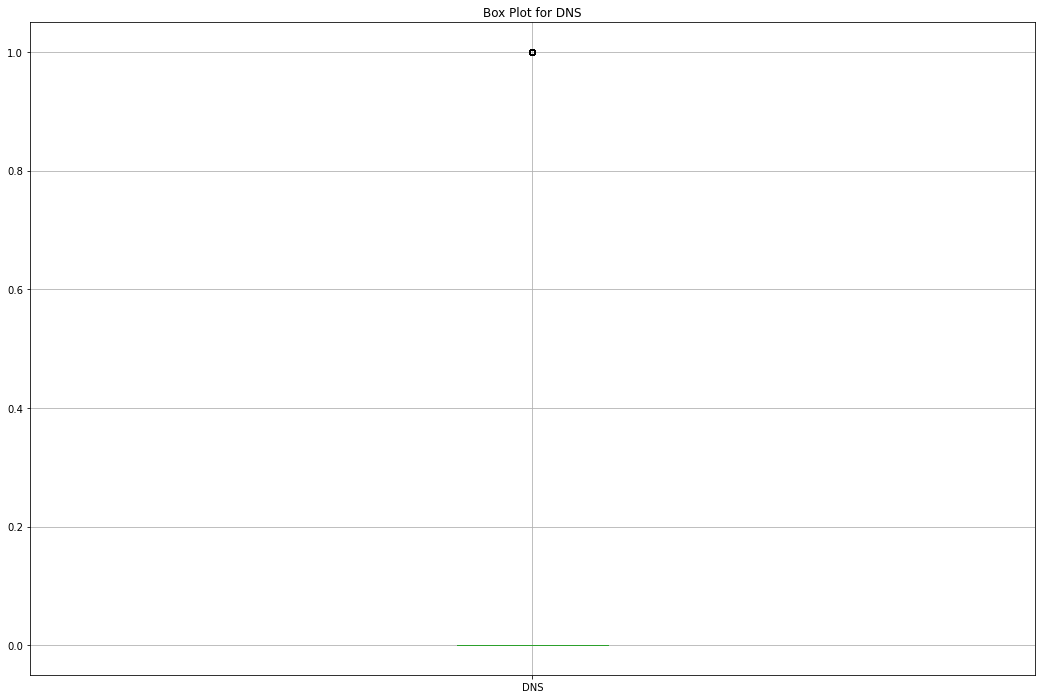

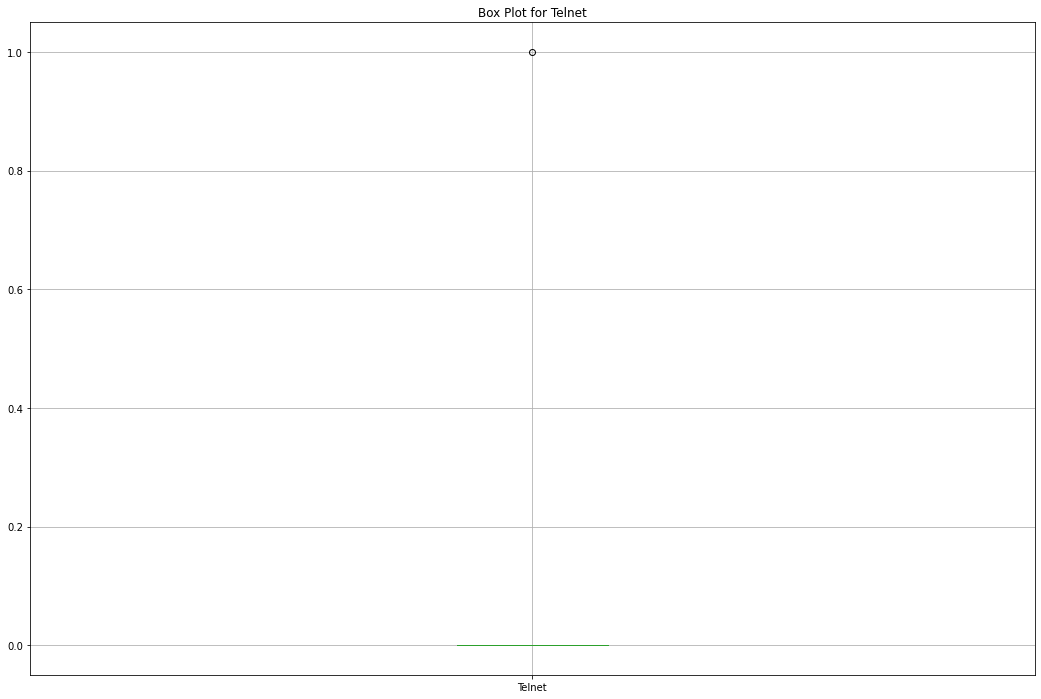

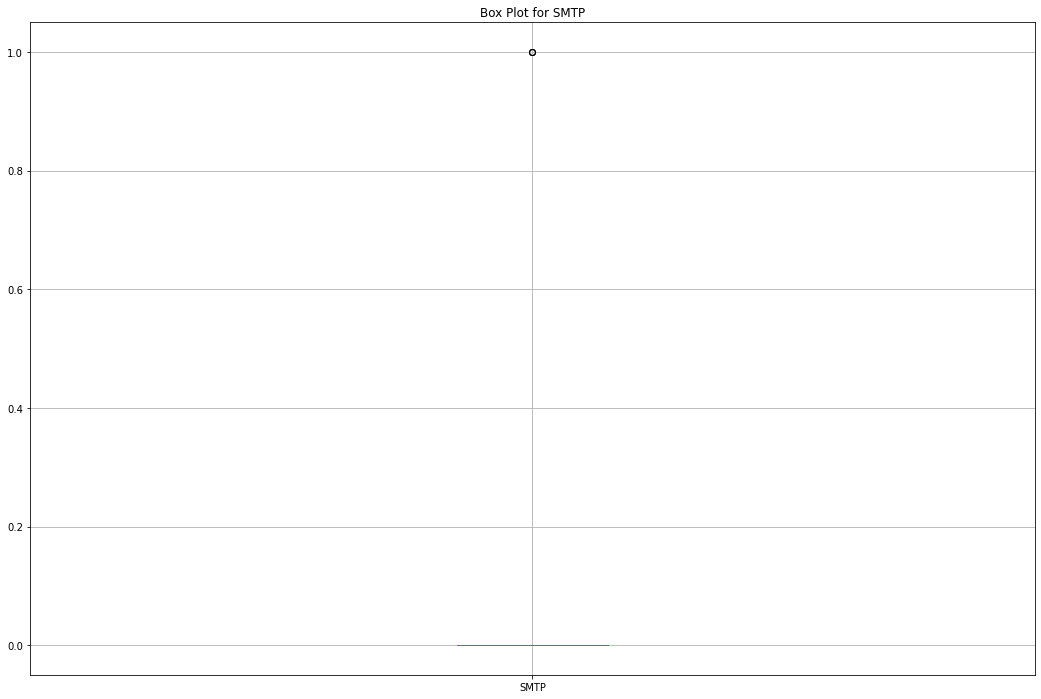

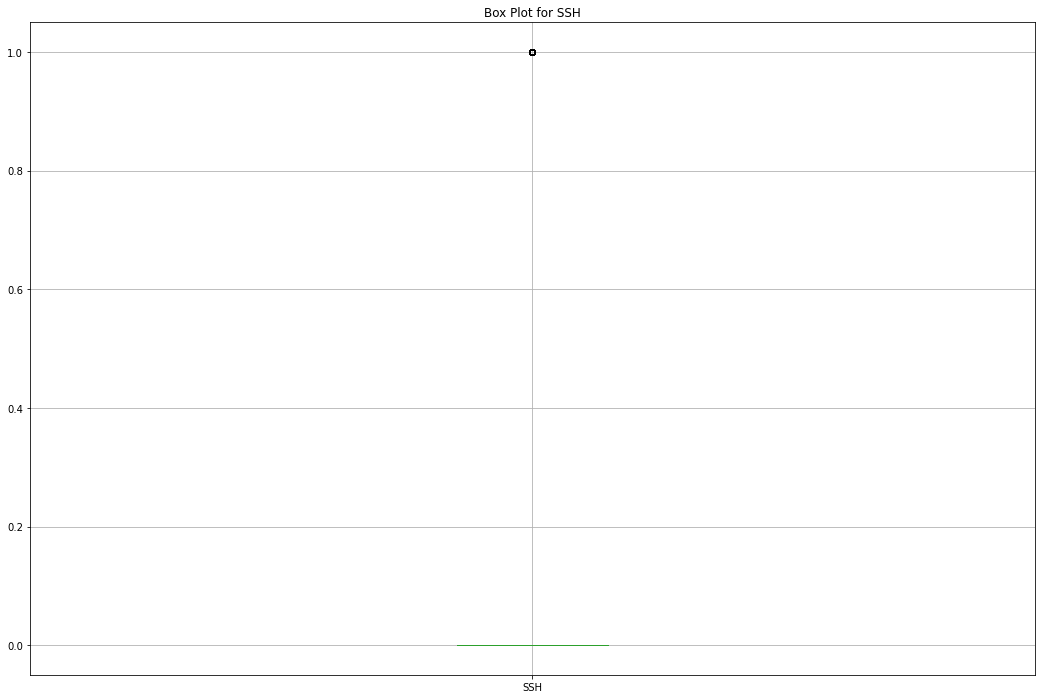

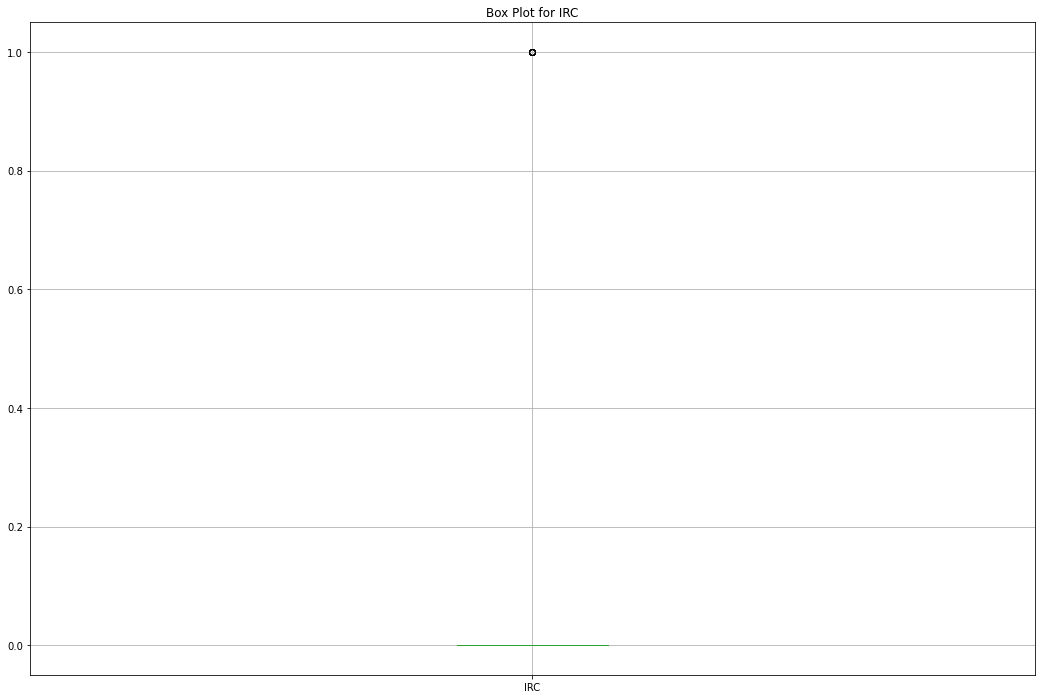

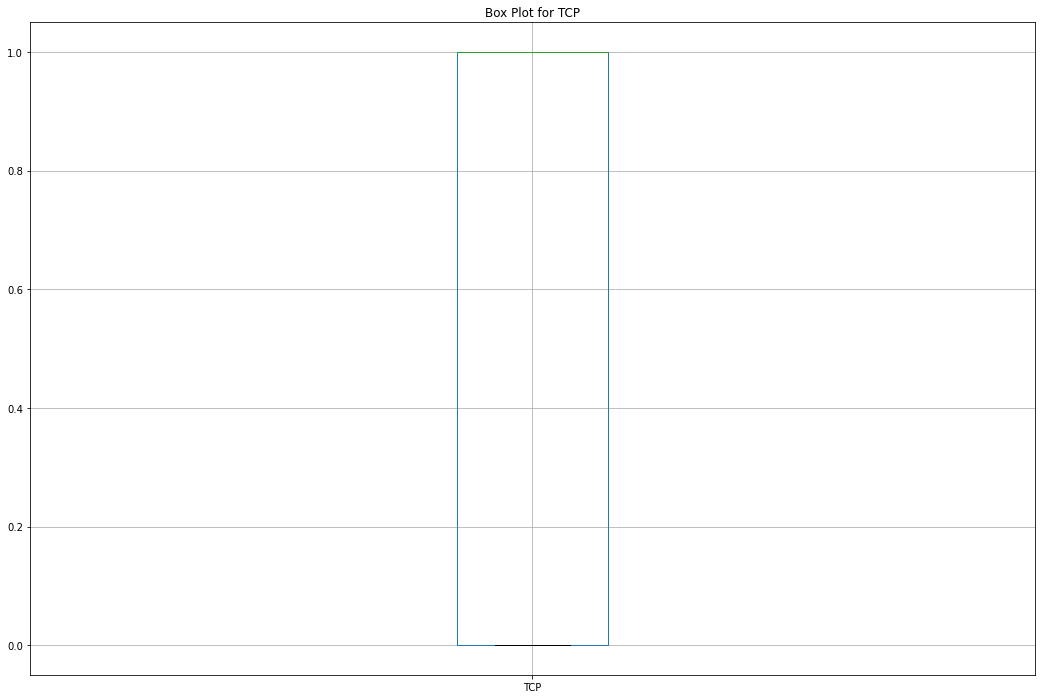

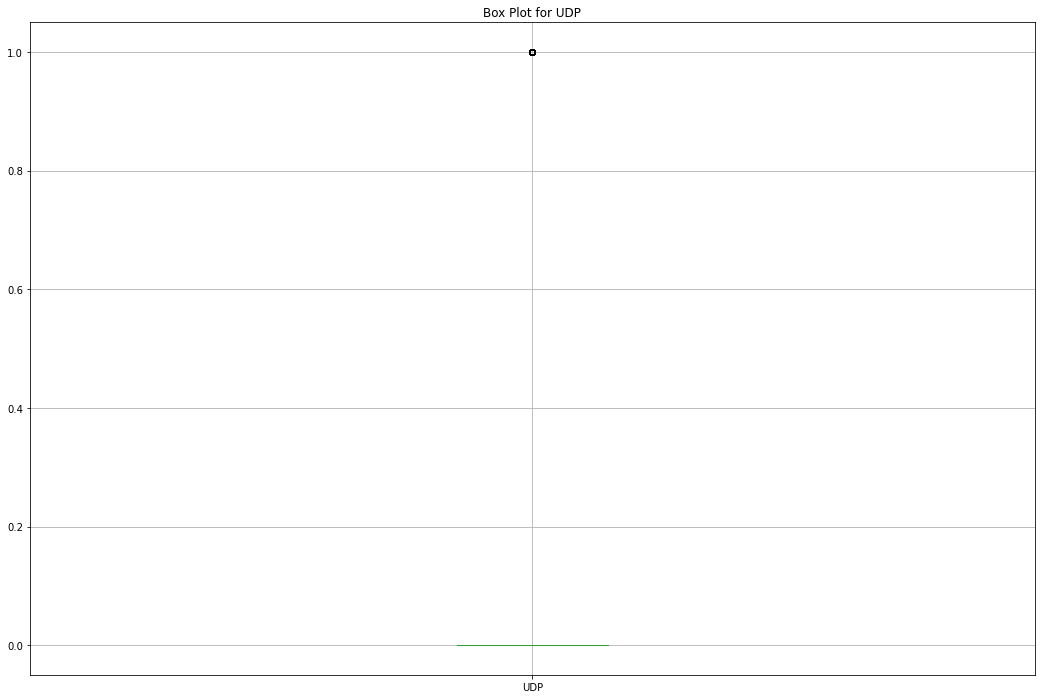

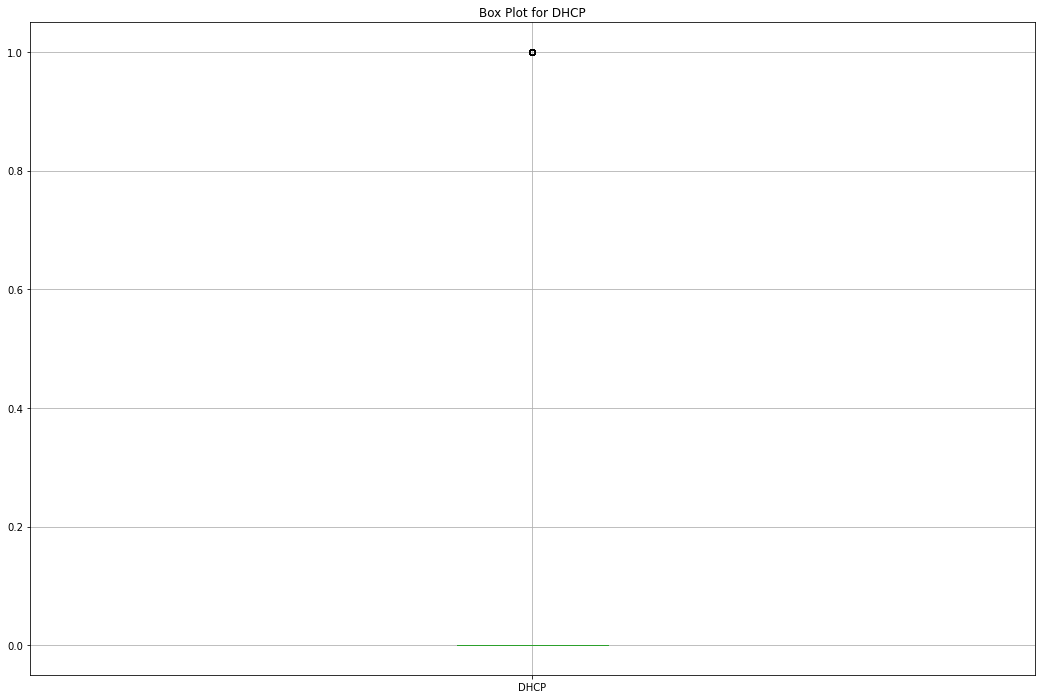

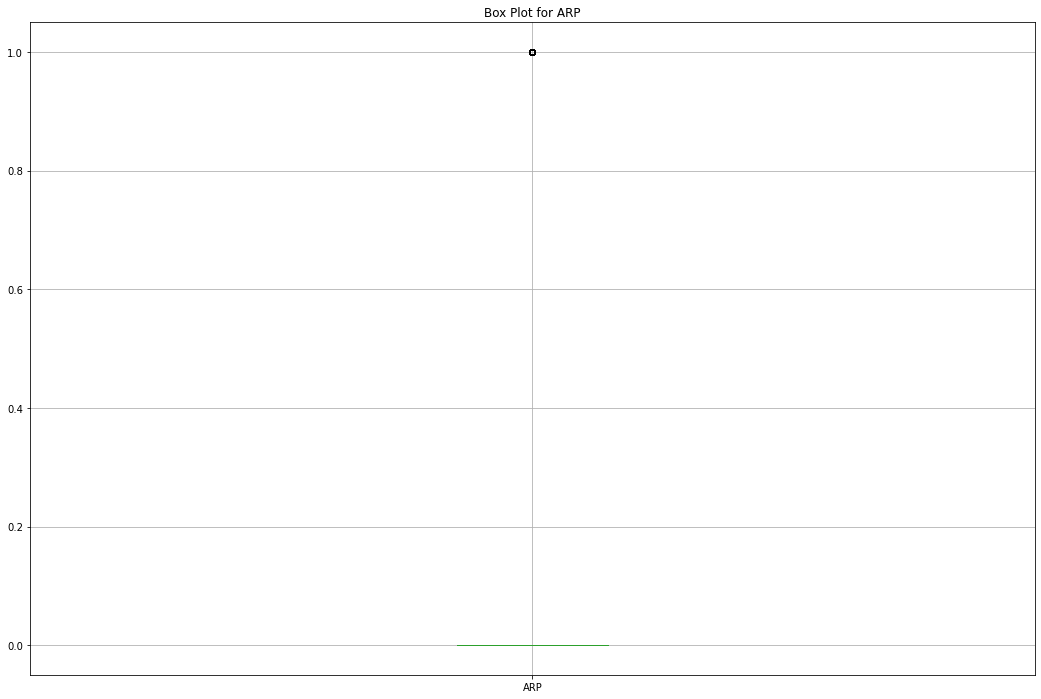

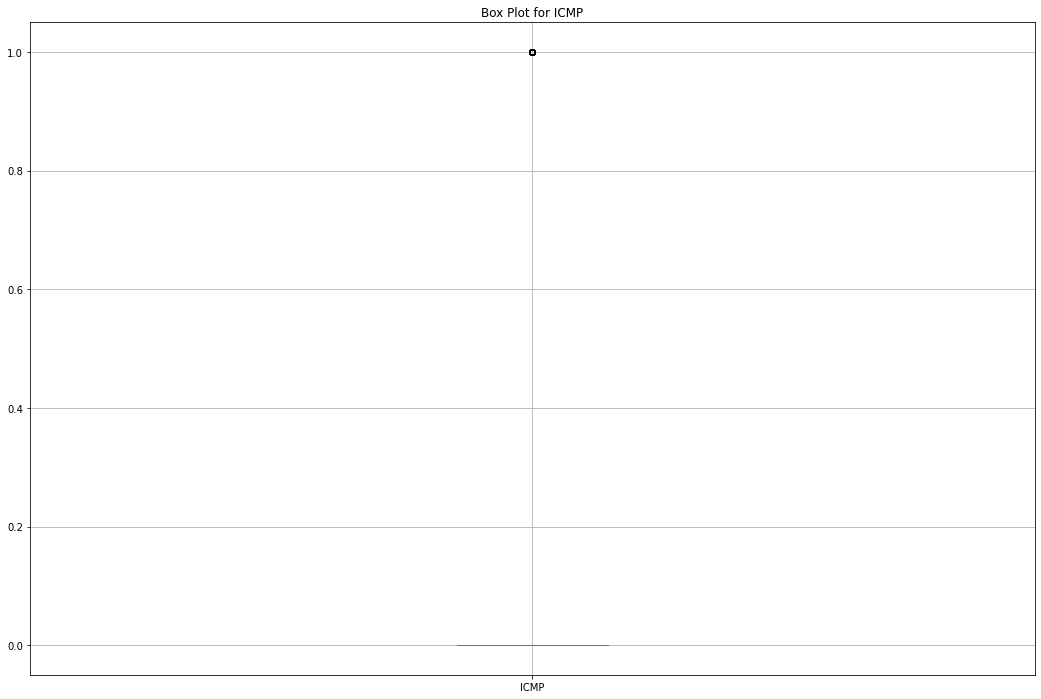

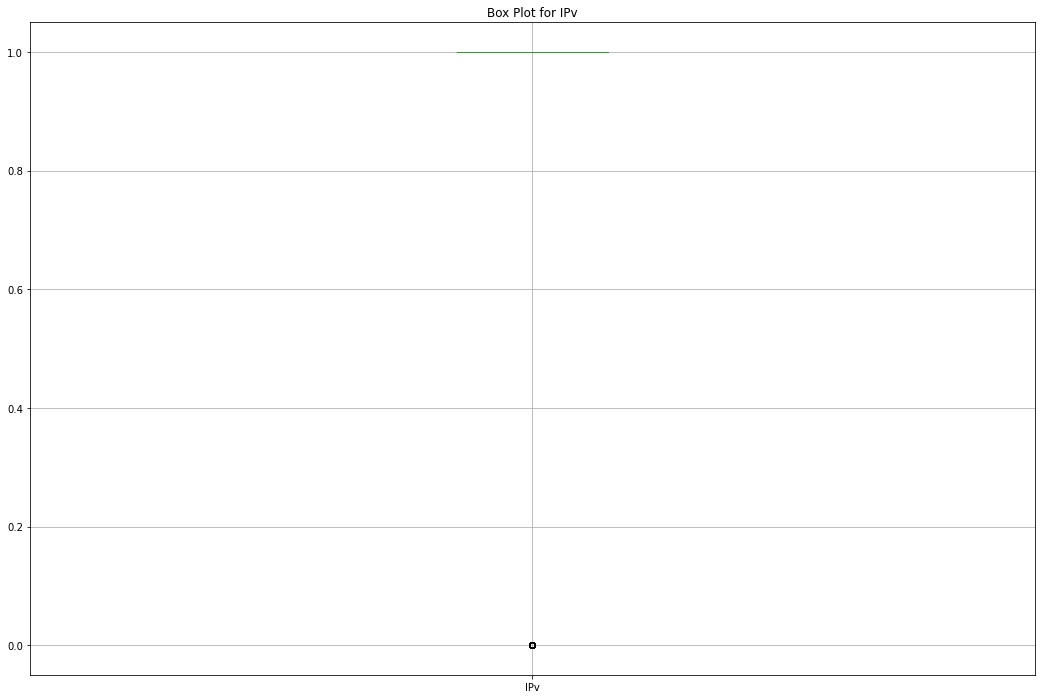

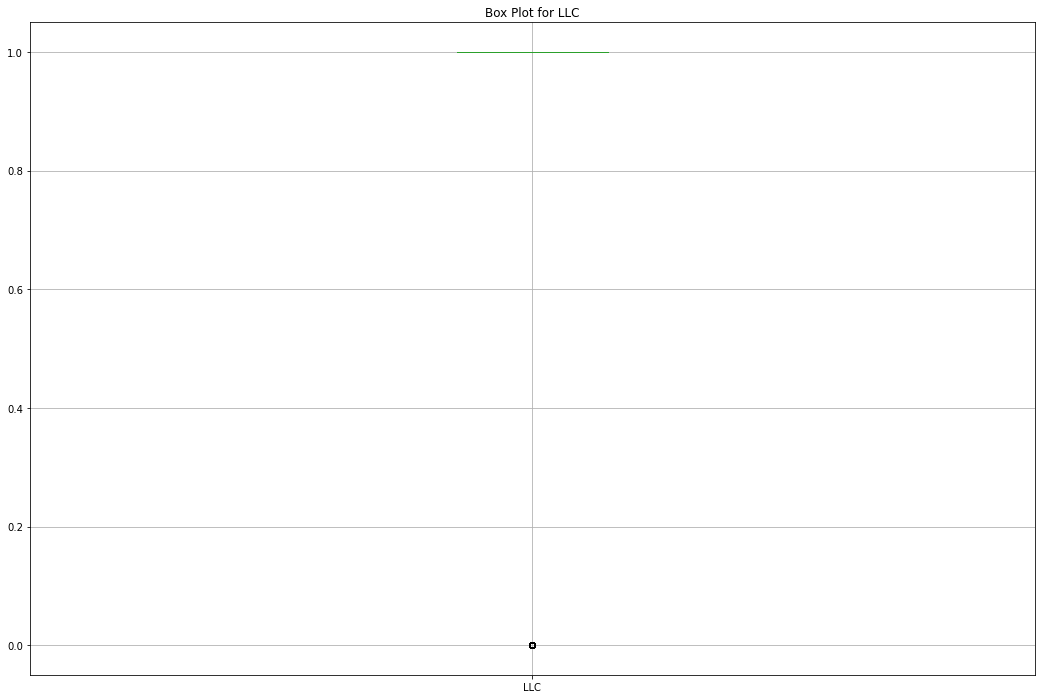

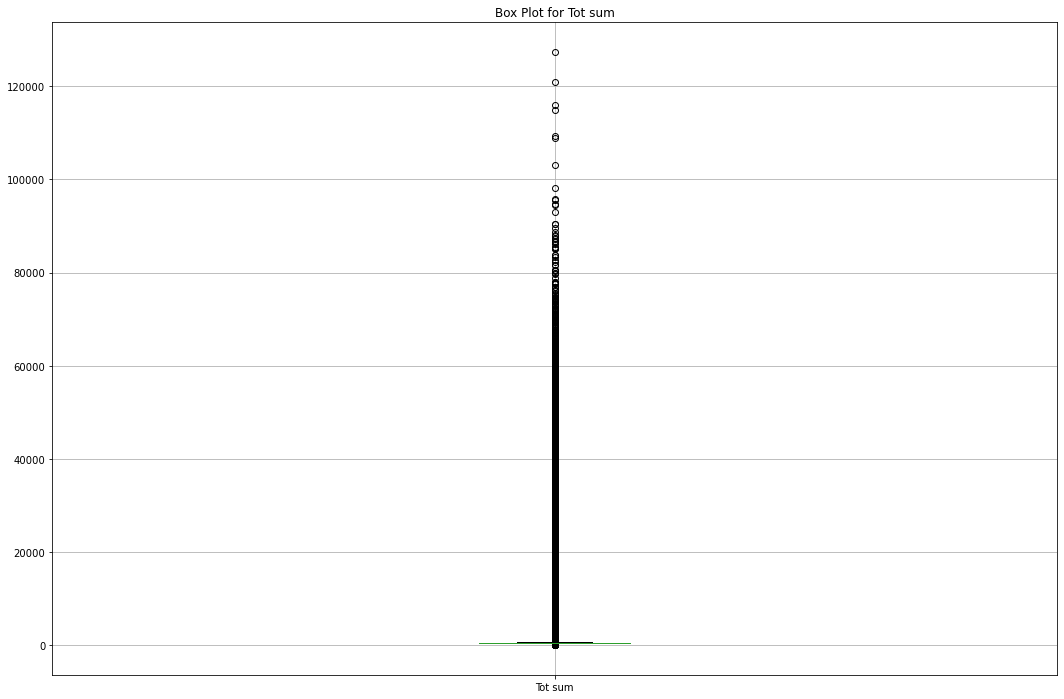

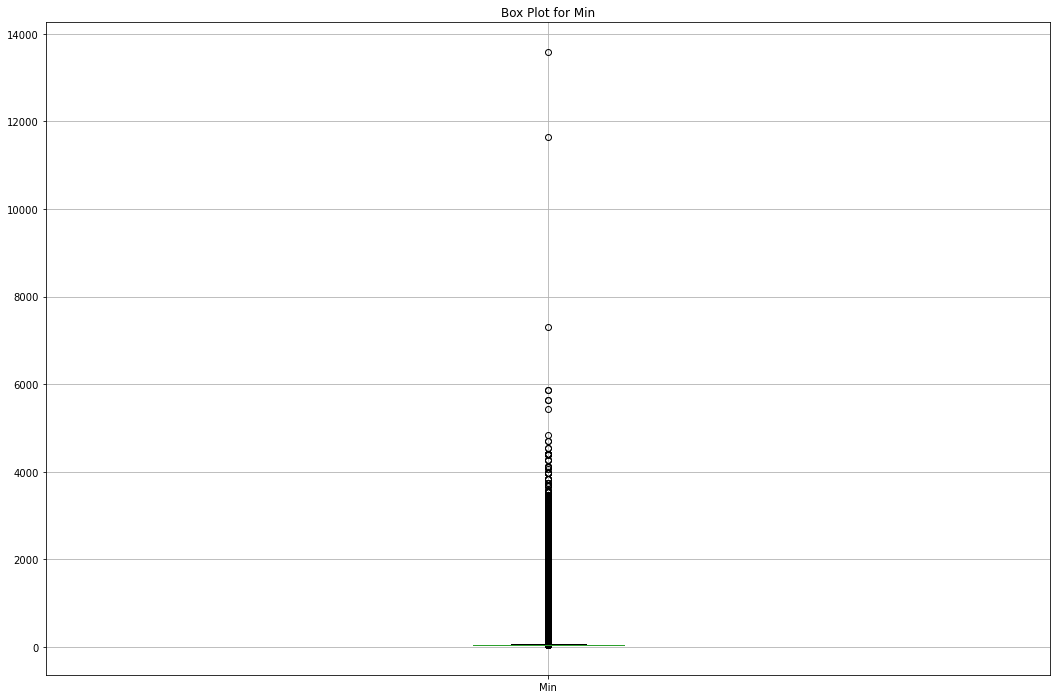

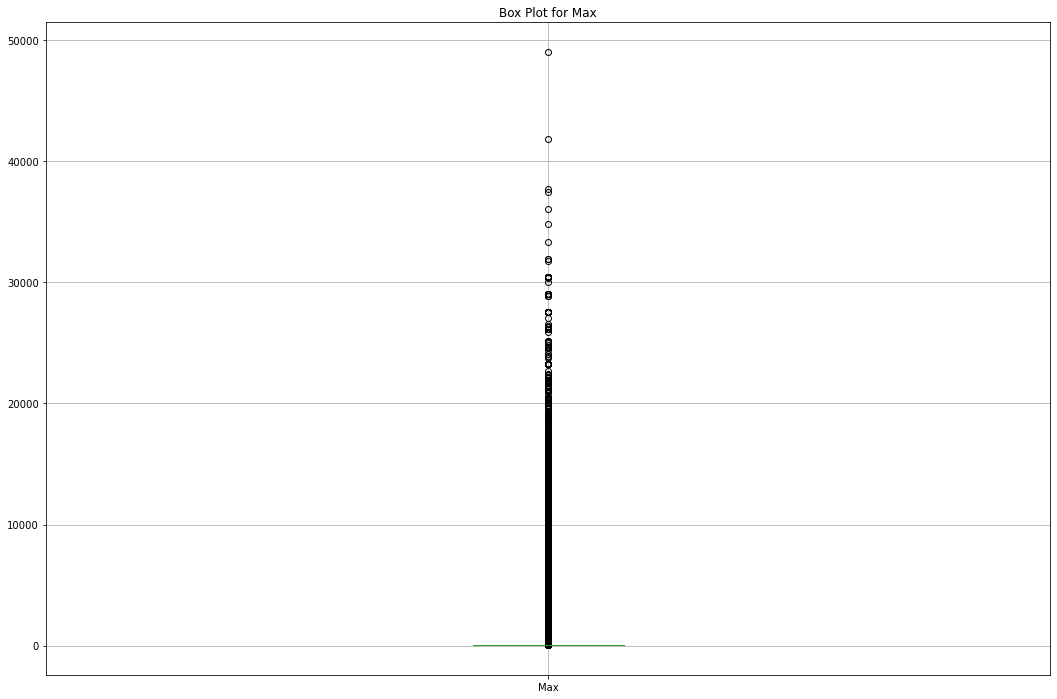

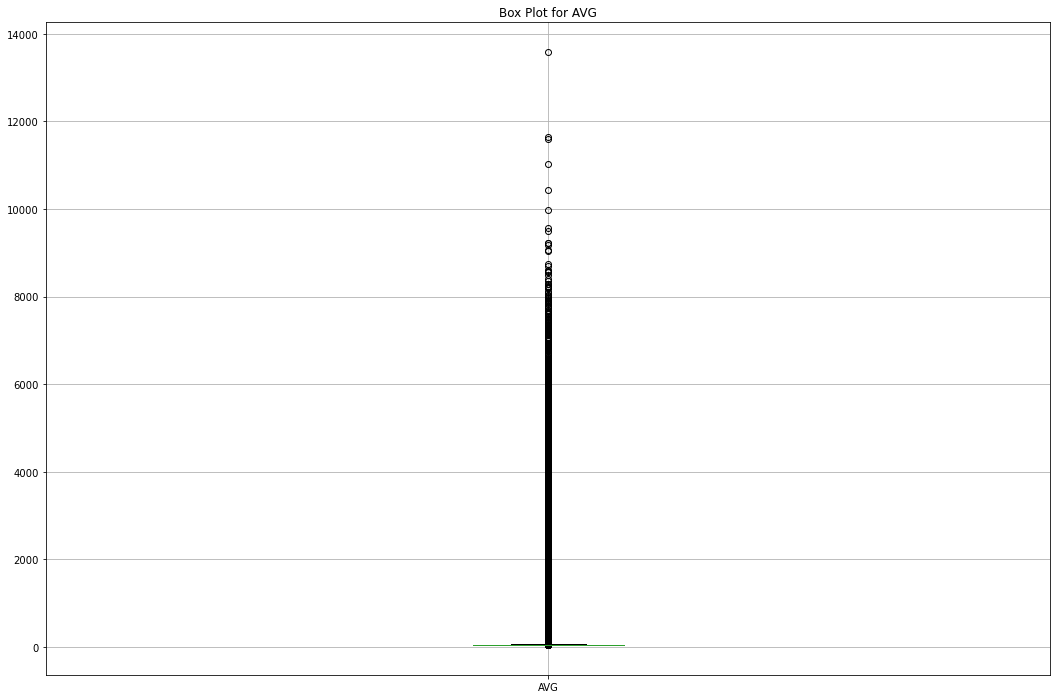

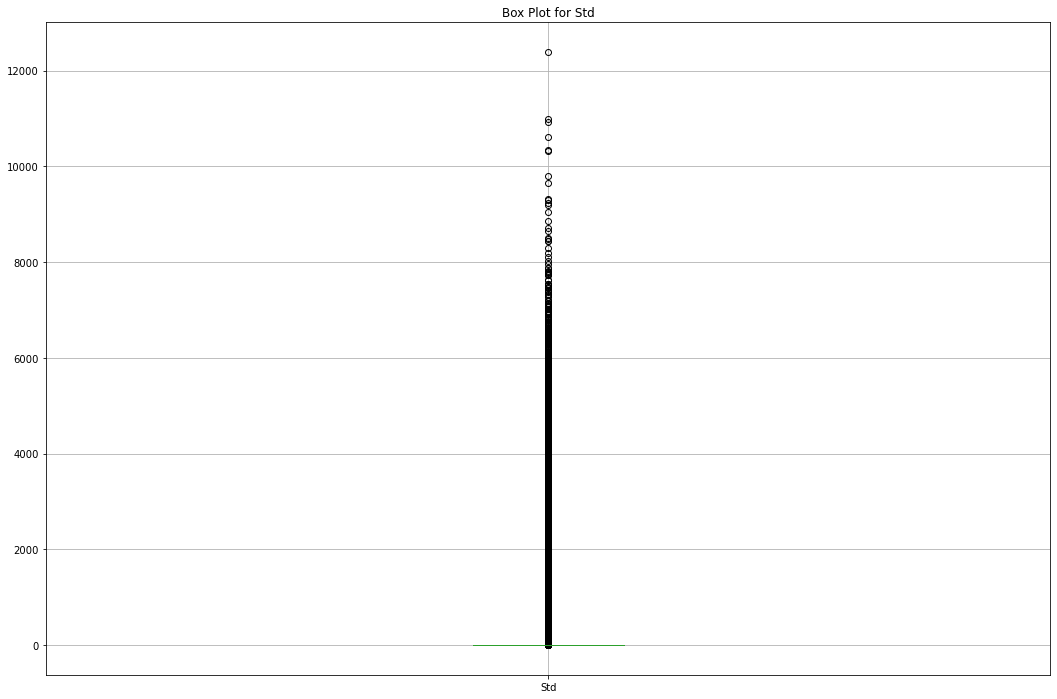

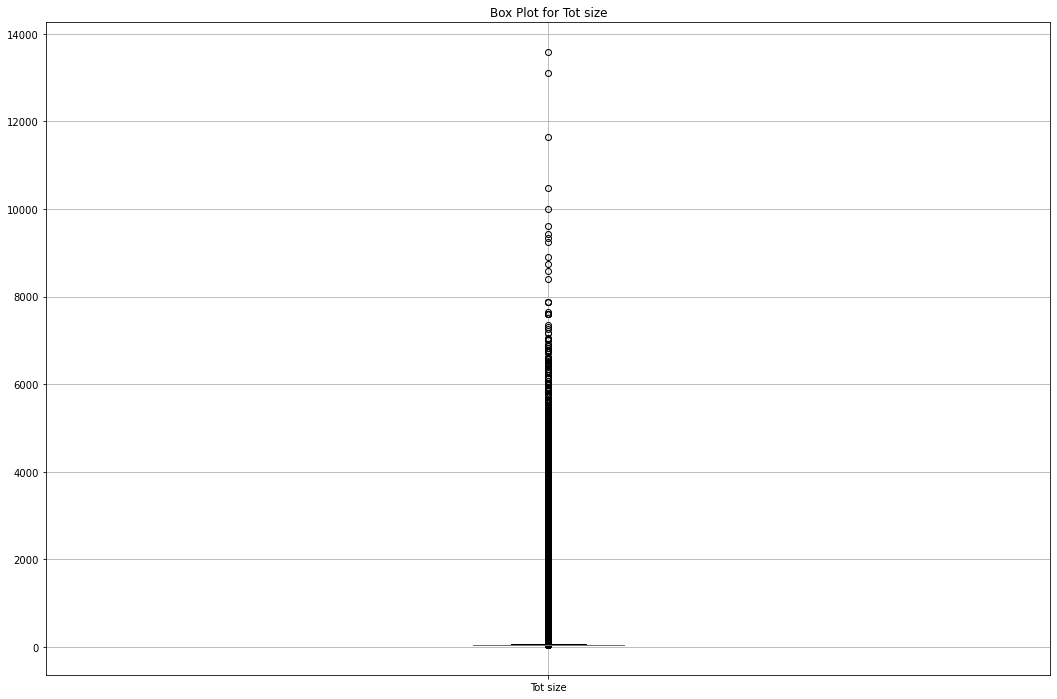

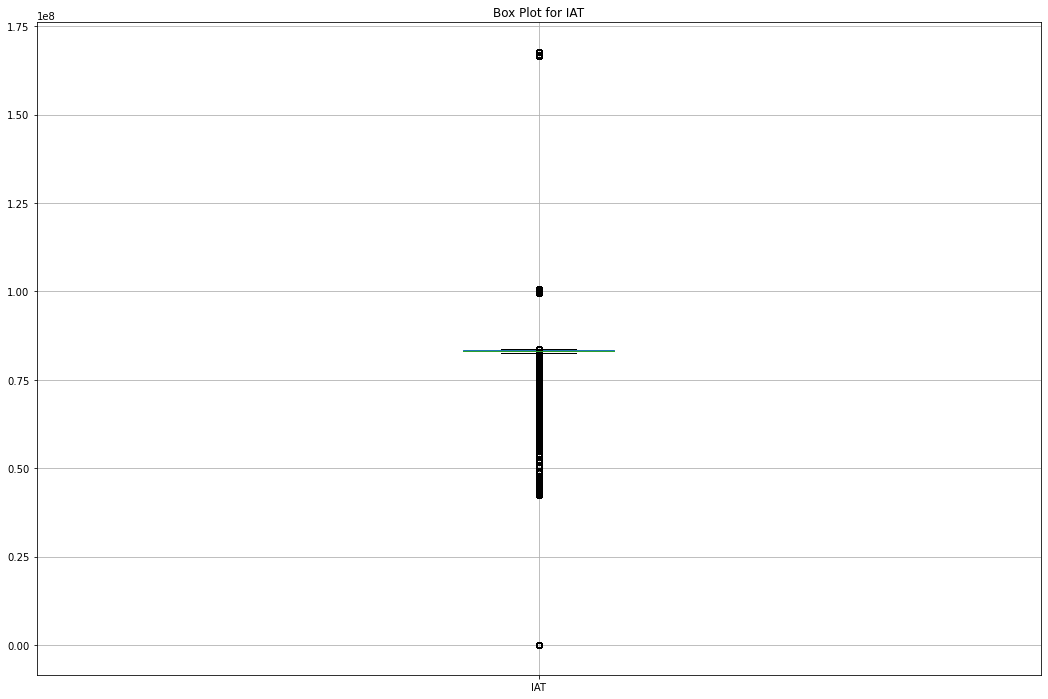

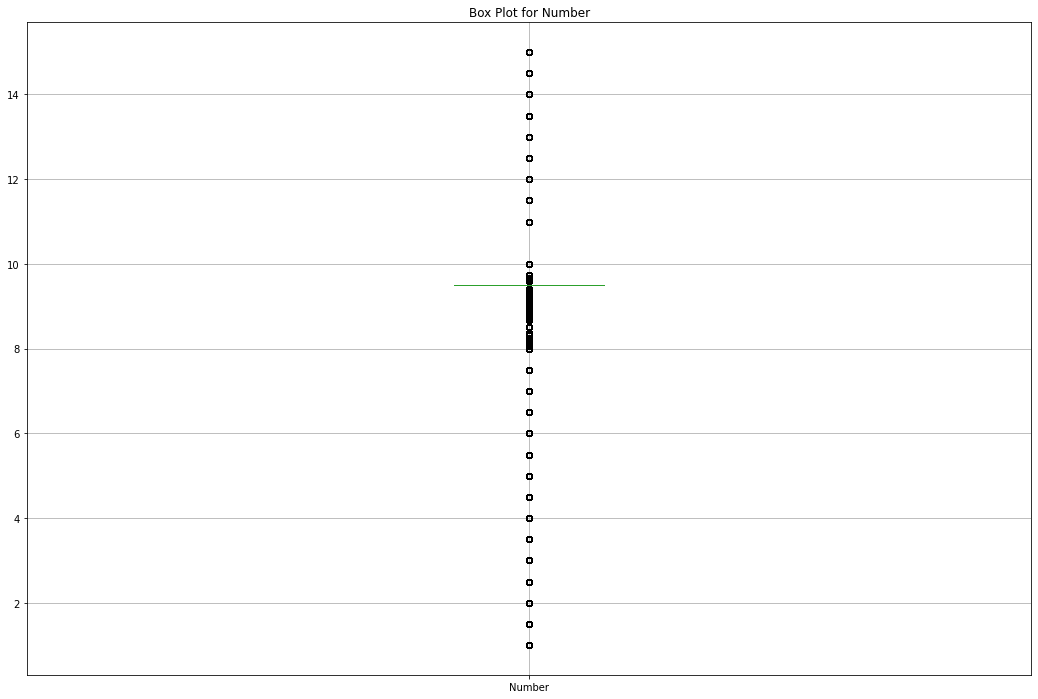

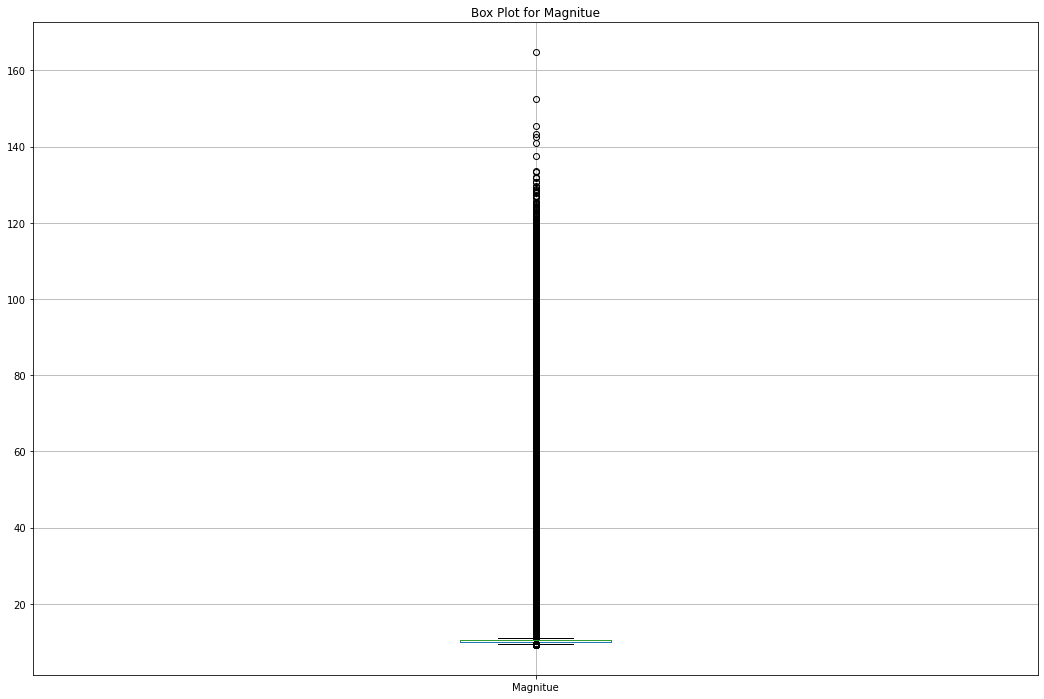

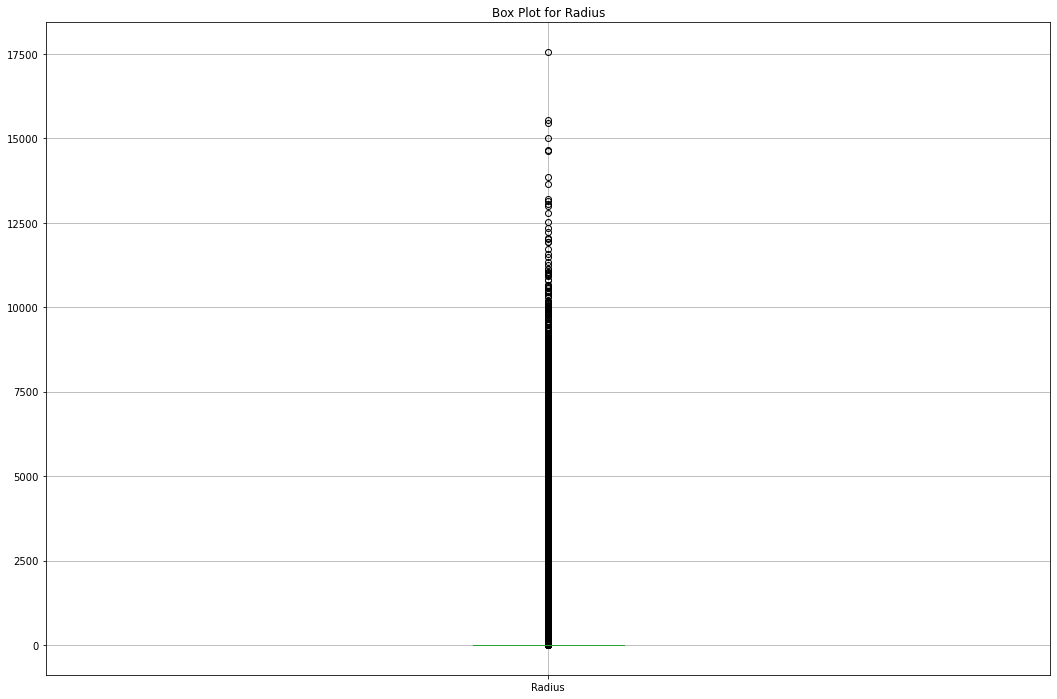

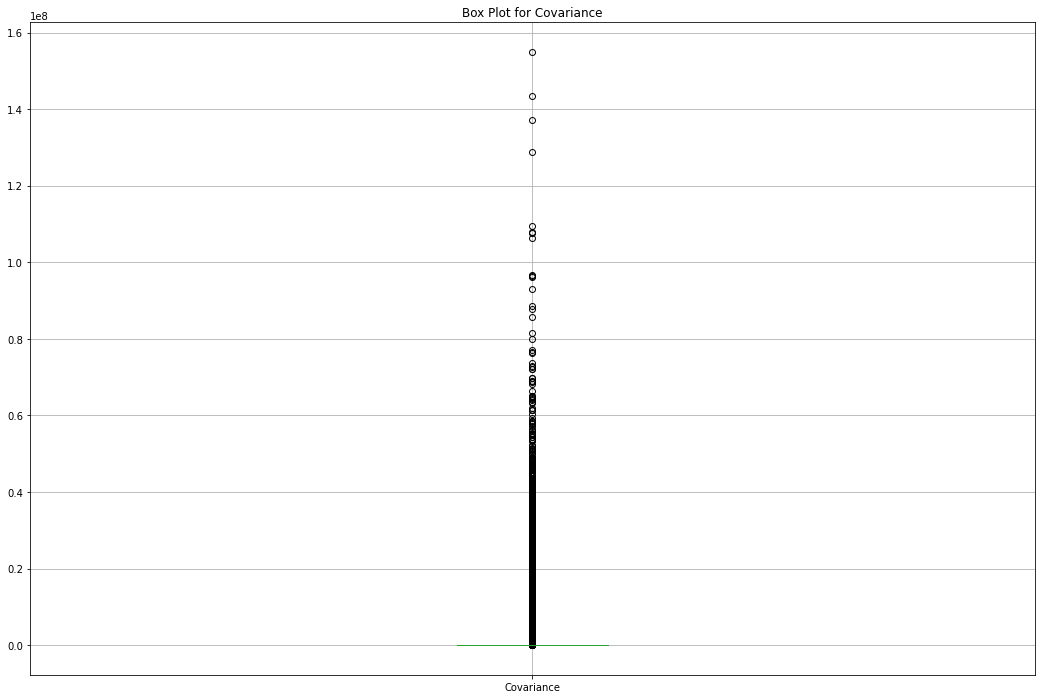

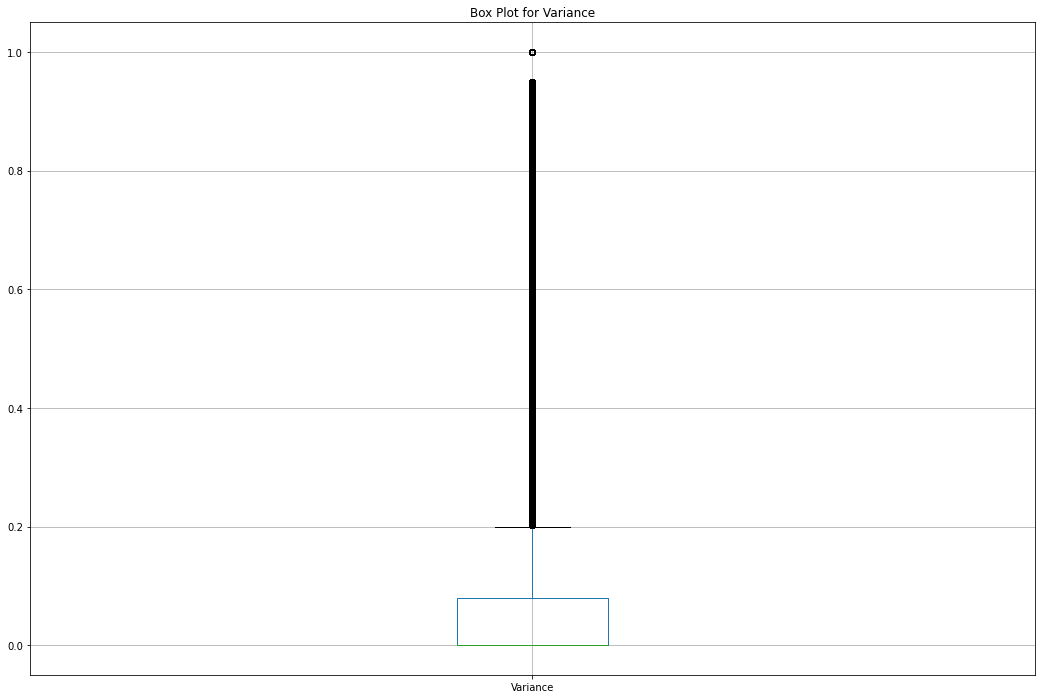

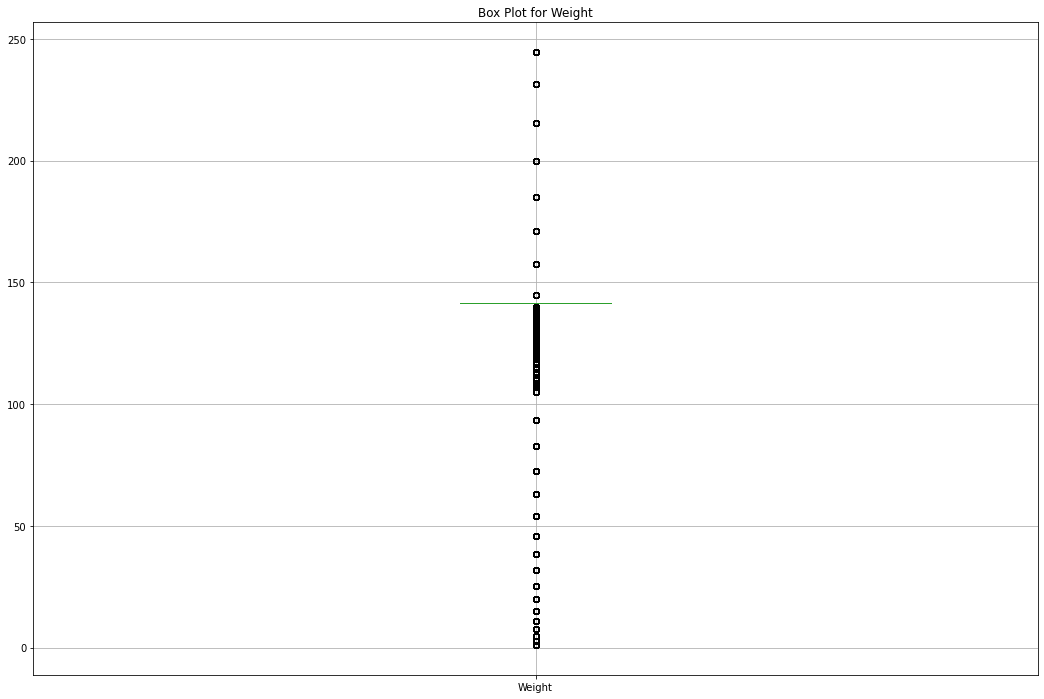

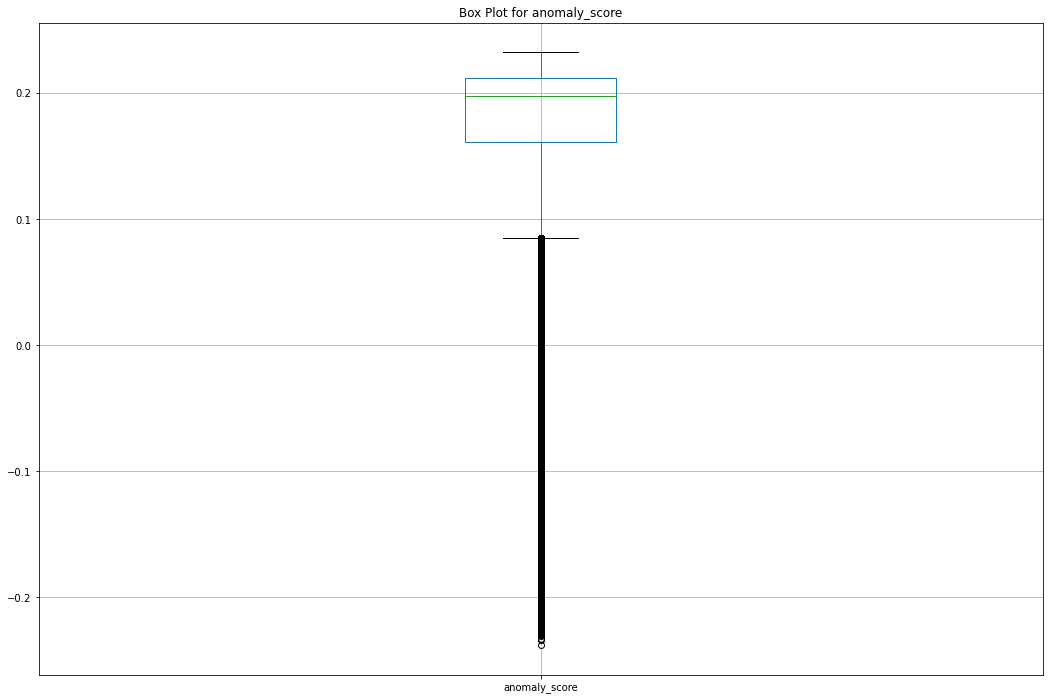

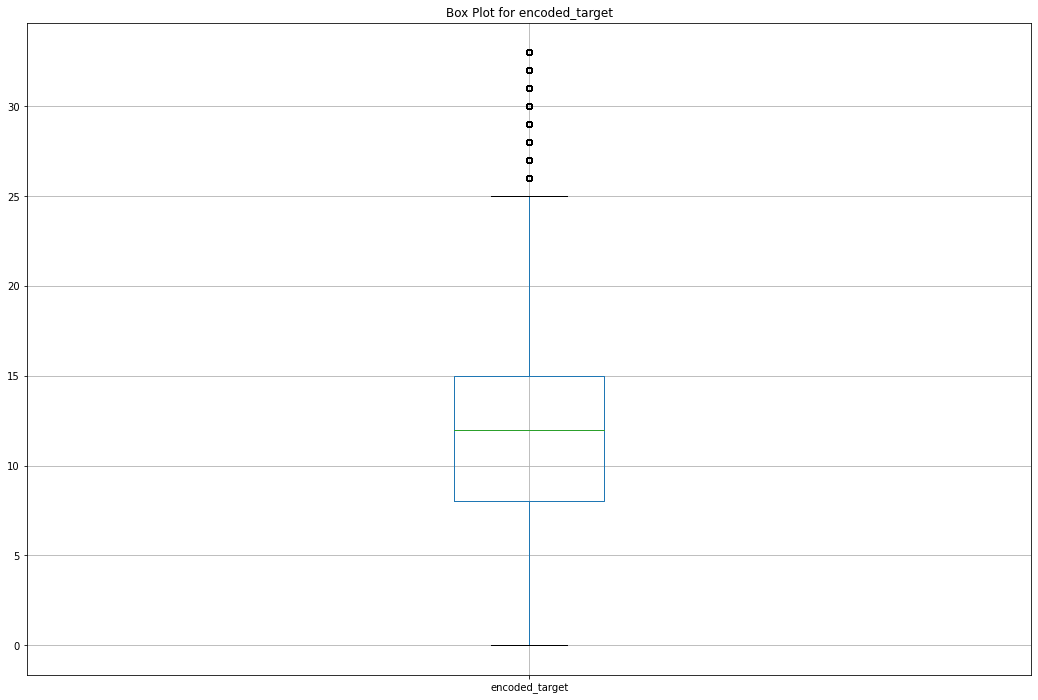

In [5]:
# List of CSV files
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()


# Combine all CSV files into one DataFrame
combined_data = pd.concat([pd.read_csv(os.path.join(DATASET_DIRECTORY, csv_file)) for csv_file in df_sets], ignore_index=True)


In [17]:
combined_data.to_csv('combined_data.csv', index=False)

In [ ]:
combined_data = pd.read_csv('combined_data.csv')


In [ ]:
print(combined_data.columns)

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # or other balancing techniques


# Split dataset into features and labels
X = combined_data.drop('label', axis=1)
y = combined_data['label']

# Stratify and split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Balance the dataset (using SMOTE as an example)
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Combine the balanced training set and the untouched test set
X_balanced = pd.concat([X_train_balanced, X_test])
y_balanced = pd.concat([y_train_balanced, y_test])
balanced_df = pd.concat([X_balanced, y_balanced], axis=1)

# Export the balanced dataset to a new CSV
balanced_df.to_csv('balanced_dataset.csv', index=False)


Undersampling methods are useful for reducing the size of a dataset, especially in cases where there is a significant imbalance between classes. These methods focus on decreasing the size of the overrepresented class(es). Here are some commonly used undersampling techniques:

Random Undersampling:

Description: Randomly removes samples from the majority class to match the number of samples in the minority class.
Pros: Simple and easy to implement.
Cons: Can lead to loss of potentially important data, reducing the performance of the classifier.
Cluster Centroids:

Description: This method involves using clustering algorithms (like K-means) to represent the majority class by the centroids of the clusters.
Pros: Reduces the number of data points significantly while trying to maintain the distribution.
Cons: May lose some important information in the data if clusters do not represent the data well.
Tomek Links:

Description: Identifies Tomek links (pairs of very close instances but of opposite classes) and removes the majority class instances from each pair.
Pros: Helps in cleaning overlapping data points between classes, improving the decision boundary.
Cons: Does not reduce the dataset size significantly in cases with minimal overlap.
Edited Nearest Neighbors (ENN):

Description: Removes samples from the majority class whose prediction by k-nearest neighbors is not in the majority.
Pros: Focuses on removing borderline examples and noise, which can improve the decision space.
Cons: Potentially time-consuming, depending on dataset size.
Condensed Nearest Neighbor (CNN):

Description: A more aggressive version of ENN, aiming to reduce the dataset to the set of samples that are necessary to maintain the decision boundaries.
Pros: Often results in a much smaller dataset while preserving the decision boundaries.
Cons: More computationally intensive than ENN.
NearMiss Methods:

Description: Several versions exist (NearMiss-1, NearMiss-2, etc.), primarily focusing on the distances from the minority class samples.
Pros: Systematic approach to select samples.
Cons: Depending on the version, it might focus too much on data points that are not representative of the majority class.
Instance Hardness Threshold:

Description: Removes instances from the majority class that are hardest to classify by a given classifier.
Pros: Targets potentially noisy data, improving the classifier's performance.
Cons: Depends on the choice of classifier; may remove informative instances.
When choosing an undersampling method, it's important to consider the nature of your dataset and the potential impact of data loss. In practice, it's often beneficial to experiment with multiple methods to find the one that works best for your specific use case. Additionally, a combination of oversampling (like SMOTE) and undersampling techniques can sometimes yield better results than using either method alone.



### Combining, Downsampling and splitting DS. Need not run again

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Function to downsample each class to a specified size
def downsample(df, size_per_class):
    grouped = df.groupby('label')
    return grouped.apply(lambda x: x.sample(min(len(x), size_per_class))).reset_index(drop=True)

# Read the CSV file in chunks
chunk_size = 100000  # Adjust based on memory capacity
chunks = pd.read_csv('combined_data.csv', chunksize=chunk_size)

balanced_df = pd.DataFrame()
total_desired_size = 1000000
accumulated_size = 0

for chunk in chunks:
    # Adjust the target size for the current chunk
    remaining_size = total_desired_size - accumulated_size
    if remaining_size <= 0:
        break

    target_train_size = int(remaining_size * 0.8)
    target_test_size = remaining_size - target_train_size

    # Filter out classes with too few instances
    class_counts = chunk['label'].value_counts()
    chunk = chunk[chunk['label'].isin(class_counts[class_counts > 1].index)]

    if not chunk.empty:
        try:
            # Stratify and split each chunk
            train_chunk, test_chunk = train_test_split(chunk, test_size=0.2, stratify=chunk['label'])

            # Downsample the training and testing chunks
            train_balanced = downsample(train_chunk, target_train_size)
            test_balanced = downsample(test_chunk, target_test_size)

            # Combine and append to the balanced DataFrame
            balanced_chunk = pd.concat([train_balanced, test_balanced])
            balanced_df = pd.concat([balanced_df, balanced_chunk])

            # Update accumulated size
            accumulated_size += len(balanced_chunk)

        except ValueError as e:
            print(f"Error processing chunk: {e}")

# Reset index
balanced_df.reset_index(drop=True, inplace=True)

# Export to CSV
balanced_df.to_csv('balanced_stratified_dataset.csv', index=False)


In [3]:
# Data Information
print("Data Information for the resampled dataset:")
print(balanced_df.info())

Data Information for the resampled dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000192 entries, 0 to 1000191
Data columns (total 47 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1000192 non-null  float64
 1   Header_Length    1000192 non-null  float64
 2   Protocol Type    1000192 non-null  float64
 3   Duration         1000192 non-null  float64
 4   Rate             1000192 non-null  float64
 5   Srate            1000192 non-null  float64
 6   Drate            1000192 non-null  float64
 7   fin_flag_number  1000192 non-null  float64
 8   syn_flag_number  1000192 non-null  float64
 9   rst_flag_number  1000192 non-null  float64
 10  psh_flag_number  1000192 non-null  float64
 11  ack_flag_number  1000192 non-null  float64
 12  ece_flag_number  1000192 non-null  float64
 13  cwr_flag_number  1000192 non-null  float64
 14  ack_count        1000192 non-null  float64
 15  syn_count        10001

In [4]:
# Basic statistics
print("Basic Statistics for the combined dataset:")
print(balanced_df.describe())

Basic Statistics for the combined dataset:
       flow_duration  Header_Length  Protocol Type      Duration  \
count   1.000192e+06   1.000192e+06   1.000192e+06  1.000192e+06   
mean    5.668137e+00   7.749643e+04   9.061793e+00  6.635681e+01   
std     2.873557e+02   4.660329e+05   8.937389e+00  1.408916e+01   
min     0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
25%     0.000000e+00   5.400000e+01   6.000000e+00  6.400000e+01   
50%     0.000000e+00   5.400000e+01   6.000000e+00  6.400000e+01   
75%     1.042634e-01   2.762575e+02   1.420000e+01  6.400000e+01   
max     9.943576e+04   9.815555e+06   4.700000e+01  2.550000e+02   

               Rate         Srate         Drate  fin_flag_number  \
count  1.000192e+06  1.000192e+06  1.000192e+06     1.000192e+06   
mean   9.124228e+03  9.124228e+03  1.805674e-06     8.660137e-02   
std    9.955090e+04  9.955090e+04  8.687978e-04     2.812502e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
25% 

In [5]:
import os

# Create a subfolder for the split files
subfolder = 'sampled_csv_files'
os.makedirs(subfolder, exist_ok=True)

# Calculate the number of rows per file
rows_per_file = len(balanced_df) // 12
start_idx = 0

for i in range(12):
    # Calculate end index for slicing
    end_idx = start_idx + rows_per_file

    # Adjust the end index for the last file to include all remaining rows
    if i == 11:
        end_idx = len(balanced_df)

    # Slice the DataFrame
    df_part = balanced_df.iloc[start_idx:end_idx]

    # Export to CSV
    df_part.to_csv(f'{subfolder}/balanced_stratified_part{i+1}.csv', index=False)

    # Update start index for the next loop
    start_idx = end_idx


### Continue exec here

In [6]:
DATASET_DIRECTORY = '../Desktop/sampled_csv_files/'

In [6]:
# Basic statistics
print("Basic Statistics for the combined dataset:")
print(combined_data.describe())

# Data Information
print("Data Information for the combined dataset:")
print(combined_data.info())

Basic Statistics for the combined dataset:
       flow_duration  Header_Length  Protocol Type      Duration  \
count   4.668658e+07   4.668658e+07   4.668658e+07  4.668658e+07   
mean    5.765449e+00   7.670596e+04   9.065690e+00  6.635072e+01   
std     2.850342e+02   4.613317e+05   8.945533e+00  1.401919e+01   
min     0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
25%     0.000000e+00   5.400000e+01   6.000000e+00  6.400000e+01   
50%     0.000000e+00   5.400000e+01   6.000000e+00  6.400000e+01   
75%     1.051381e-01   2.805550e+02   1.433000e+01  6.400000e+01   
max     3.943572e+05   9.907148e+06   4.700000e+01  2.550000e+02   

               Rate         Srate         Drate  fin_flag_number  \
count  4.668658e+07  4.668658e+07  4.668658e+07     4.668658e+07   
mean   9.064057e+03  9.064057e+03  5.463949e-06     8.657207e-02   
std    9.956249e+04  9.956249e+04  7.250766e-03     2.812070e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00     0.000000e+00   
25% 

In [7]:
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()
training_sets = df_sets[:int(len(df_sets)*.8)]
test_sets = df_sets[int(len(df_sets)*.8):]

In [8]:
training_sets

['balanced_stratified_part1.csv',
 'balanced_stratified_part10.csv',
 'balanced_stratified_part11.csv',
 'balanced_stratified_part12.csv',
 'balanced_stratified_part2.csv',
 'balanced_stratified_part3.csv',
 'balanced_stratified_part4.csv',
 'balanced_stratified_part5.csv',
 'balanced_stratified_part6.csv']

In [9]:
test_sets

['balanced_stratified_part7.csv',
 'balanced_stratified_part8.csv',
 'balanced_stratified_part9.csv']

In [10]:
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
       'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count', 
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
       'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
       'Radius', 'Covariance', 'Variance', 'Weight', 
]
y_column = 'label'

### Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

scaler = MaxAbsScaler()

In [12]:
for train_set in tqdm(training_sets):
    scaler.fit(pd.read_csv(DATASET_DIRECTORY + train_set)[X_columns])

100%|██████████| 9/9 [00:02<00:00,  3.70it/s]


### Classification: 34 (33+1) classes

In [13]:
ML_models = [
        LogisticRegression(n_jobs=-1,max_iter=8000),
    
]

ML_names = [
        "LogisticRegression",
    
]

for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    for model in (ML_models):
        model.fit(d[X_columns], d[y_column])
    del d

100%|██████████| 9/9 [12:38<00:00, 84.23s/it]


In [ ]:
ML_models = [
        LogisticRegression(n_jobs=-1,max_iter=8000),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),
]

ML_names = [
        "LogisticRegression",
    "RandomForest",
    "GradientBoosting",
]

for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    for model in (ML_models):
        model.fit(d[X_columns], d[y_column])
    del d

  3%|▎         | 4/135 [4:07:25<135:30:56, 3724.09s/it]

In [14]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(test_sets):
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
    d_test[X_columns] = scaler.transform(d_test[X_columns])
    
    y_test += list(d_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i] = preds[i] + y_pred
        

100%|██████████| 3/3 [00:01<00:00,  3.00it/s]


In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_names[k]} (34 classes) #####")
    print('accuracy_score: ', accuracy_score(y_pred, y_test))
    print('recall_score: ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score: ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score: ', f1_score(y_pred, y_test, average='macro'))
    print()
    print()
    print()

##### LogisticRegression (34 classes) #####
accuracy_score:  0.8097957583974212
recall_score:  0.47077403870799545
precision_score:  0.4380494836855556
f1_score:  0.42108113564955657





# Classification: 8 (7+1) classes

In [16]:
dict_7classes = {}
dict_7classes['DDoS-RSTFINFlood'] = 'DDoS'
dict_7classes['DDoS-PSHACK_Flood'] = 'DDoS'
dict_7classes['DDoS-SYN_Flood'] = 'DDoS'
dict_7classes['DDoS-UDP_Flood'] = 'DDoS'
dict_7classes['DDoS-TCP_Flood'] = 'DDoS'
dict_7classes['DDoS-ICMP_Flood'] = 'DDoS'
dict_7classes['DDoS-SynonymousIP_Flood'] = 'DDoS'
dict_7classes['DDoS-ACK_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-UDP_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-ICMP_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-SlowLoris'] = 'DDoS'
dict_7classes['DDoS-HTTP_Flood'] = 'DDoS'

dict_7classes['DoS-UDP_Flood'] = 'DoS'
dict_7classes['DoS-SYN_Flood'] = 'DoS'
dict_7classes['DoS-TCP_Flood'] = 'DoS'
dict_7classes['DoS-HTTP_Flood'] = 'DoS'


dict_7classes['Mirai-greeth_flood'] = 'Mirai'
dict_7classes['Mirai-greip_flood'] = 'Mirai'
dict_7classes['Mirai-udpplain'] = 'Mirai'

dict_7classes['Recon-PingSweep'] = 'Recon'
dict_7classes['Recon-OSScan'] = 'Recon'
dict_7classes['Recon-PortScan'] = 'Recon'
dict_7classes['VulnerabilityScan'] = 'Recon'
dict_7classes['Recon-HostDiscovery'] = 'Recon'

dict_7classes['DNS_Spoofing'] = 'Spoofing'
dict_7classes['MITM-ArpSpoofing'] = 'Spoofing'

dict_7classes['BenignTraffic'] = 'Benign'

dict_7classes['BrowserHijacking'] = 'Web'
dict_7classes['Backdoor_Malware'] = 'Web'
dict_7classes['XSS'] = 'Web'
dict_7classes['Uploading_Attack'] = 'Web'
dict_7classes['SqlInjection'] = 'Web'
dict_7classes['CommandInjection'] = 'Web'


dict_7classes['DictionaryBruteForce'] = 'BruteForce'

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


ML_models = [
        LogisticRegression(n_jobs=-1),
    
]

ML_neams = [
        "LogisticRegression",
    
]



for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    new_y = [dict_7classes[k] for k in d[y_column]]
    d[y_column] = new_y
    
    for model in (ML_models):
        model.fit(d[X_columns], d[y_column])
    del d

  0%|          | 0/9 [00:00<?, ?it/s]/nas/longleaf/home/mohanram/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 11%|█         | 1/9 [00:04<00:33,  4.13s/it]/nas/longleaf/home/mohanram/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation f

In [18]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(test_sets):
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
    d_test[X_columns] = scaler.transform(d_test[X_columns])
    new_y = [dict_7classes[k] for k in d_test[y_column]]
    d_test[y_column] = new_y
    
    y_test += list(d_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i] = preds[i] + y_pred
        

100%|██████████| 3/3 [00:00<00:00,  4.16it/s]


In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_names[k]} (8 classes) #####")
    print('accuracy_score = ', accuracy_score(y_pred, y_test))
    print('recall_score = ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score = ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score = ', f1_score(y_pred, y_test, average='macro'))
    print()
    print()
    print()

##### LogisticRegression (8 classes) #####
accuracy_score =  0.8386823277223882
recall_score =  0.48082343644403225
precision_score =  0.44536199605946125
f1_score =  0.42011202547866766





# Classification: 2 (1+1) Classes

In [20]:
dict_2classes = {}
dict_2classes['DDoS-RSTFINFlood'] = 'Attack'
dict_2classes['DDoS-PSHACK_Flood'] = 'Attack'
dict_2classes['DDoS-SYN_Flood'] = 'Attack'
dict_2classes['DDoS-UDP_Flood'] = 'Attack'
dict_2classes['DDoS-TCP_Flood'] = 'Attack'
dict_2classes['DDoS-ICMP_Flood'] = 'Attack'
dict_2classes['DDoS-SynonymousIP_Flood'] = 'Attack'
dict_2classes['DDoS-ACK_Fragmentation'] = 'Attack'
dict_2classes['DDoS-UDP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-ICMP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-SlowLoris'] = 'Attack'
dict_2classes['DDoS-HTTP_Flood'] = 'Attack'

dict_2classes['DoS-UDP_Flood'] = 'Attack'
dict_2classes['DoS-SYN_Flood'] = 'Attack'
dict_2classes['DoS-TCP_Flood'] = 'Attack'
dict_2classes['DoS-HTTP_Flood'] = 'Attack'


dict_2classes['Mirai-greeth_flood'] = 'Attack'
dict_2classes['Mirai-greip_flood'] = 'Attack'
dict_2classes['Mirai-udpplain'] = 'Attack'

dict_2classes['Recon-PingSweep'] = 'Attack'
dict_2classes['Recon-OSScan'] = 'Attack'
dict_2classes['Recon-PortScan'] = 'Attack'
dict_2classes['VulnerabilityScan'] = 'Attack'
dict_2classes['Recon-HostDiscovery'] = 'Attack'

dict_2classes['DNS_Spoofing'] = 'Attack'
dict_2classes['MITM-ArpSpoofing'] = 'Attack'

dict_2classes['BenignTraffic'] = 'Benign'

dict_2classes['BrowserHijacking'] = 'Attack'
dict_2classes['Backdoor_Malware'] = 'Attack'
dict_2classes['XSS'] = 'Attack'
dict_2classes['Uploading_Attack'] = 'Attack'
dict_2classes['SqlInjection'] = 'Attack'
dict_2classes['CommandInjection'] = 'Attack'

dict_2classes['DictionaryBruteForce'] = 'Attack'

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


ML_models = [
        LogisticRegression(n_jobs=-1),
]

ML_neams = [
        "LogisticRegression",
]


for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    new_y = [dict_2classes[k] for k in d[y_column]]
    d[y_column] = new_y
    
    for model in (ML_models):
        model.fit(d[X_columns], d[y_column])
    del d

100%|██████████| 9/9 [00:17<00:00,  1.94s/it]


In [22]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(test_sets):
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
    d_test[X_columns] = scaler.transform(d_test[X_columns])
    new_y = [dict_2classes[k] for k in d_test[y_column]]
    d_test[y_column] = new_y
    
    y_test += list(d_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i] = preds[i] + y_pred
        

100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_names[k]} (2 classes) #####")
    print('accuracy_score: ', accuracy_score(y_pred, y_test))
    print('recall_score: ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score: ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score: ', f1_score(y_pred, y_test, average='macro'))
    print()
    print()
    print()

##### LogisticRegression (2 classes) #####
accuracy_score:  0.9793478825980716
recall_score:  0.9246033235734947
precision_score:  0.6164645559515428
f1_score:  0.6790260202075551





In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Function to perform EDA for a given DataFrame
def perform_eda(data):
    # Display first few rows of the dataset
    print("First few rows of the combined dataset:")
    print(data.head())

    # Basic statistics
    print("Basic Statistics for the combined dataset:")
    print(data.describe())

    # Data Information
    print("Data Information for the combined dataset:")
    print(data.info())

    # Missing Values
    print("Missing Values in the combined dataset:")
    print(data.isnull().sum())

    # Unique values in categorical columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        print(f"Unique values in {col}:")
        print(data[col].value_counts())

    # Correlation Matrix
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 6))
    plt.title("Correlation Matrix for the combined dataset")
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()
    
    
    # Correlation Matrix
    correlation_matrix = data.corr()
    plt.figure(figsize=(25, 15))
    plt.title("Correlation Matrix for the dataset")
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()
    
 
    
      
    # Get unique label names and their encoded values
    unique_labels = data['label'].unique()
    

    # Plot Number of Unique Values in 'label' column
    plt.figure(figsize=(24, 18))
    ax = sns.countplot(data['label'])
    plt.title("Number of Unique Values in 'label' column")
    plt.ylabel("Count")
    plt.xlabel("Unique Values")


    # Add label names inside the bars vertically with error handling
    for i, label in enumerate(unique_labels):
        ax.text(i, 0, label, ha='center', va='bottom', rotation='vertical', fontsize=12)

    plt.show()


    
   
    
    # Multivariate Analysis (PCA)
    if data.shape[1] > 2:
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(data.select_dtypes(include=['float64', 'int64']))
        plt.figure(figsize=(12, 9))
        plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
        plt.title("PCA - Multivariate Analysis")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.show()

    # Anomaly Detection
    anomaly_detector = IsolationForest(contamination=0.05)  # Adjust contamination as needed
    anomaly_detector.fit(data.select_dtypes(include=['float64', 'int64']))
    data['anomaly_score'] = anomaly_detector.decision_function(data.select_dtypes(include=['float64', 'int64']))
    plt.figure(figsize=(16, 12))
    plt.hist(data['anomaly_score'], bins=50)
    plt.title("Anomaly Detection")
    plt.xlabel("Anomaly Score")
    plt.ylabel("Frequency")
    plt.show()

    # Label Correlation Study
    label_encoder = LabelEncoder()
    data['encoded_target'] = label_encoder.fit_transform(data['label'])
    label_correlation_matrix = data.corr()
    plt.figure(figsize=(25, 15))
    plt.title("Label Correlation Matrix")
    sns.heatmap(label_correlation_matrix[['encoded_target']], annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()
    
    # Distribution Plots
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(18, 12))
        data[col].plot(kind='hist', bins=20)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    
    
    # Box Plots
    for col in data.columns:
        if col != 'label':  # Replace 'target_variable' with the actual target column name
            plt.figure(figsize=(18, 12))
            data.boxplot(column=col)
            plt.title(f"Box Plot for {col}")
            plt.show()

    # Scatter Plots (pairwise relationships)
    pd.plotting.scatter_matrix(data, figsize=(12, 8))
    plt.show()

    

    # Advanced Analysis (Add your custom advanced analysis here)
    # For example:
    # - Time series analysis if applicable
    # - Clustering
    # - Dimensionality reduction techniques

  

    # Box Plots
    for col in data.columns:
        if col != 'label':  # Replace 'target_variable' with the actual target column name
            plt.figure(figsize=(6, 4))
            data.boxplot(column=col)
            plt.title(f"Box Plot for {col}")
            plt.show()

    # Scatter Plots (pairwise relationships)
    pd.plotting.scatter_matrix(data, figsize=(12, 8))
    plt.show()

    # Distribution Plots
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        plt.figure(figsize=(6, 4))
        data[col].plot(kind='hist', bins=20)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# List of CSV files
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()

# Initialize tqdm progress bar
progress_bar = tqdm(total=len(df_sets), desc="Performing EDA")

# Combine all CSV files into one DataFrame
combined_data = pd.concat([pd.read_csv(os.path.join(DATASET_DIRECTORY, csv_file)) for csv_file in df_sets], ignore_index=True)

# Perform EDA for the combined dataset
perform_eda(combined_data)

# Close tqdm progress bar
progress_bar.close()


----------------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

ML_models = [
    LogisticRegression(n_jobs=-1),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),
    SVC(),
    KNeighborsClassifier(n_neighbors=5)
]

ML_names = [
    "LogisticRegression",
    "RandomForest",
    "GradientBoosting",
    "SVM",
    "KNeighbors"
]

for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    for model, name in zip(ML_models, ML_names):
        model.fit(d[X_columns], d[y_column])
        # Now you can use the trained model with the name 'name' as needed
    del d


import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm  # Import tqdm for progress bar
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, confusion_matrix, auc, roc_auc_score, f1_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

# Define your dataset directory
DATASET_DIRECTORY = 'your_dataset_directory_path_here'  # Replace with the actual path

# Function to perform EDA and advanced analyses for a given DataFrame
def perform_advanced_analysis(data, csv_file_path):
    # Display status
    print(f"Performing Advanced Analysis for {csv_file_path}...")

    # ... (Previous code for EDA)

    # Label Encoding (for 'Protocol Type' and other categorical columns)
    label_encoder = LabelEncoder()
    data['Protocol Type'] = label_encoder.fit_transform(data['Protocol Type'])

    # Split data into features (X) and target (y)
    X = data.drop('label', axis=1)
    y = data['label']

    # Feature Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Class Imbalance Handling (Resampling)
    X_resampled, y_resampled = resample(X_scaled[y == 1], y[y == 1], n_samples=X_scaled[y == 0].shape[0], random_state=42)
    X_balanced = pd.concat([X_scaled[y == 0], X_resampled])
    y_balanced = pd.concat([y[y == 0], y_resampled])

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    # Model Building and Hyperparameter Tuning (Random Forest as an example)
    rf_classifier = RandomForestClassifier(random_state=42)
    param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
    grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_rf_classifier = grid_search.best_estimator_

    # Cross-Validation
    cv_scores = cross_val_score(best_rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-Validation Scores: {cv_scores}")
    print(f"Mean CV Score: {cv_scores.mean()}")

    # Model Evaluation
    y_pred = best_rf_classifier.predict(X_test)

    # Binary Classification Metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Analysis
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve Analysis
    y_prob = best_rf_classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve Analysis
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

    # Feature Importance (Random Forest Feature Importance)
    feature_importance = best_rf_classifier.feature_importances_
    sorted_idx = feature_importance.argsort()[::-1]
    feature_names = X.columns

    print("Feature Importance:")
    for i in sorted_idx:
        print(f"{feature_names[i]}: {feature_importance[i]}")

    # Threshold Selection (customize as needed)
    custom_threshold = 0.5  # Adjust threshold as needed
    y_custom_threshold = (y_prob >= custom_threshold).astype(int)
    custom_f1_score = f1_score(y_test, y_custom_threshold)
    print(f"F1-Score at Custom Threshold ({custom_threshold}): {custom_f1_score}")

    # Model Interpretability (SHAP values, PDP, etc.)
    # You can add SHAP values, PDP, or other interpretability methods here.

    # Ensemble Methods (e.g., AdaBoost, Gradient Boosting)
    # You can explore and implement ensemble methods here.

    # Advanced Visualization Techniques (3D scatter plots, parallel coordinates)
    # You can create advanced visualizations as needed for feature interactions.

# List of CSV files
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()

# Initialize tqdm progress bar
progress_bar = tqdm(total=len(df_sets), desc="Performing Advanced Analysis")

# Perform Advanced Analysis for each CSV file
for csv_file in df_sets:
    csv_file_path = os.path.join(DATASET_DIRECTORY, csv_file)
    combined_data = pd.read_csv(csv_file_path)
    
    # Perform Advanced Analysis for the combined dataset
    perform_advanced_analysis(combined_data, csv_file_path)
    
    # Update tqdm progress bar
    progress_bar.update(1)

# Close tqdm progress bar
progress_bar.close()
